# 환경설정

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from datetime import datetime, timedelta
%pip install koreanize_matplotlib -q
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.font_manager as fm
import matplotlib as mpl
import pytz
import platform
from collections import Counter
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


# 데이터 불러오기

In [ ]:
click_cancel = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/click.cancel_plan_button.csv")
click_cancel.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
17893,Seoul,2023-10-15 22:33:39.885,South Korea,NaN,Apple iPhone,Apple iPhone,click.cancel_plan_button,Korean,WebKit,605.1.15,Web,5023eb38ded0a4cf510226dd3ad2718c
17894,Seoul,2023-10-10 05:58:25.643,South Korea,NaN,Apple iPad,Apple iPad,click.cancel_plan_button,Korean,Mobile Safari,16.3,Web,59a99d27ccd00f2fc02678e3b5d95161


In [ ]:
click_more_review = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/click.content_page_more_review_button.csv")
click_more_review.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
93960,Gangnam-gu,2023-12-29 13:10:12.048000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,120.0.0.0,Web,04c660e8e893dfedc0063ad681982b86,1ccd38c0253604fb48f78970736f915c
93961,Seongbuk-gu,2023-10-10 05:25:53.435000,South Korea,NaN,K,NaN,click.content_page_more_review_button,Korean,Chrome,116.0.0.0,Web,NaN,479926b04fe824bce5bdc7e0f81a2539


In [ ]:
click_start_content = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/click.content_page_start_content_button.csv")
click_start_content.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,button.name,button_name
172909,Seo-gu,2023-10-10 05:41:43.314000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,117.0.0.0,Web,NaN,b314d5aba64a0aab40602cb72a4a1504,콘텐츠 구독하기,NaN
172910,Seoul,2023-10-10 05:50:47.328000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Edge,117.0.2045.47,Web,4252b7d6d08c1ba797ec2f5d0b244963,ca35d0138a7550f002f975310604a9b7,콘텐츠 구독하기,NaN


In [ ]:
click_question = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/click.lesson_page_related_question_box.csv")
click_question.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question.id,content.id,lesson.id
1379134,Seo-gu,2023-10-10 05:11:03.355000,South Korea,NaN,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,117.0.0.0,Web,465eb0e5c339bcc42ec3f4f14c4d00b0,ef084966fcd796b202c7021457b47a94,f4be1a0fe0e301b03115591777fddf29,4b6cc370e587d711780ed4591634d443
1379135,Seo-gu,2023-10-10 05:17:52.194000,South Korea,NaN,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,117.0.0.0,Web,465eb0e5c339bcc42ec3f4f14c4d00b0,a52ee7b0a4cb63fd8df34c05bd9aa906,f4be1a0fe0e301b03115591777fddf29,4b6cc370e587d711780ed4591634d443


In [ ]:
complete_lesson = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/complete.lesson.csv")
complete_lesson.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,lesson.id
5405067,Incheon,2023-10-10 05:50:32.927000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,9eec721a1a1406bcf623272b5f761ce6,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3
5405068,Incheon,2023-10-10 05:59:28.965000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,9eec721a1a1406bcf623272b5f761ce6,61b6463287573f00de13a930805a52d6,b734f43b5123f8bdbf7d8f865bd3eacf


In [ ]:
complete_signup = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/complete.signup.csv")
complete_signup.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
145131,NaN,2023-10-10 05:33:30.471000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,298e200203472e5bc0f9a14053e1dfe1,google
145132,NaN,2023-10-10 05:50:07.380000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,4252b7d6d08c1ba797ec2f5d0b244963,kakao


In [ ]:
complete_sub = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/complete.subscription.csv")
complete_sub.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
14287,Gangnam-gu,2023-10-30 00:44:45.947000,South Korea,NaN,Samsung Galaxy Phone,Samsung Galaxy S7,complete.subscription,Korean,Chrome WebView,115.0.5790.166,Web,c49ea18247c81a613f8bbf44ff029cb4,131600,131600,0,A
14288,Incheon,2023-10-10 05:02:56.229000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,117.0.0.0,Web,9eec721a1a1406bcf623272b5f761ce6,131600,111860,19740,NaN


In [ ]:
end_content = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/end.content.csv")
end_content.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
120580,Saha-gu,2023-10-10 05:13:17.274000,South Korea,NaN,Windows,Windows,end.content,Korean,Edge,117.0.2045.47,Web,e962f191e86d935bc3cf7a566156a11a,61b6463287573f00de13a930805a52d6
120581,Seo-gu,2023-10-10 05:22:54.927000,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,117.0.0.0,Web,465eb0e5c339bcc42ec3f4f14c4d00b0,f4be1a0fe0e301b03115591777fddf29


In [ ]:
enter_content = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/enter.content_page.csv")
enter_content.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
1914255,Seoul,2023-10-10 05:50:33.680000,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Edge,117.0.2045.47,Web,4252b7d6d08c1ba797ec2f5d0b244963,ca35d0138a7550f002f975310604a9b7
1914256,Seoul,2023-10-10 05:53:51.369000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.content_page,Korean,Mobile Safari,17.0.1,Web,NaN,7cebec6e79cc981dbf421c5ec2aedd9d


In [ ]:
enter_lesson = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/enter.lesson_page.csv")
enter_lesson.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial
21029705,Anyang-si,2023-10-10 05:18:05.629000,South Korea,NaN,Samsung Phone,Samsung Galaxy S23 Ultra,enter.lesson_page,Korean,Samsung Browser,22.0,Web,bc1a28ff902daba9399e7f602cc86285,f4be1a0fe0e301b03115591777fddf29,False,b05e0fb8ab15def4b33878b9a759b4f2,NaN
21029706,Seoul,2023-10-10 05:50:48.275000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Edge,117.0.2045.47,Web,4252b7d6d08c1ba797ec2f5d0b244963,ca35d0138a7550f002f975310604a9b7,False,e6582220c81bb1a3e46da2a5e1671444,NaN


In [ ]:
enter_main = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/enter.main_page.csv")
enter_main.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
2133546,Saha-gu,2023-10-10 05:58:15.175000,South Korea,NaN,Samsung Phone,Samsung Galaxy S23+,enter.main_page,Korean,Instagram,303.0.0.40.109,Web,NaN
2133547,Seoul,2023-10-10 05:58:45.857000,South Korea,NaN,Mac,Mac,enter.main_page,Korean,Safari,16.3,Web,NaN


In [ ]:
enter_payment = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/enter.payment_page.csv")
enter_payment.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
165059,Seoul,2023-10-10 05:50:08.748000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Edge,117.0.2045.47,Web,4252b7d6d08c1ba797ec2f5d0b244963
165060,Seoul,2023-10-10 05:50:08.779000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Edge,117.0.2045.47,Web,4252b7d6d08c1ba797ec2f5d0b244963


In [ ]:
enter_signup = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/enter.signup_page.csv")
enter_signup.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
596827,Dongjak-gu,2023-10-10 05:57:02.640000,South Korea,NaN,Windows,Windows,enter.signup_page,Korean,Edge,117.0.2045.60,Web,NaN
596828,Seoul,2023-10-10 05:54:18.285000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.signup_page,Korean,Mobile Safari,17.0.1,Web,NaN


In [ ]:
renew_sub = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/renew.subscription.csv")
renew_sub.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
15943,Seoul,2023-12-31 14:50:02.215,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Chrome,114.0.0.0,Web,44b77c4b10b428a1ad5c89011d0fe27e,95520,95520,0,A
15944,Gangnam-gu,2023-12-31 16:10:03.242,South Korea,NaN,Mac,Mac,renew.subscription,Korean,Chrome,119.0.0.0,Web,05fbedba9adfbf17a390d649f928db4f,95520,95520,0,A


In [ ]:
resub_sub = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/resubscribe.subscription.csv")
resub_sub.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
789,Seoul,2023-12-29 13:33:42.128,South Korea,NaN,Windows,Windows,resubscribe.subscription,Korean,Chrome,120.0.0.0,Web,e6aace24ed8703d42ce43c4b8b1c7d66,95520,95520,0,A
790,Mapo-gu,2023-12-29 13:21:24.679,South Korea,NaN,Windows,Windows,resubscribe.subscription,Korean,Whale,3.23.214.17,Web,7f742dabddf2b60069b465e4b8ca5b43,95520,95520,0,B


In [ ]:
start_content = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/start.content.csv")
start_content.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,content.difficulty
124915,Incheon,2023-10-10 05:39:15.513000,South Korea,NaN,Windows,Windows,start.content,Korean,Chrome,117.0.0.0,Web,9eec721a1a1406bcf623272b5f761ce6,61b6463287573f00de13a930805a52d6,beginner
124916,Incheon,2023-10-10 05:10:25.479000,South Korea,NaN,Windows,Windows,start.content,Korean,Chrome,117.0.0.0,Web,0117038cc69fe8a40388ec19bb0a495e,f4be1a0fe0e301b03115591777fddf29,beginner


In [ ]:
free_trial = pd.read_csv("C:/Users/82109/OneDrive/바탕 화면/주제 2. 구독 서비스 데이터/start.free_trial.csv")
free_trial.tail(2)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,plan.type
30619,Seoul,2022-02-21 04:13:10.443000,South Korea,NaN,Apple iPhone,Apple iPhone,start.free_trial,Korean,Mobile Safari,14.0,Web,a318b7d752a63d5d2302a4493835bc10,NaN,NaN
30620,Seoul,2022-02-21 04:43:01.015000,South Korea,NaN,Android,Android,start.free_trial,Korean,Chrome WebView,98.0,Web,3ac7014b40708e7e9109863c7863355d,NaN,NaN


# 데이터 전처리

In [ ]:
# 모든 이벤트 통합
all_events = pd.concat([
    click_cancel[['user_id', 'client_event_time', 'event_type']],
    click_more_review[['user_id', 'client_event_time', 'event_type']],
    click_start_content[['user_id', 'client_event_time', 'event_type']],
    click_question[['user_id', 'client_event_time', 'event_type']],
    complete_lesson[['user_id', 'client_event_time', 'event_type']],
    complete_signup[['user_id', 'client_event_time', 'event_type']],
    complete_sub[['user_id', 'client_event_time', 'event_type']],
    end_content[['user_id', 'client_event_time', 'event_type']],
    enter_content[['user_id', 'client_event_time', 'event_type']],
    enter_lesson[['user_id', 'client_event_time', 'event_type']],
    enter_main[['user_id', 'client_event_time', 'event_type']],
    enter_payment[['user_id', 'client_event_time', 'event_type']],
    enter_signup[['user_id', 'client_event_time', 'event_type']],
    renew_sub[['user_id', 'client_event_time', 'event_type']],
    resub_sub[['user_id', 'client_event_time', 'event_type']],
    start_content[['user_id', 'client_event_time', 'event_type']],
    free_trial[['user_id', 'client_event_time', 'event_type']]
], ignore_index=True)

In [ ]:
# 한국 시간으로 변경
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'], utc=True)
all_events['client_event_time'] = all_events['client_event_time'].dt.tz_convert('Asia/Seoul')

In [ ]:
datetime_dfs = [
    'click_cancel', 'click_more_review', 'click_start_content', 'click_question',
    'complete_lesson', 'complete_signup', 'complete_sub', 'end_content',
    'enter_content', 'enter_lesson', 'enter_main', 'enter_payment', 'enter_signup',
    'renew_sub', 'resub_sub', 'start_content', 'free_trial'
]

for df_name in datetime_dfs:
    if df_name in globals():
        df = globals()[df_name]
        df['client_event_time'] = pd.to_datetime(df['client_event_time'], utc=True, errors='coerce')
        df['client_event_time'] = df['client_event_time'].dt.tz_convert('Asia/Seoul')

In [ ]:
# 결측 시간 제거 (오류 등으로 발생 가능)
all_events.dropna(subset=['user_id', 'client_event_time'], inplace=True)

# Acquisition(획득)

## 고객 정의

In [ ]:
# 기본 세팅
signup_df = complete_signup.copy()
signup_df['signup_time'] = pd.to_datetime(signup_df['client_event_time'])

# 신규 유저 수
new_user_count = signup_df['user_id'].nunique()
print(f"신규 가입자 수: {new_user_count}")

신규 가입자 수: 145133


## 월별 회원가입자 수(신규 고객 획득 수)

In [ ]:
# 월별 신규 가입자 수
if 'complete_signup' not in globals() or complete_signup.empty:
    print("\n경고: 'complete_signup' 데이터프레임이 없어 신규 회원가입 트렌드 분석을 건너뜁니다.")
else:
    complete_signup_df = complete_signup.copy()

    complete_signup_df['signup_date'] = complete_signup_df['client_event_time'].dt.date
    complete_signup_df['signup_month'] = complete_signup_df['client_event_time'].dt.to_period('M')

In [ ]:
monthly_signups = complete_signup_df.groupby('signup_month')['user_id'].nunique().reset_index()
monthly_signups.rename(columns={'user_id': 'new_signups'}, inplace=True)
monthly_signups['signup_month_dt'] = monthly_signups['signup_month'].dt.to_timestamp()

print("\n--- 월별 신규 회원가입 수 ---")
print(monthly_signups[['signup_month', 'new_signups']])


--- 월별 신규 회원가입 수 ---
   signup_month  new_signups
0       2022-01         7306
1       2022-02         4670
2       2022-03         5617
3       2022-04         4726
4       2022-05         5011
5       2022-06         5547
6       2022-07         4402
7       2022-08         3393
8       2022-09         2944
9       2022-10         2836
10      2022-11         3422
11      2022-12         8461
12      2023-01        10893
13      2023-02         6172
14      2023-03         7921
15      2023-04         5779
16      2023-05         4767
17      2023-06         6706
18      2023-07         7812
19      2023-08         6834
20      2023-09         6539
21      2023-10         5630
22      2023-11         7754
23      2023-12         9940
24      2024-01           51


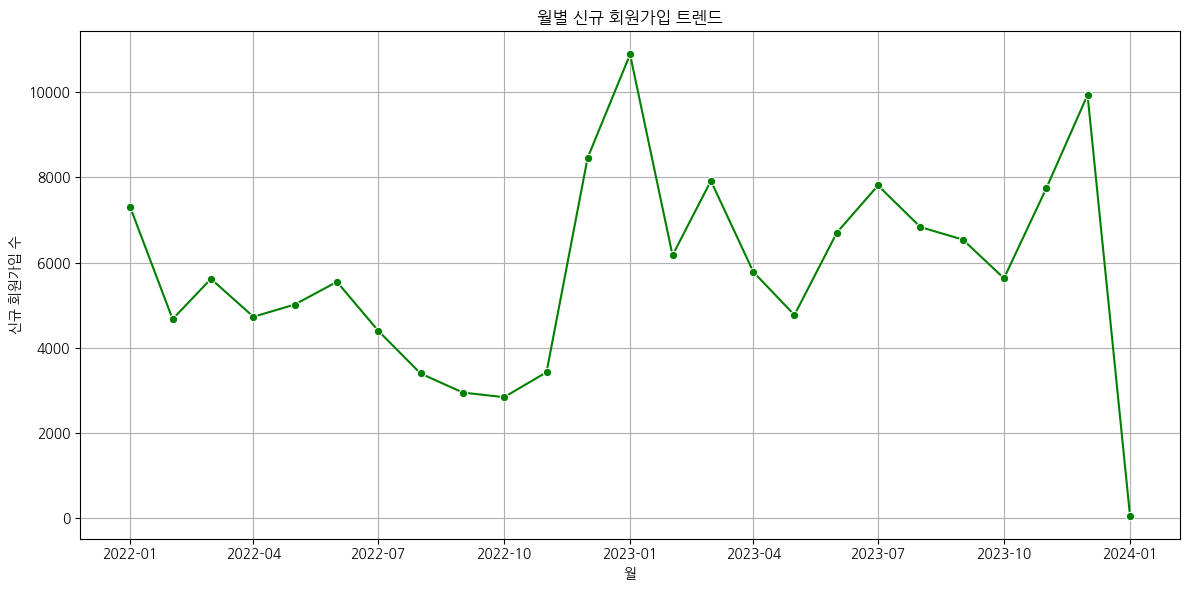

In [ ]:
# 시각화: 월별 신규 회원가입 트렌드
plt.figure(figsize=(12, 6))

# 선 그래프 그리기
sns.lineplot(x='signup_month_dt', y='new_signups', data=monthly_signups, marker='o', color='green')

# 값 라벨 추가(필요하다면 주석 처리를 제거하여 활용 가능)
# for i in range(len(monthly_signups)):
    # x = monthly_signups['signup_month_dt'].iloc[i]
    # y = monthly_signups['new_signups'].iloc[i]
    # plt.text(x, y + 3, f'{y}', ha='center', va='bottom', fontsize=9)

# 기타 설정
plt.title('월별 신규 회원가입 트렌드')
plt.xlabel('월')
plt.ylabel('신규 회원가입 수')
plt.grid(True)
plt.tight_layout()
plt.show()

## 회원 로그 대비 가입률

In [ ]:
# 사용자별 첫 활동 시간 계산
first_event_df = all_events.loc[all_events.groupby('user_id')['client_event_time'].idxmin()]
first_event_df = first_event_df[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'first_event_time'})

print(f"\n총 고유 사용자 수 (첫 활동 기준): {first_event_df['user_id'].nunique()}")
print("\n--- 사용자별 첫 활동 시간 (샘플) ---")
print(first_event_df.head())


총 고유 사용자 수 (첫 활동 기준): 179756

--- 사용자별 첫 활동 시간 (샘플) ---
                                   user_id                 first_event_time
7069068   0000572f2ba8079bcefd2760b632e820 2023-03-18 19:33:16.237000+09:00
7097844   000087537cbfd934375364218ff10f91 2023-03-27 13:54:01.257000+09:00
7162932   000117267e1dd62481ef3ae7fb420107 2022-12-16 14:05:24.926000+09:00
31744668  00012b6dbfccfb458ad0d08f34477944 2022-01-02 10:18:06.966000+09:00
30325340  0001435bc6c0c0f05315192f89275425 2023-01-16 09:59:10.191000+09:00


In [ ]:
total_first_users = first_event_df['user_id'].nunique()
total_signups = complete_signup_df['user_id'].nunique()

if total_first_users > 0:
    overall_signup_rate = (total_signups / total_first_users) * 100
    print(f"--- 전체 기간 분석 ---")
    print(f"총 첫 등장 사용자: {total_first_users}")
    print(f"총 회원가입 사용자: {total_signups}")
    print(f"전체 기간 첫 등장 대비 가입률: {overall_signup_rate:.2f}%")
else:
    print("\n첫 등장 사용자가 없어 전체 기간 가입률을 계산할 수 없습니다.")

--- 전체 기간 분석 ---
총 첫 등장 사용자: 179756
총 회원가입 사용자: 145133
전체 기간 첫 등장 대비 가입률: 80.74%


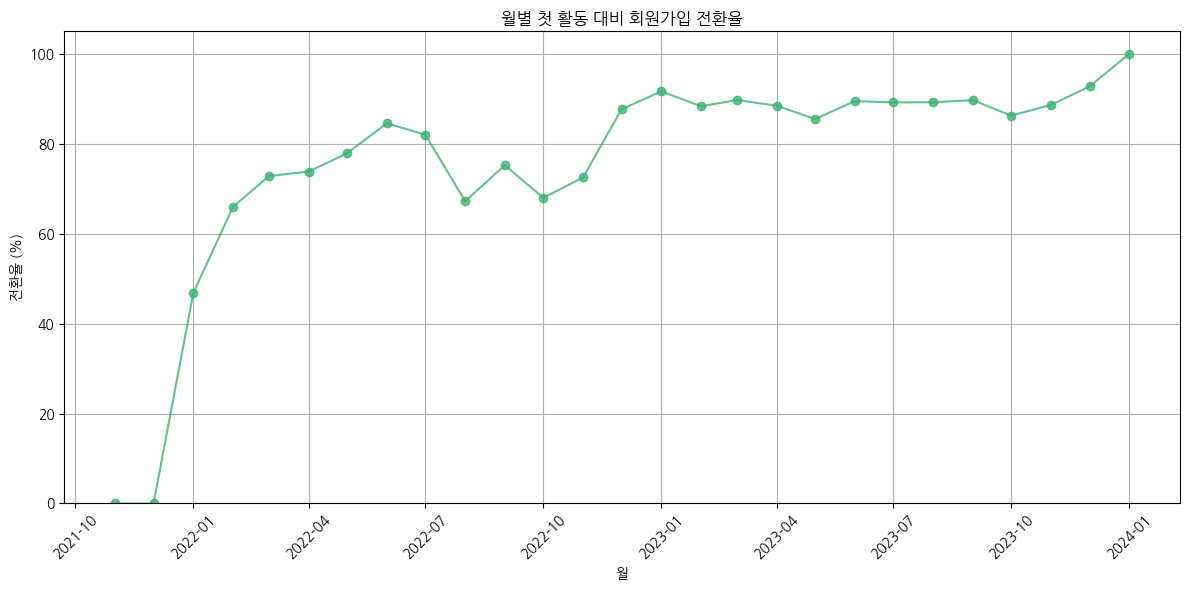

월별 첫 활동 대비 회원가입 전환율
     month_dt  new_users  new_signups  conversion_rate  conversion_rate_pct
0  2021-11-01          7            0         0.000000             0.000000
1  2021-12-01         33            0         0.000000             0.000000
2  2022-01-01      15604         7307         0.468277            46.827736
3  2022-02-01       7076         4669         0.659836            65.983607
4  2022-03-01       7715         5617         0.728062            72.806222
5  2022-04-01       6403         4727         0.738248            73.824770
6  2022-05-01       6432         5010         0.778918            77.891791
7  2022-06-01       6561         5548         0.845603            84.560280
8  2022-07-01       5368         4401         0.819858            81.985842
9  2022-08-01       5047         3393         0.672281            67.228056
10 2022-09-01       3914         2944         0.752172            75.217169
11 2022-10-01       4172         2836         0.679770            67

In [ ]:
# 1. 유저별 첫 활동
first_activity = (
    all_events.sort_values('client_event_time')
    .groupby('user_id')
    .first()
    .reset_index()[['user_id', 'client_event_time']]
)
first_activity['month_dt'] = first_activity['client_event_time'].dt.to_period('M').dt.to_timestamp()

# 2. 가입 유저 (가입일만 추출)
complete_signup['signup_month'] = complete_signup['client_event_time'].dt.to_period('M').dt.to_timestamp()

# 3. 병합 및 컬럼명 정리
merged = (
    first_activity
    .merge(complete_signup[['user_id', 'client_event_time']], on='user_id', how='left')
    .rename(columns={'client_event_time_y': 'signup_time'})
)

# 4. 월별 집계
monthly = merged.groupby('month_dt').agg(
    new_users=('user_id', 'count'),
    new_signups=('signup_time', lambda x: x.notnull().sum())
).reset_index()
monthly['conversion_rate'] = monthly['new_signups'] / monthly['new_users']
monthly['conversion_rate_pct'] = monthly['conversion_rate'] * 100

# 5. 시각화
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)
plt.figure(figsize=(12, 6))
plt.plot(monthly['month_dt'], monthly['conversion_rate_pct'], marker='o', color='mediumseagreen', alpha=0.8)
plt.title('월별 첫 활동 대비 회원가입 전환율')
plt.xlabel('월')
plt.ylabel('전환율 (%)')
plt.ylim(0, 105)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. 표 출력
print("월별 첫 활동 대비 회원가입 전환율")
print(monthly)

## 시간대별 회원가입자 수(신규 고객 획득 수)

In [ ]:
# 시간 컬럼 추출
signup_df['signup_hour'] = signup_df['signup_time'].dt.hour

# 시간대별 회원가입 수 집계
hourly_signups = (
    signup_df
    .groupby('signup_hour')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'unique_signup_count'})
)

# 결과 확인
print(hourly_signups)

    signup_hour  unique_signup_count
0             0                 6323
1             1                 4241
2             2                 2745
3             3                 1840
4             4                 1355
5             5                 1285
6             6                 1716
7             7                 2763
8             8                 4570
9             9                 6082
10           10                 7113
11           11                 7384
12           12                 6660
13           13                 8145
14           14                 8689
15           15                 9082
16           16                 9068
17           17                 8671
18           18                 7340
19           19                 7664
20           20                 8369
21           21                 8933
22           22                 8717
23           23                 6378


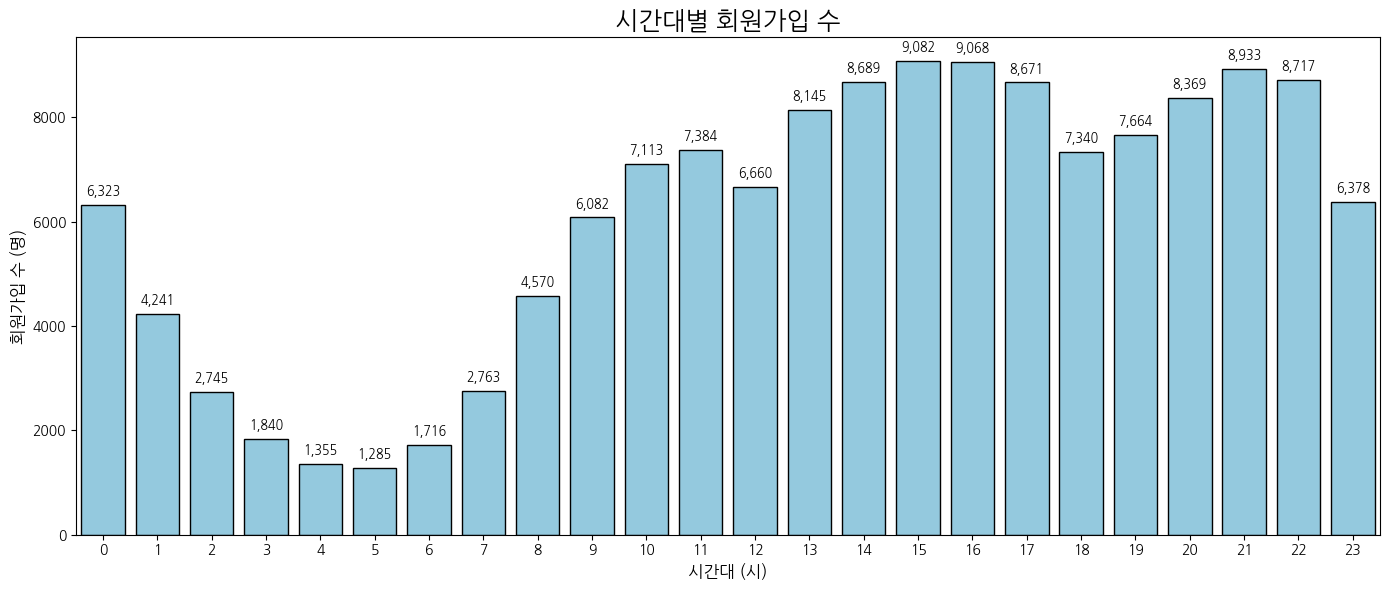

In [ ]:
plt.figure(figsize=(14, 6))

# 바 그래프
barplot = sns.barplot(
    data=hourly_signups,
    x='signup_hour',
    y='unique_signup_count',
    color='skyblue',
    edgecolor='black'
)

# 숫자 라벨 표시
for p in barplot.patches:
    barplot.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=9, color='black', xytext=(0, 5),
        textcoords='offset points',
    )

plt.rc('font', family='NanumGothic')
plt.title('시간대별 회원가입 수', fontsize=18)
plt.xlabel('시간대 (시)', fontsize=12)
plt.ylabel('회원가입 수 (명)', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## 요일별 신규 고객 유입 패턴 분석

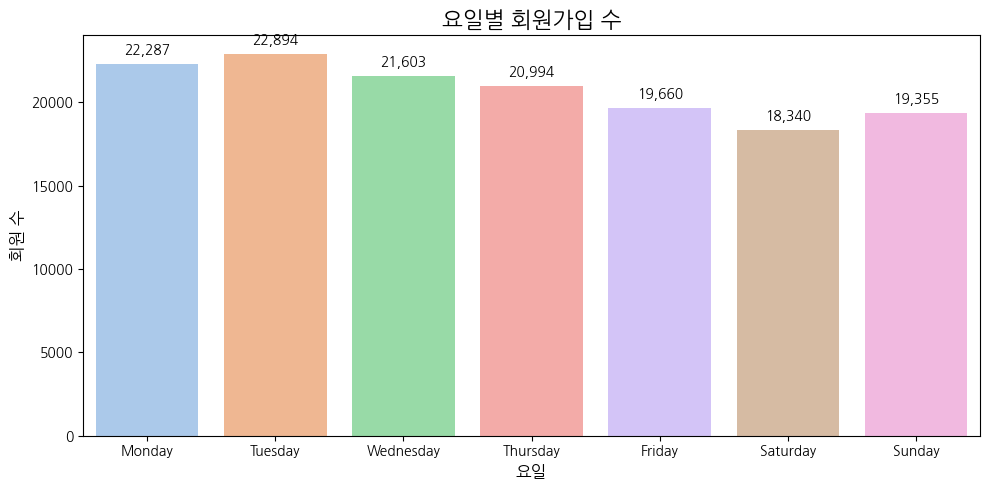

In [ ]:
# 1. 요일 컬럼
signup_df['weekday'] = signup_df['signup_time'].dt.day_name()

# 2. 요일 순서
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
signup_df['weekday'] = pd.Categorical(signup_df['weekday'], categories=weekday_order, ordered=True)

# 3. 집계
weekday_signup = (
    signup_df.groupby('weekday')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'signup_users'})
)

# 4. 시각화
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=weekday_signup, x='weekday', y='signup_users', palette='pastel')

# 수치 표시 추가
for p in barplot.patches:
    value = int(p.get_height())
    barplot.annotate(f'{value:,}',  # 쉼표 포함 숫자
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('요일별 회원가입 수', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('회원 수', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 요일-시간대별 유입 패턴 분석

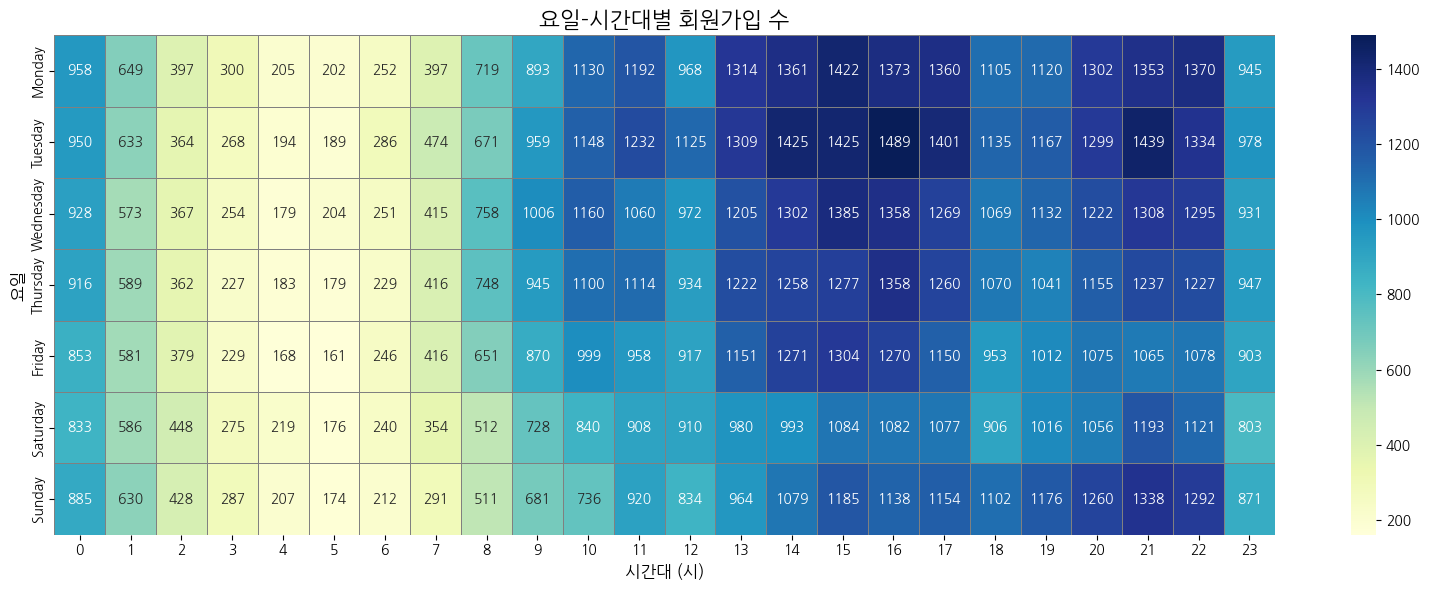

In [ ]:
# 1. 시간 및 요일 컬럼 추가
signup_df['signup_time'] = pd.to_datetime(signup_df['signup_time'])
signup_df['hour'] = signup_df['signup_time'].dt.hour
signup_df['weekday'] = signup_df['signup_time'].dt.day_name()

# 2. 요일 순서 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
signup_df['weekday'] = pd.Categorical(signup_df['weekday'], categories=weekday_order, ordered=True)

# 3. 피벗 테이블 생성: 요일 x 시간대 → 고유 회원 수
heatmap_data = (
    signup_df.groupby(['weekday', 'hour'])['user_id']
    .nunique()
    .reset_index()
    .pivot(index='weekday', columns='hour', values='user_id')
    .fillna(0)
)

# 4. 히트맵 시각화
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5, linecolor='gray')

plt.title('요일-시간대별 회원가입 수', fontsize=16)
plt.rc('font', family='AppleGothic') # MacOS 예시
plt.xlabel('시간대 (시)', fontsize=12)
plt.ylabel('요일', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# 요일-시간대별 유입 벡터
X = heatmap_data.copy()

# 모든 요일을 0~1 사이로 정규화 (비율 기반 패턴 파악 목적)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

In [ ]:
# 클러스터 수는 일단 2~4 중 실험 가능
kmeans = KMeans(n_clusters=3, random_state=42)
X_scaled['cluster'] = kmeans.fit_predict(X_scaled)

weekday
Monday       2
Tuesday      2
Wednesday    0
Thursday     0
Friday       0
Saturday     1
Sunday       1
Name: cluster, dtype: int32


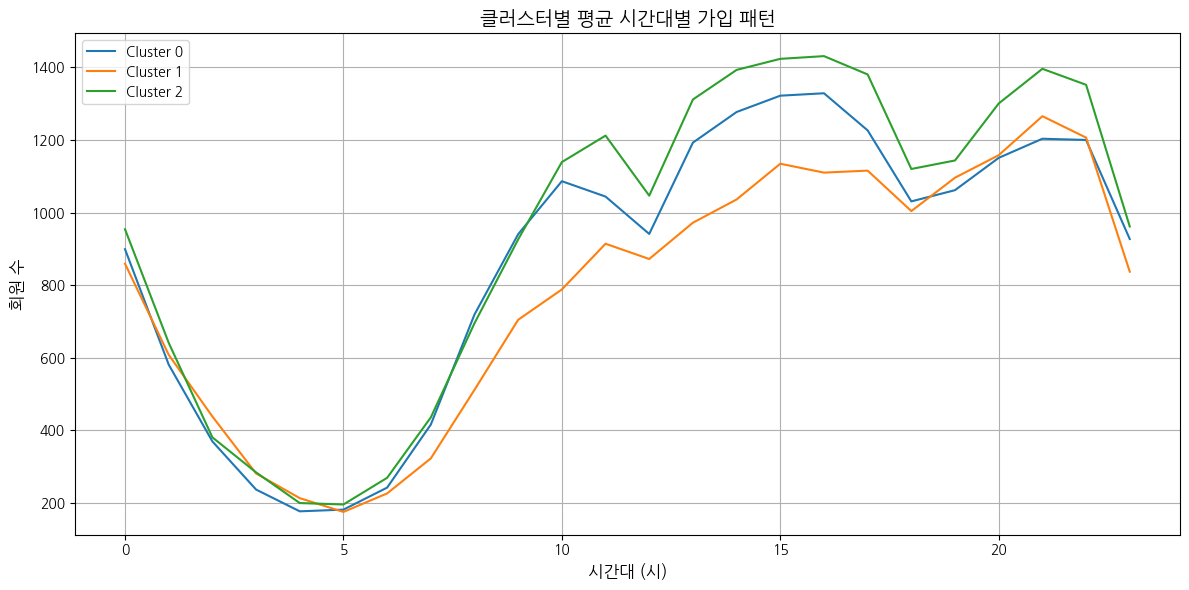

In [ ]:
# 요일별 클러스터 결과 출력
print(X_scaled['cluster'])

# 클러스터별 평균 패턴 시각화 (스파게티 차트)
plt.figure(figsize=(12, 6))
for cluster_id in sorted(X_scaled['cluster'].unique()):
    cluster_days = X_scaled[X_scaled['cluster'] == cluster_id].index
    avg_pattern = X.loc[cluster_days].mean()
    plt.plot(avg_pattern.index, avg_pattern.values, label=f'Cluster {cluster_id}')

plt.title('클러스터별 평균 시간대별 가입 패턴', fontsize=14)
plt.rc('font', family='NanumGothic')
plt.xlabel('시간대 (시)', fontsize=12)
plt.ylabel('회원 수', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 디바이스/언어/국가/도시별 유입 분포

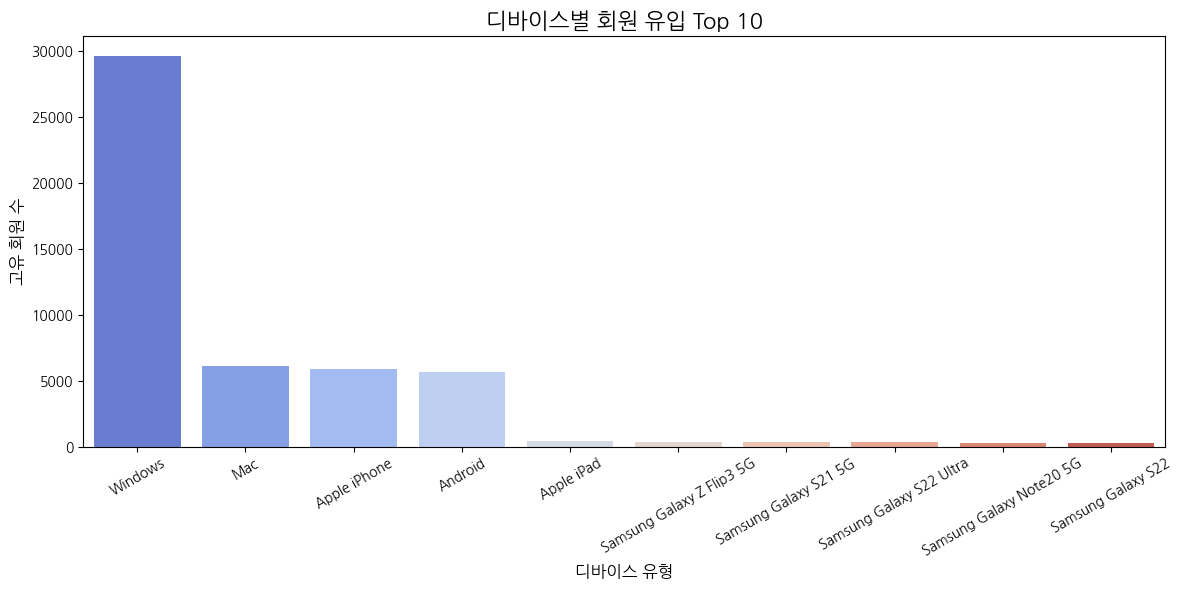

In [ ]:
# 1. 회원가입 유저 ID 추출
signup_users = complete_signup[['user_id']].drop_duplicates()

# 2. 디바이스 정보 포함된 enter_main에서 유저별 대표 device_type 추출
device_info = (
    enter_main[['user_id', 'device_type']]
    .dropna()
    .drop_duplicates(subset='user_id')  # 유저별 대표 디바이스 1개
)

# 3. 회원가입 유저와 디바이스 정보 병합
signup_users = signup_users.astype(str)
device_info = device_info.astype(str)
signup_with_device = signup_users.merge(device_info, on='user_id', how='left')

# 4. 디바이스별 유입 수 집계 (Top 10)
device_counts = (
    signup_with_device['device_type']
    .value_counts()
    .head(10)
    .reset_index()
)

device_counts.columns = ['device_type', 'user_count']  # 컬럼명 명확히 지정

# 5. 시각화
plt.figure(figsize=(12, 6))
plt.rc('font', family='NanumGothic')
sns.barplot(data=device_counts, x='device_type', y='user_count', palette='coolwarm')

plt.title('디바이스별 회원 유입 Top 10', fontsize=16)
plt.xlabel('디바이스 유형', fontsize=12)
plt.ylabel('고유 회원 수', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

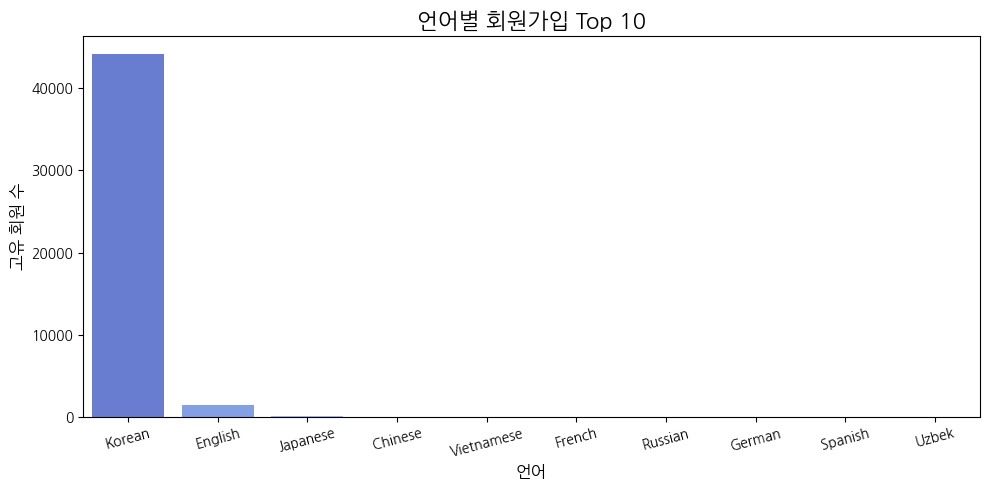

In [ ]:
# 1. 회원가입 완료 유저 중 언어별 고유 유저 수 집계
language_dist_top10 = (
    complete_signup.groupby('language')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'unique_user_count'})
    .sort_values(by='unique_user_count', ascending=False)
    .head(10)
)

# 2. 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x='language', y='unique_user_count', data=language_dist_top10, palette='coolwarm')

plt.title('언어별 회원가입 Top 10', fontsize=16)
plt.xlabel('언어', fontsize=12)
plt.ylabel('고유 회원 수', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

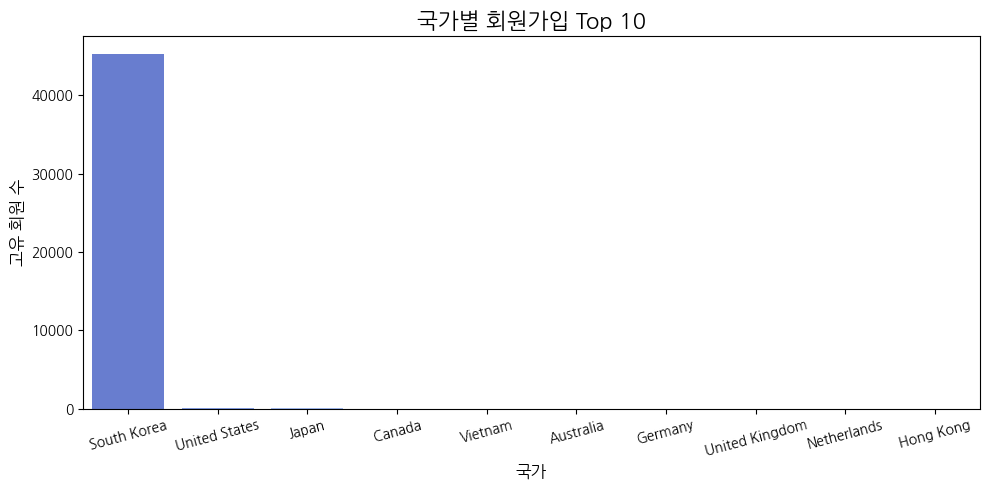

In [ ]:
# 1. complete_signup 기준 국가별 고유 유저 수 집계
country_dist_top10 = (
    complete_signup.groupby('country')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'unique_user_count'})
    .sort_values(by='unique_user_count', ascending=False)
    .head(10)
)

# 2. 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x='country', y='unique_user_count', data=country_dist_top10, palette='coolwarm')

plt.title('국가별 회원가입 Top 10', fontsize=16)
plt.rc('font', family='NanumGothic')
plt.xlabel('국가', fontsize=12)
plt.ylabel('고유 회원 수', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

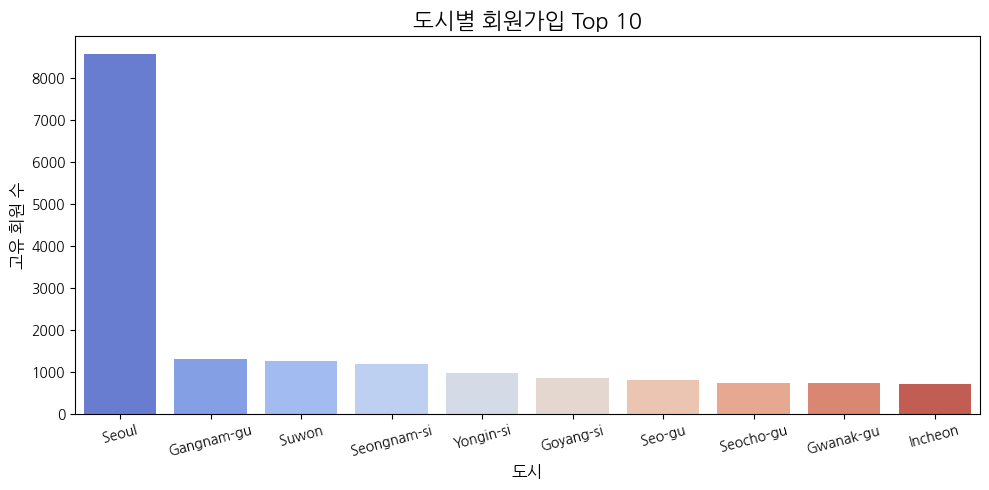

In [ ]:
# 1. complete_signup 기준 도시별 고유 유저 수 집계
city_dist_top10 = (
    complete_signup.groupby('city')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'unique_user_count'})
    .sort_values(by='unique_user_count', ascending=False)
    .head(10)
)

# 2. 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x='city', y='unique_user_count', data=city_dist_top10, palette='coolwarm')

plt.title('도시별 회원가입 Top 10', fontsize=16)
plt.rc('font', family='NanumGothic')
plt.xlabel('도시', fontsize=12)
plt.ylabel('고유 회원 수', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 월별 가입 전 활동 유저 vs 회원가입(신규 고객 획득)

- 회원가입을 한 유저 중에서 가입 시점 이전에 탐색을 하고 가입한 유저 vs 탐색 없이 바로 가입한 유저
    - 탐색 후 가입 유저: 가입 완료 시점 이전에 로그(가입 관련 이벤트는 제외)가 하나라도 남은 유저
    - 완전 신규 유저: 가입 완료 시점 이전에 로그(가입 관련 이벤트는 제외)가 하나도 없는 유저

In [ ]:
# 1. 시간 형식 정리
signup_df['signup_time'] = pd.to_datetime(signup_df['signup_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

# 2. 가입 유저의 가입 시간 딕셔너리화
signup_time_dict = dict(zip(signup_df['user_id'], signup_df['signup_time']))

# 3. 탐색 이벤트만 필터링 (가입 플로우에 포함되는 건 제외)
non_navigational_events = ['complete_signup', 'enter_main', 'enter_signup']
filtered_events = all_events[
    (all_events['event_type'].isin(non_navigational_events) == False) &
    (all_events['user_id'].isin(signup_time_dict))
].copy()

# 4. 가입 전 탐색인지 여부 판별
filtered_events['is_before_signup'] = filtered_events.apply(
    lambda row: row['client_event_time'] < signup_time_dict.get(row['user_id'], pd.Timestamp.max),
    axis=1
)

# 5. 진짜 탐색 유저 집합 생성
visited_before_set = set(filtered_events[filtered_events['is_before_signup']]['user_id'])

# 6. 가입 데이터에 플래그 생성
signup_df['visited_before_signup'] = signup_df['user_id'].isin(visited_before_set)

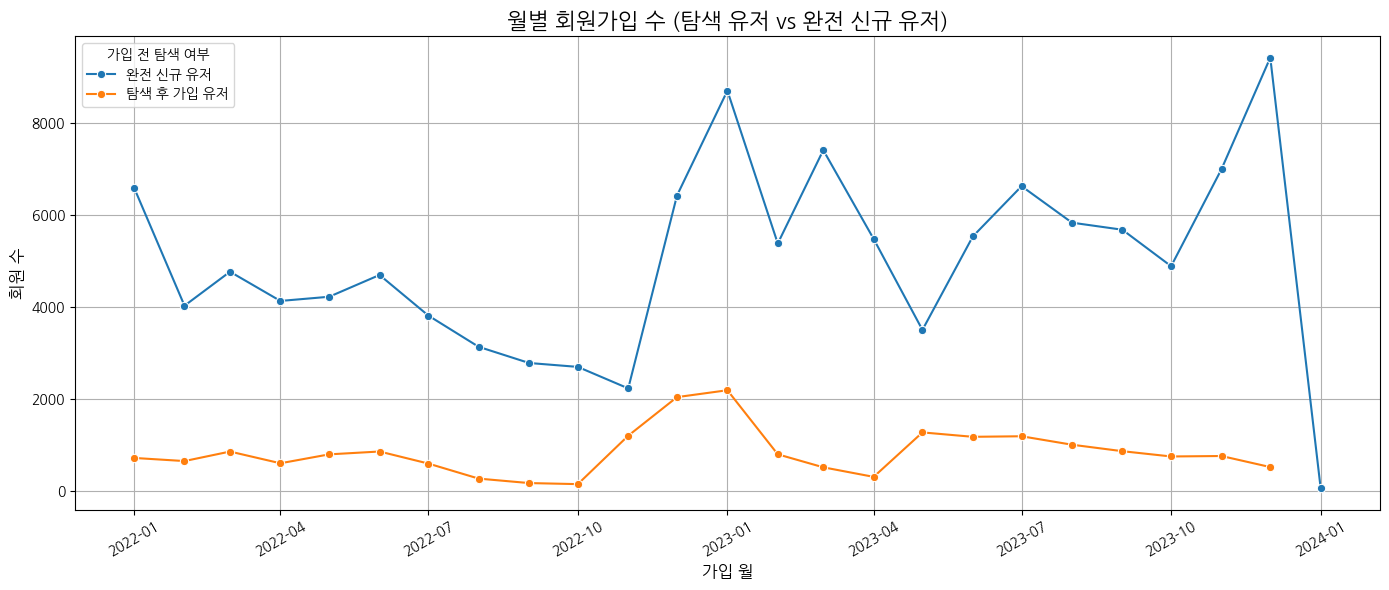

In [ ]:
# 1. 가입일 기준 월 추출
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M')

# 2. 그룹별 월별 가입자 수 집계
monthly_acquisition = (
    signup_df
    .groupby(['signup_month', 'visited_before_signup'])['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'signup_user_count'})
)

# 3. Period → datetime 변환
monthly_acquisition['signup_month'] = monthly_acquisition['signup_month'].dt.to_timestamp()

# 4. 탐색 여부 라벨 지정
monthly_acquisition['탐색여부'] = monthly_acquisition['visited_before_signup'].map({
    True: '탐색 후 가입 유저',
    False: '완전 신규 유저'
})

# 5. 시각화
plt.figure(figsize=(14, 6))
plt.rc('font', family='NanumGothic')
sns.lineplot(data=monthly_acquisition,
             x='signup_month',
             y='signup_user_count',
             hue='탐색여부',
             marker='o')

plt.title('월별 회원가입 수 (탐색 유저 vs 완전 신규 유저)', fontsize=16)
plt.xlabel('가입 월', fontsize=12)
plt.ylabel('회원 수', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(title='가입 전 탐색 여부')
plt.tight_layout()
plt.show()

- 단순하게 해당 시점에 가입을 안 하고 활동하는 유저 vs 가입 완료한 유저를 비교하는 그래프
    - 탐색만 한 유저: 해당 시점에 가입 완료 시점 이전에 로그가 하나라도 남은 유저
    - 가입 유저: 해당 시점에 가입 완료한 유저

In [ ]:
# 1. 가입 유저 가입 시간 딕셔너리로 변환
signup_time_dict = dict(zip(signup_df['user_id'], signup_df['signup_time']))

# 2. 제외할 이벤트 목록 (가입 플로우에서 발생하는 이벤트들)
non_navigational_events = ['complete_signup', 'enter_main', 'enter_signup']

# 3. 가입 유저만 필터링하고, 탐색 이벤트만 남기기
filtered = all_events[
    (all_events['user_id'].isin(signup_time_dict)) &
    (~all_events['event_type'].isin(non_navigational_events))
].copy()

# 4. 가입 전 행동인지 여부 판단
filtered['is_before_signup'] = filtered.apply(
    lambda row: row['client_event_time'] < signup_time_dict.get(row['user_id'], pd.Timestamp.max),
    axis=1
)

# 5. 가입 전 탐색 행동이 있었던 유저 추출
visited_before_set = set(filtered[filtered['is_before_signup']]['user_id'])

# 6. 결과 플래그 생성
signup_df['visited_before_signup'] = signup_df['user_id'].isin(visited_before_set)

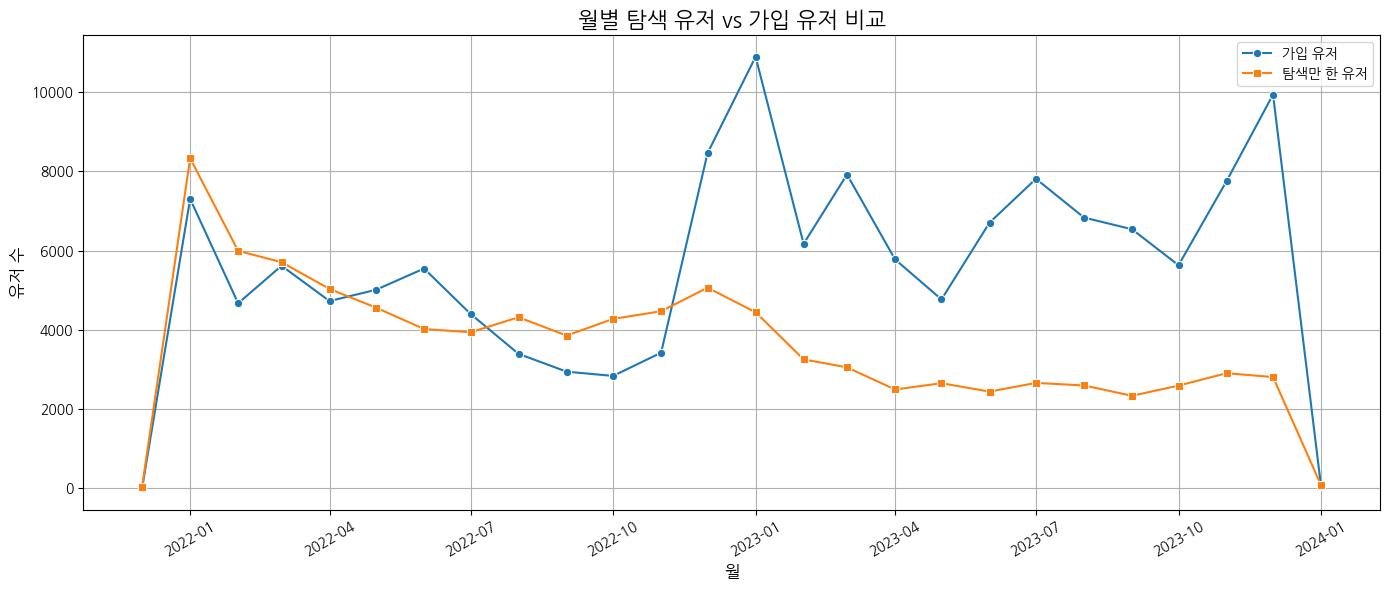

In [ ]:
# 1. 이상치 제거
all_events = all_events.dropna(subset=['client_event_time'])
signup_df = signup_df.dropna(subset=['signup_time'])
all_events = all_events[all_events['client_event_time'] > '2021-12-01']
signup_df = signup_df[signup_df['signup_time'] > '2000-01-01']

# 2. 탐색으로 간주하지 않을 이벤트 제거
non_navigational_events = ['complete_signup', 'enter_main', 'enter_signup']
exploratory_events = all_events[~all_events['event_type'].isin(non_navigational_events)].copy()

# 3. 월 단위로 변환
exploratory_events['month'] = exploratory_events['client_event_time'].dt.to_period('M')
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M')

# 4. 월별 가입자 수
signup_monthly = signup_df.groupby('signup_month')['user_id'].nunique().reset_index(name='signup_users')

# 5. 가입하지 않은 탐색 유저만 필터링
non_signup_events = exploratory_events[~exploratory_events['user_id'].isin(signup_df['user_id'])]

# 6. 월별 탐색 유저 수 집계
non_signup_monthly = (
    non_signup_events.groupby('month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'month': 'signup_month', 'user_id': 'non_signup_users'})
)

# 7. 병합 및 정리
acquisition_compare = signup_monthly.merge(non_signup_monthly, on='signup_month', how='outer').fillna(0)
acquisition_compare['signup_month'] = acquisition_compare['signup_month'].dt.to_timestamp()

# 8. 시각화
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.lineplot(data=acquisition_compare, x='signup_month', y='signup_users', label='가입 유저', marker='o')
sns.lineplot(data=acquisition_compare, x='signup_month', y='non_signup_users', label='탐색만 한 유저', marker='s')

plt.title('월별 탐색 유저 vs 가입 유저 비교', fontsize=16)
plt.rc('font', family='NanumGothic')
plt.xlabel('월', fontsize=12)
plt.ylabel('유저 수', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 월별 신규 고객 vs 재방문 유저

- 가입 이후 시점의 모든 로그를 재방문 활동으로 간주함

In [ ]:
# 1. 시간 정리
signup_df['signup_time'] = pd.to_datetime(signup_df['signup_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

# 2. 가입 유저 기준으로 all_events 조인
user_events = all_events.merge(signup_df[['user_id', 'signup_time']], on='user_id', how='inner')

# 3. 가입 이후 이벤트만 필터링 → 재방문
after_signup_events = user_events[user_events['client_event_time'] > user_events['signup_time']].copy()
after_signup_events['revisit_month'] = after_signup_events['client_event_time'].dt.to_period('M')

# 4. 월별 재방문 유저 수 집계 (고유 유저 수)
revisit_monthly = (
    after_signup_events
    .groupby('revisit_month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'revisit_users'})
)

# 5. 월별 가입자 수 (기존 가입월 기준)
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M')
signup_monthly = (
    signup_df.groupby('signup_month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'signup_users'})
)

# 6. 병합 후 시각화용 변환
compare_df = pd.merge(signup_monthly, revisit_monthly, left_on='signup_month', right_on='revisit_month', how='outer')
compare_df = compare_df.rename(columns={'signup_month': 'month'}).drop(columns=['revisit_month'])
compare_df = compare_df.sort_values('month').fillna(0)
compare_df['month'] = compare_df['month'].dt.to_timestamp()

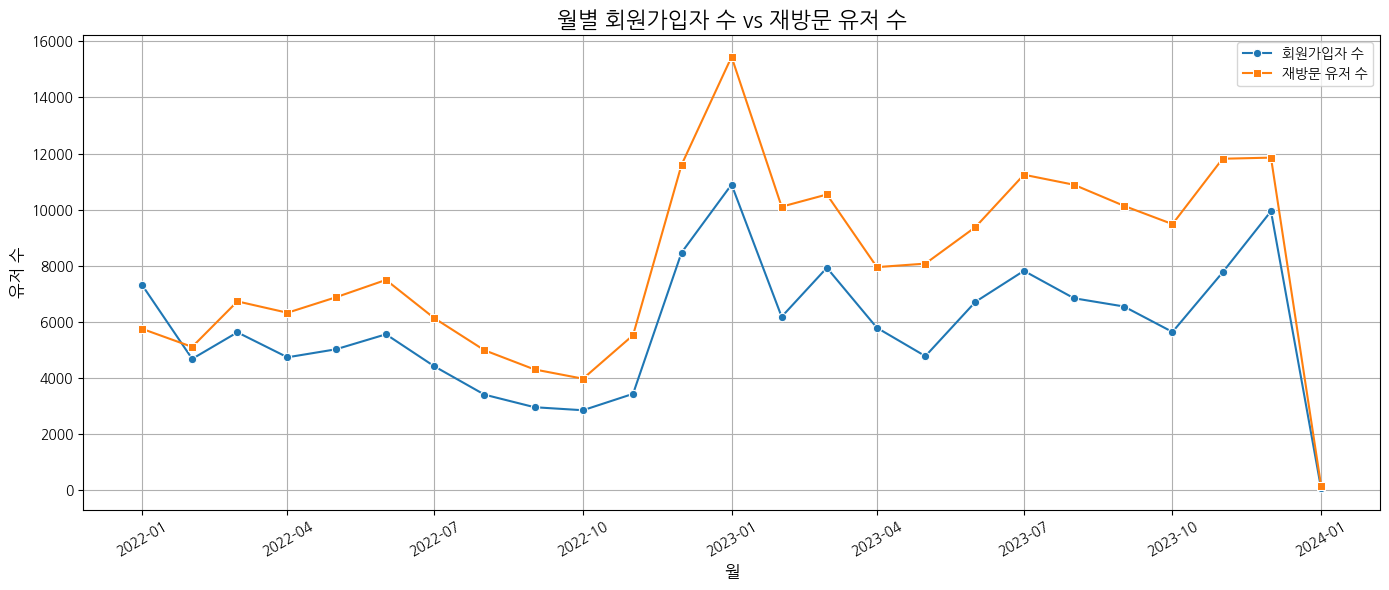

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=compare_df, x='month', y='signup_users', label='회원가입자 수', marker='o')
sns.lineplot(data=compare_df, x='month', y='revisit_users', label='재방문 유저 수', marker='s')

plt.title('월별 회원가입자 수 vs 재방문 유저 수', fontsize=16)
plt.rc('font', family='NanumGothic')
plt.xlabel('월', fontsize=12)
plt.ylabel('유저 수', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- 가입 이후 시점에서 가장 첫 번째로 생긴 로그를 첫 재방문으로 간주하고 첫 재방문만 분석함

In [ ]:
# 1. 시간 형식 정리
signup_df['signup_time'] = pd.to_datetime(signup_df['signup_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

# 2. 가입 이후 이벤트만 필터링
user_events = all_events.merge(signup_df[['user_id', 'signup_time']], on='user_id', how='inner')
after_signup_events = user_events[user_events['client_event_time'] > user_events['signup_time']].copy()

# 3. 유저당 최초 재방문 시간 추출
first_revisit = (
    after_signup_events
    .sort_values('client_event_time')
    .drop_duplicates(subset='user_id', keep='first')
    .copy()
)
first_revisit['revisit_month'] = first_revisit['client_event_time'].dt.to_period('M')

# 4. 월별 최초 재방문 유저 수
first_revisit_monthly = (
    first_revisit
    .groupby('revisit_month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'first_revisit_users'})
)

# 5. 월별 가입자 수
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M')
signup_monthly = (
    signup_df.groupby('signup_month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'signup_users'})
)

# 6. 병합
compare_df = pd.merge(signup_monthly, first_revisit_monthly,
                      left_on='signup_month', right_on='revisit_month', how='outer')
compare_df = compare_df.rename(columns={'signup_month': 'month'}).drop(columns=['revisit_month'])
compare_df = compare_df.sort_values('month').fillna(0)
compare_df['month'] = compare_df['month'].dt.to_timestamp()

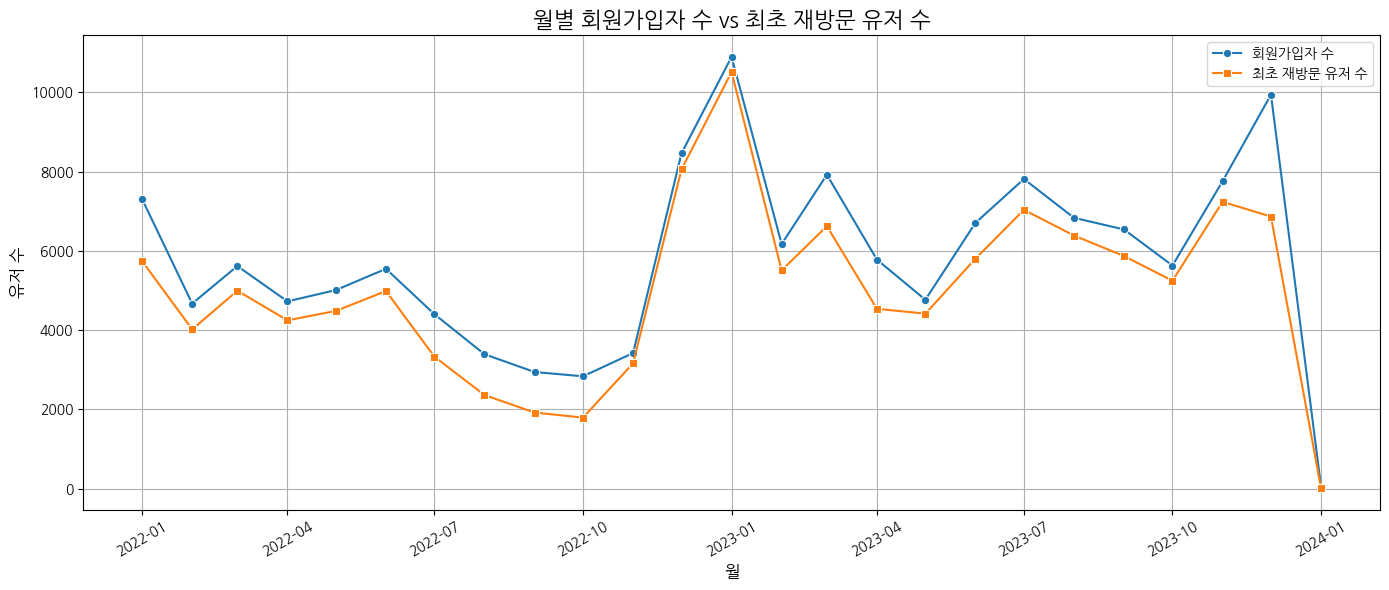

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=compare_df, x='month', y='signup_users', label='회원가입자 수', marker='o')
sns.lineplot(data=compare_df, x='month', y='first_revisit_users', label='최초 재방문 유저 수', marker='s')

plt.title('월별 회원가입자 수 vs 최초 재방문 유저 수', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('유저 수', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Activation(활성화)

## 회원가입 후 아하 모먼트 경험

- 아하 모먼트: 첫 레슨 완료(complete_lesson)

### 회원가입 후 처음으로 경험한 이벤트

In [ ]:
# 1. complete_signup에서 가입시간 추출
signup_df = complete_signup[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'signup_time'})

# 2. complete_lesson에서 첫 레슨 완료시간 추출
lesson_complete_df = complete_lesson[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'first_lesson_complete_time'})
lesson_complete_df = (
    lesson_complete_df
    .sort_values('first_lesson_complete_time')
    .groupby('user_id')
    .first()
    .reset_index()
)

# 3. 가입정보와 레슨 완료정보 병합
activation_df = signup_df.merge(lesson_complete_df, on='user_id', how='left')

# 4. 활성화까지 걸린 시간 계산 (일 단위)
activation_df['activation_days'] = (
    (activation_df['first_lesson_complete_time'] - activation_df['signup_time']).dt.total_seconds() / (60*60*24)
)

# 5. 레슨 완료 여부 추가
activation_df['lesson_completed'] = ~activation_df['activation_days'].isna()

# 결과 확인
print("\n--- activation_df 샘플 ---")
print(activation_df.head())


--- activation_df 샘플 ---
                            user_id                      signup_time  \
0  74d17c27a41656e7788b0c81d9f76cda 2023-04-06 06:33:26.068000+09:00   
1  06b6868000a5d576180aca47896d6cce 2023-04-06 06:45:18.672000+09:00   
2  e131c319972bd580146c5a2faba26613 2023-04-10 23:47:56.424000+09:00   
3  e3b8bfa80d866f296aad139e09023ef3 2023-04-10 23:25:45.920000+09:00   
4  5208a60918f18562ac9d668a35b20303 2023-04-10 23:09:50.698000+09:00   

        first_lesson_complete_time  activation_days  lesson_completed  
0                              NaT              NaN             False  
1 2023-04-06 06:51:21.238000+09:00         0.004196              True  
2 2023-04-11 19:46:13.456000+09:00         0.832142              True  
3                              NaT              NaN             False  
4                              NaT              NaN             False  


In [ ]:
# 1. complete_signup에서 가입시간 가져오기
signup_info = complete_signup[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'signup_time'})

# 2. all_events에 signup_time 붙이기
events_with_signup = all_events.merge(signup_info, on='user_id', how='left')

# 3. 가입 이후 발생한 이벤트만 필터링
events_after_signup = events_with_signup[events_with_signup['client_event_time'] > events_with_signup['signup_time']]

# 4. 가입 후 첫 행동 추출 (user_id별 가장 빠른 client_event_time)
idx_first_event = events_after_signup.groupby('user_id')['client_event_time'].idxmin()
first_event_log_per_user = events_after_signup.loc[idx_first_event].copy()

# 5. 컬럼 정리 (client_event_time -> first_event_time, event_type -> first_event_source)
first_event_log_per_user = first_event_log_per_user.rename(
    columns={'client_event_time': 'first_event_time', 'event_type': 'first_event_source'}
)
first_event_log_per_user = first_event_log_per_user.reset_index(drop=True)

# 6. complete_signup 이벤트 제외
first_event_log_per_user_filtered = first_event_log_per_user[
    first_event_log_per_user['first_event_source'] != 'complete_signup'
].copy()

# 7. activation_df에 첫 행동 붙이기
activation_with_first_action = activation_df.merge(
    first_event_log_per_user_filtered[['user_id', 'first_event_source']],
    on='user_id',
    how='left'
)

# 결과 확인
print("\n--- 가입 이후 첫 행동 유형 (complete_signup 제외) ---")
print(activation_with_first_action.head())


--- 가입 이후 첫 행동 유형 (complete_signup 제외) ---
                            user_id                      signup_time  \
0  74d17c27a41656e7788b0c81d9f76cda 2023-04-06 06:33:26.068000+09:00   
1  06b6868000a5d576180aca47896d6cce 2023-04-06 06:45:18.672000+09:00   
2  e131c319972bd580146c5a2faba26613 2023-04-10 23:47:56.424000+09:00   
3  e3b8bfa80d866f296aad139e09023ef3 2023-04-10 23:25:45.920000+09:00   
4  5208a60918f18562ac9d668a35b20303 2023-04-10 23:09:50.698000+09:00   

        first_lesson_complete_time  activation_days  lesson_completed  \
0                              NaT              NaN             False   
1 2023-04-06 06:51:21.238000+09:00         0.004196              True   
2 2023-04-11 19:46:13.456000+09:00         0.832142              True   
3                              NaT              NaN             False   
4                              NaT              NaN             False   

   first_event_source  
0  enter.payment_page  
1  enter.payment_page  
2       star

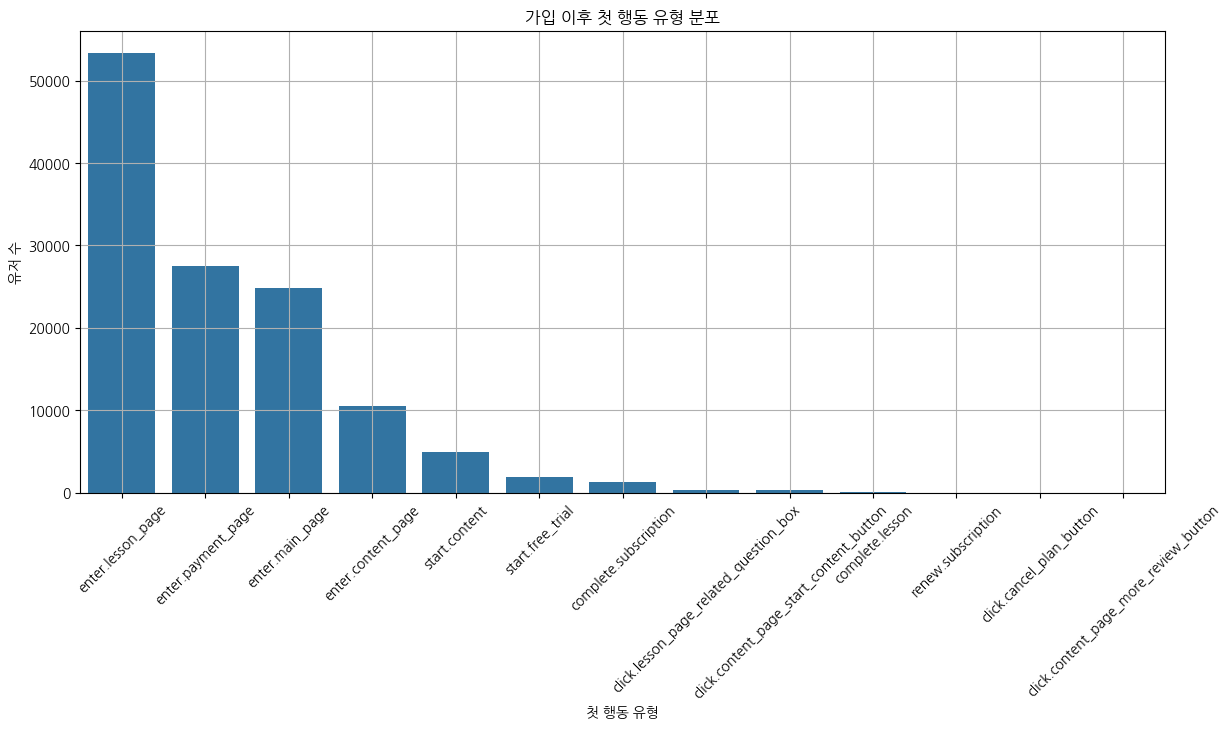

In [ ]:
# 1. 첫 행동 유형별 유저 수 세기
first_action_distribution = (
    activation_with_first_action['first_event_source']
    .value_counts()
    .rename_axis('first_event_source')
    .reset_index(name='user_count')
)

# 2. 시각화
plt.figure(figsize=(14,6))
sns.barplot(data=first_action_distribution, x='first_event_source', y='user_count')
plt.title('가입 이후 첫 행동 유형 분포')
plt.xlabel('첫 행동 유형')
plt.ylabel('유저 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# 첫 행동 유형별 평균 활성화 시간과 레슨 완료율 계산
first_action_summary = (
    activation_with_first_action
    .groupby('first_event_source')
    .agg(
        user_count=('user_id', 'count'),
        activation_days_avg=('activation_days', 'mean'),
        lesson_completion_rate=('lesson_completed', 'mean')
    )
    .reset_index()
)

# 완료율을 %로 변환
first_action_summary['lesson_completion_rate'] = first_action_summary['lesson_completion_rate'] * 100

# 결과 출력
print("\n--- 첫 행동 유형별 활성화 패턴 ---")
print(first_action_summary)


--- 첫 행동 유형별 활성화 패턴 ---
                         first_event_source  user_count  activation_days_avg  \
0                  click.cancel_plan_button          13             2.723338   
1     click.content_page_more_review_button           7                  NaN   
2   click.content_page_start_content_button         333            13.253794   
3    click.lesson_page_related_question_box         375            49.787756   
4                           complete.lesson          84             5.504381   
5                     complete.subscription        1317            10.607129   
6                        enter.content_page       10480            24.536066   
7                         enter.lesson_page       53379            23.182075   
8                           enter.main_page       24858            57.577522   
9                        enter.payment_page       27542            24.830325   
10                       renew.subscription          17             2.706013   
11             

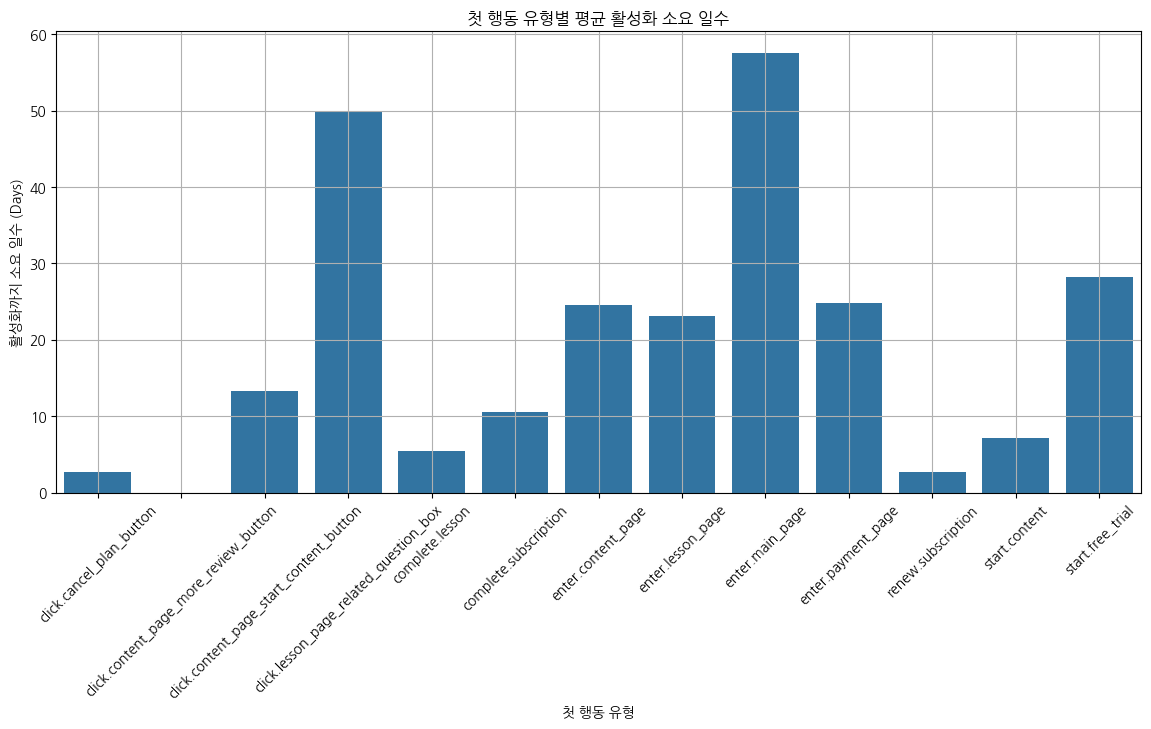

In [ ]:
# 활성화까지 걸린 평균 소요 시간
plt.figure(figsize=(14,6))
sns.barplot(data=first_action_summary, x='first_event_source', y='activation_days_avg')
plt.title('첫 행동 유형별 평균 활성화 소요 일수')
plt.xlabel('첫 행동 유형')
plt.ylabel('활성화까지 소요 일수 (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# click.content_page_more_review_button 유저 수
activation_with_first_action.query("first_event_source == 'click.content_page_more_review_button'")['user_id'].nunique()

7

In [ ]:
# click.content_page_more_review_button 행동 유저의 activation_days 확인
activation_with_first_action.query("first_event_source == 'click.content_page_more_review_button'")[['activation_days', 'lesson_completed']]

,activation_days,lesson_completed
5545,NaN,False
6240,NaN,False
6807,NaN,False
14238,NaN,False
16287,NaN,False
77032,NaN,False
116990,NaN,False


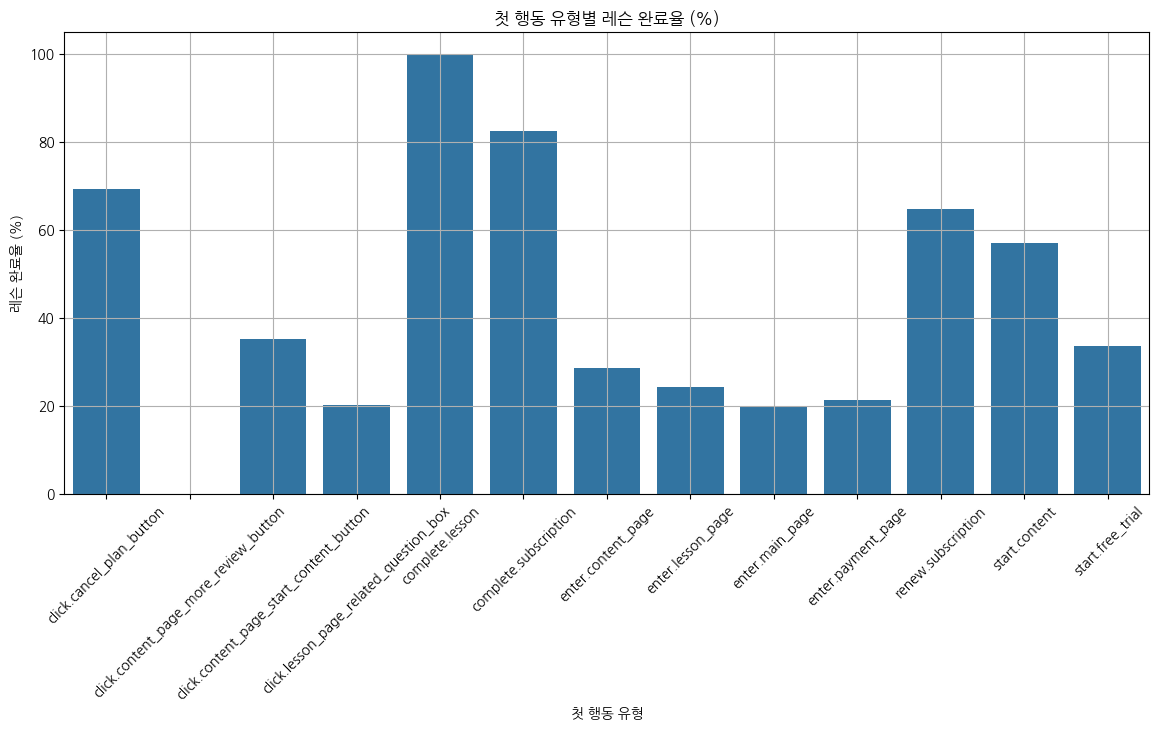

In [ ]:
# 레슨 완료율
plt.figure(figsize=(14,6))
sns.barplot(data=first_action_summary, x='first_event_source', y='lesson_completion_rate')
plt.title('첫 행동 유형별 레슨 완료율 (%)')
plt.xlabel('첫 행동 유형')
plt.ylabel('레슨 완료율 (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 회원가입 후 첫 레슨 시작

In [ ]:
# 활성화 이벤트 발생자 식별 및 필터링
activation_events = enter_lesson[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'activation_time'})

# 가입 정보와 활성화 이벤트 정보 병합 (가입한 유저만 고려)
signup_info = complete_signup.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
signup_info = signup_info[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'signup_time'})
merged_df = pd.merge(activation_events, signup_info, on='user_id', how='inner')

# 가입 시간 이후에 발생한 활성화 이벤트만 필터링
valid_activation_events = merged_df[merged_df['activation_time'] > merged_df['signup_time']].copy()

if valid_activation_events.empty:
    print("정보: 회원가입 이후 발생한 활성화 이벤트가 없습니다.")
    n_activated = 0
    activation_rate = 0
    first_activation_df = pd.DataFrame() # 이후 분석 위해 빈 DF 생성
else:
    # 첫 활성화 시점 계산
    # 사용자별로 가입 후 첫 활성화 이벤트 시간 계산
    first_activation_df = valid_activation_events.sort_values('activation_time').drop_duplicates('user_id', keep='first')
    activated_user_ids = set(first_activation_df['user_id'].unique())
    n_activated = len(activated_user_ids)
	# --- 6. 활성화율 계산 ---
    activation_rate = (n_activated / total_signups * 100) if total_signups > 0 else 0
    print(f"총 회원가입 수: {total_signups}")
    print(f"활성화 완료 사용자 수 (가입 후 첫 '레슨 시작' 발생): {n_activated}")
    print(f"활성화율: {activation_rate:.2f}%")

총 회원가입 수: 145133
활성화 완료 사용자 수 (가입 후 첫 '레슨 시작' 발생): 87454
활성화율: 60.26%


In [ ]:
# 활성화 소요 시간 분석
if not first_activation_df.empty:
    first_activation_df['time_to_activate'] = first_activation_df['activation_time'] - first_activation_df['signup_time']

    # Timedelta를 분석하기 쉬운 단위(예: 시간)로 변환
    first_activation_df['time_to_activate_hours'] = first_activation_df['time_to_activate'].dt.total_seconds() / 3600

    print("\n--- 활성화 소요 시간 (가입 ~ 첫 활성화) 통계 (단위: 시간) ---")
    print(first_activation_df['time_to_activate_hours'].describe())


--- 활성화 소요 시간 (가입 ~ 첫 활성화) 통계 (단위: 시간) ---
count    8.745400e+04
mean     2.554300e+02
std      1.308452e+03
min      2.777778e-07
25%      3.002778e-04
50%      2.318750e-03
75%      5.260382e-02
max      1.699153e+04
Name: time_to_activate_hours, dtype: float64


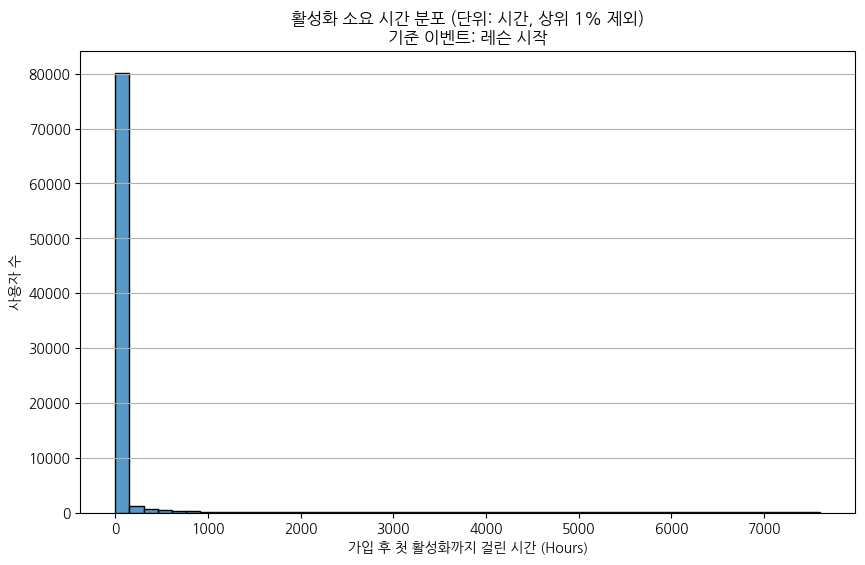

In [ ]:
# 시각화: 활성화 소요 시간 분포 (히스토그램)
plt.figure(figsize=(10, 6))
# 너무 큰 값 제외 (예: 상위 1% 제외 또는 특정 시간 기준 설정)
upper_limit = first_activation_df['time_to_activate_hours'].quantile(0.99)
sns.histplot(first_activation_df[first_activation_df['time_to_activate_hours'] <= upper_limit]['time_to_activate_hours'], bins=50, kde=False)
plt.title('활성화 소요 시간 분포 (단위: 시간, 상위 1% 제외)\n기준 이벤트: 레슨 시작')
plt.xlabel('가입 후 첫 활성화까지 걸린 시간 (Hours)')
plt.ylabel('사용자 수')
plt.grid(axis='y')
plt.show()

### 회원가입 후 첫 레슨 완료(아하 모먼트)

In [ ]:
# 활성화 이벤트 발생자 식별 및 필터링
activation_events = complete_lesson[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'activation_time'})

# 가입 정보와 활성화 이벤트 정보 병합 (가입한 유저만 고려)
signup_info = complete_signup.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
signup_info = signup_info[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'signup_time'})
merged_df = pd.merge(activation_events, signup_info, on='user_id', how='inner')

# 가입 시간 이후에 발생한 활성화 이벤트만 필터링
valid_activation_events = merged_df[merged_df['activation_time'] > merged_df['signup_time']].copy()

if valid_activation_events.empty:
    print("정보: 회원가입 이후 발생한 활성화 이벤트가 없습니다.")
    n_activated = 0
    activation_rate = 0
    first_activation_df = pd.DataFrame() # 이후 분석 위해 빈 DF 생성
else:
    # 첫 활성화 시점 계산
    # 사용자별로 가입 후 첫 활성화 이벤트 시간 계산
    first_activation_df = valid_activation_events.sort_values('activation_time').drop_duplicates('user_id', keep='first')
    activated_user_ids = set(first_activation_df['user_id'].unique())
    n_activated = len(activated_user_ids)
	# 활성화율 계산
    activation_rate = (n_activated / total_signups * 100) if total_signups > 0 else 0
    print(f"총 회원가입 수: {total_signups}")
    print(f"활성화 완료 사용자 수 (가입 후 첫 '레슨 완료료' 발생): {n_activated}")
    print(f"활성화율: {activation_rate:.2f}%")

총 회원가입 수: 145133
활성화 완료 사용자 수 (가입 후 첫 '레슨 완료료' 발생): 31545
활성화율: 21.74%


In [ ]:
# 활성화 소요 시간 분석
if not first_activation_df.empty:
    first_activation_df['time_to_activate'] = first_activation_df['activation_time'] - first_activation_df['signup_time']

    # Timedelta를 분석하기 쉬운 단위(예: 시간)로 변환
    first_activation_df['time_to_activate_hours'] = first_activation_df['time_to_activate'].dt.total_seconds() / 3600

    print("\n--- 활성화 소요 시간 (가입 ~ 첫 활성화) 통계 (단위: 시간) ---")
    print(first_activation_df['time_to_activate_hours'].describe())


--- 활성화 소요 시간 (가입 ~ 첫 활성화) 통계 (단위: 시간) ---
count    31545.000000
mean       652.383255
std       2037.490880
min          0.001584
25%          0.098798
50%          1.781140
75%        145.053484
max      17464.473673
Name: time_to_activate_hours, dtype: float64


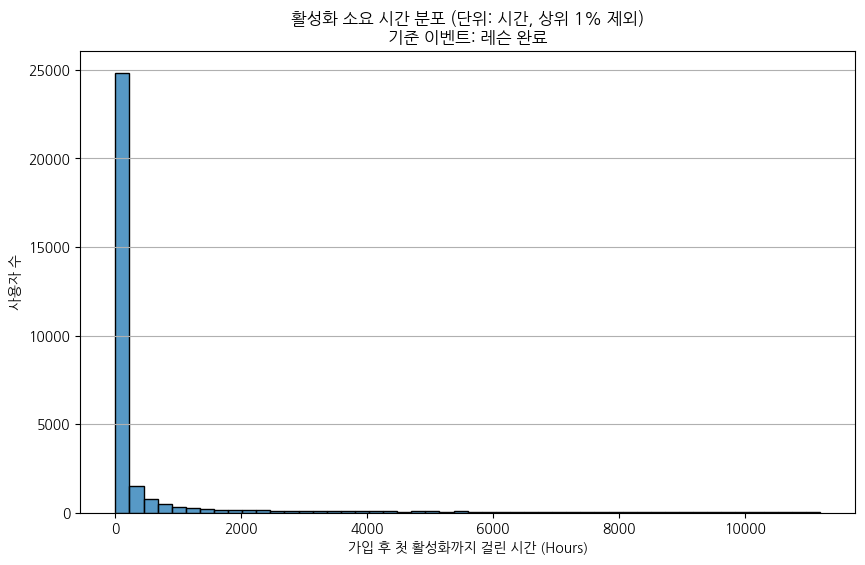

In [ ]:
# 시각화: 활성화 소요 시간 분포 (히스토그램)
plt.figure(figsize=(10, 6))
# 너무 큰 값 제외 (예: 상위 1% 제외 또는 특정 시간 기준 설정)
upper_limit = first_activation_df['time_to_activate_hours'].quantile(0.99)
sns.histplot(first_activation_df[first_activation_df['time_to_activate_hours'] <= upper_limit]['time_to_activate_hours'], bins=50, kde=False)
plt.title('활성화 소요 시간 분포 (단위: 시간, 상위 1% 제외)\n기준 이벤트: 레슨 완료')
plt.xlabel('가입 후 첫 활성화까지 걸린 시간 (Hours)')
plt.ylabel('사용자 수')
plt.grid(axis='y')
plt.show()

In [ ]:
# 1. 강의 완강 여부
completed_users = complete_lesson['user_id'].nunique()
total_users = signup_df['user_id'].nunique()

completion_rate = completed_users / total_users
print(f"강의 1개 이상 완강한 회원 비율: {completion_rate:.2%}")

# 2. 유저별 레슨 시작/완강 개수
start_count = enter_lesson.groupby('user_id')['lesson.id'].nunique().reset_index()
start_count.columns = ['user_id', 'num_started_lessons']

complete_count = complete_lesson.groupby('user_id')['lesson.id'].nunique().reset_index()
complete_count.columns = ['user_id', 'num_completed_lessons']

# 병합하여 비교
engagement_df = start_count.merge(complete_count, on='user_id', how='outer').fillna(0)

print("평균 레슨 시작 개수:", round(engagement_df['num_started_lessons'].mean(), 2))
print("평균 레슨 완료 개수:", round(engagement_df['num_completed_lessons'].mean(), 2))

강의 1개 이상 완강한 회원 비율: 34.23%
평균 레슨 시작 개수: 47.98
평균 레슨 완료 개수: 46.65


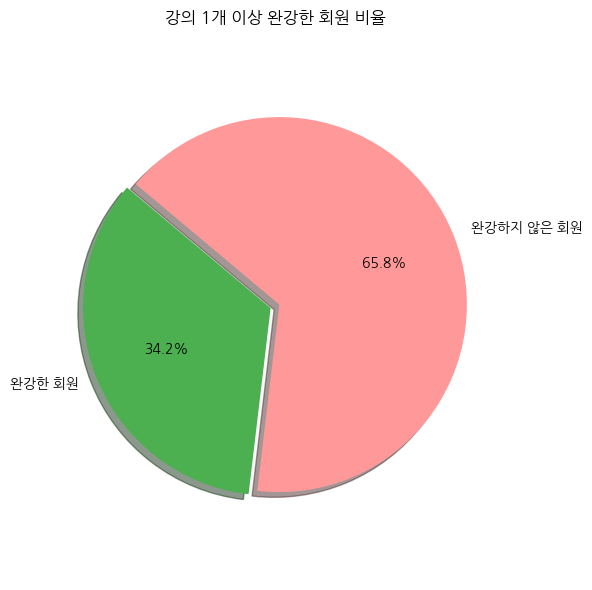

In [ ]:
completed_users = complete_lesson['user_id'].nunique()
total_users = signup_df['user_id'].nunique()
non_completed_users = total_users - completed_users

labels = ['완강한 회원', '완강하지 않은 회원']
sizes = [completed_users, non_completed_users]
colors = ['#4CAF50', '#FF9999']
explode = (0.05, 0)  # 완강 회원 쪽만 약간 띄우기

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True)
plt.title('강의 1개 이상 완강한 회원 비율')
plt.axis('equal')  # 동그란 원 유지
plt.tight_layout()
plt.show()

## 코호트별 첫 레슨 완료

### 가입 월 기준 코호트


--- 코호트별 첫 레슨 완료까지 평균 소요 일수 ---
   signup_month  activation_days
0    2022-01-01        90.704107
1    2022-02-01        91.849438
2    2022-03-01        77.637462
3    2022-04-01        90.192557
4    2022-05-01        83.151933
5    2022-06-01        80.478262
6    2022-07-01        58.819771
7    2022-08-01        55.523478
8    2022-09-01        63.312174
9    2022-10-01        69.890339
10   2022-11-01        33.869881
11   2022-12-01        52.218637
12   2023-01-01        47.596214
13   2023-02-01        41.001042
14   2023-03-01        38.674135
15   2023-04-01        18.187101
16   2023-05-01        11.197216
17   2023-06-01         6.654787
18   2023-07-01         5.863105
19   2023-08-01         4.457464
20   2023-09-01         5.831019
21   2023-10-01         4.220457
22   2023-11-01         1.711980
23   2023-12-01         0.881081
24   2024-01-01         0.007273


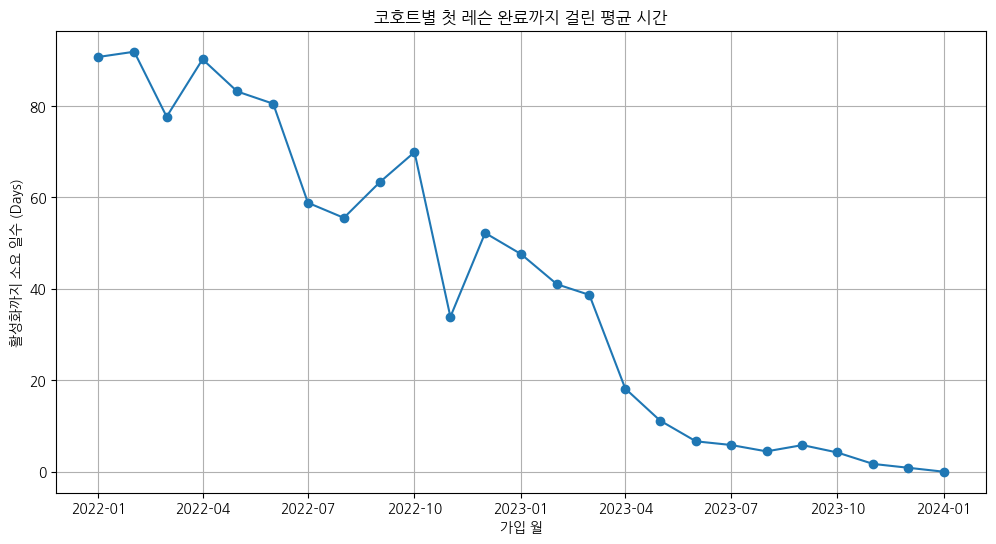

In [ ]:
# 1. 가입일 추출 (complete_signup)
signup_df = complete_signup[['user_id', 'client_event_time']].copy()
signup_df.rename(columns={'client_event_time': 'signup_time'}, inplace=True)

# 2. 첫 레슨 완료일 추출 (complete_lesson)
lesson_complete_df = complete_lesson[['user_id', 'client_event_time']].copy()
lesson_complete_df.rename(columns={'client_event_time': 'first_lesson_complete_time'}, inplace=True)
lesson_complete_df = (
    lesson_complete_df
    .sort_values('first_lesson_complete_time')
    .groupby('user_id')
    .first()
    .reset_index()
)

# 3. 가입과 첫 레슨 완료 병합
activation_df = signup_df.merge(lesson_complete_df, on='user_id', how='left')

# 4. 활성화까지 걸린 시간 계산 (단위: 일)
activation_df['activation_days'] = (activation_df['first_lesson_complete_time'] - activation_df['signup_time']).dt.total_seconds() / (60*60*24)

# 5. 가입 월(코호트) 추가
activation_df['signup_month'] = activation_df['signup_time'].dt.to_period('M').dt.to_timestamp()

# 6. 코호트별 평균 활성화 시간 계산
cohort_activation = (
    activation_df
    .groupby('signup_month')['activation_days']
    .mean()
    .reset_index()
)

# 7. 결과 출력
print("\n--- 코호트별 첫 레슨 완료까지 평균 소요 일수 ---")
print(cohort_activation)

# 8. (선택) 시각화
plt.figure(figsize=(12,6))
plt.plot(cohort_activation['signup_month'], cohort_activation['activation_days'], marker='o')
plt.title('코호트별 첫 레슨 완료까지 걸린 평균 시간')
plt.xlabel('가입 월')
plt.ylabel('활성화까지 소요 일수 (Days)')
plt.grid(True)
plt.show()

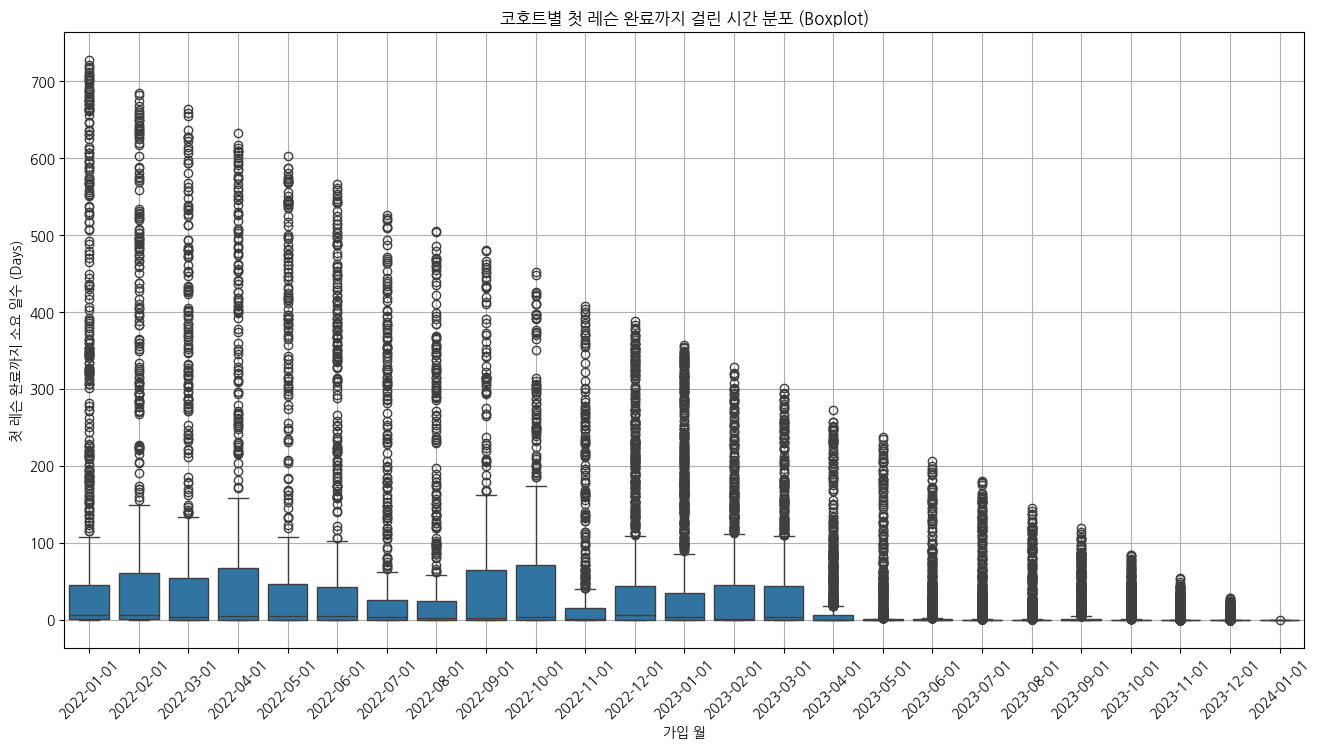

In [ ]:
# 1. signup_month와 activation_days가 있는 activation_df 사용
# 2. activation_days가 존재하는(즉, 레슨 완료한) 유저만 필터
activated_users = activation_df.dropna(subset=['activation_days'])

# 3. x축에 사용할 월 리스트 (시간 순 정렬)
ordered_months = activated_users['signup_month'].sort_values().drop_duplicates()

# 4. Boxplot 그리기 (order 옵션 추가)
plt.figure(figsize=(16,8))
sns.boxplot(
    x='signup_month',
    y='activation_days',
    data=activated_users,
    order=ordered_months  # << 여기 추가
)
plt.title('코호트별 첫 레슨 완료까지 걸린 시간 분포 (Boxplot)')
plt.xlabel('가입 월')
plt.ylabel('첫 레슨 완료까지 소요 일수 (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


--- 코호트별 아하 모먼트 도달율 (%) ---
   signup_month   aha_rate
0    2022-01-01  14.453874
1    2022-02-01  15.760171
2    2022-03-01  13.263308
3    2022-04-01  12.166737
4    2022-05-01  12.272999
5    2022-06-01  12.168740
6    2022-07-01  15.038619
7    2022-08-01  18.538167
8    2022-09-01  14.028533
9    2022-10-01  13.046544
10   2022-11-01  24.313267
11   2022-12-01  14.903676
12   2023-01-01  14.027357
13   2023-02-01  15.019443
14   2023-03-01  12.384800
15   2023-04-01  24.571725
16   2023-05-01  29.851059
17   2023-06-01  35.475693
18   2023-07-01  36.111111
19   2023-08-01  36.157448
20   2023-09-01  29.132895
21   2023-10-01  29.751332
22   2023-11-01  34.782048
23   2023-12-01  27.605634
24   2024-01-01   9.803922


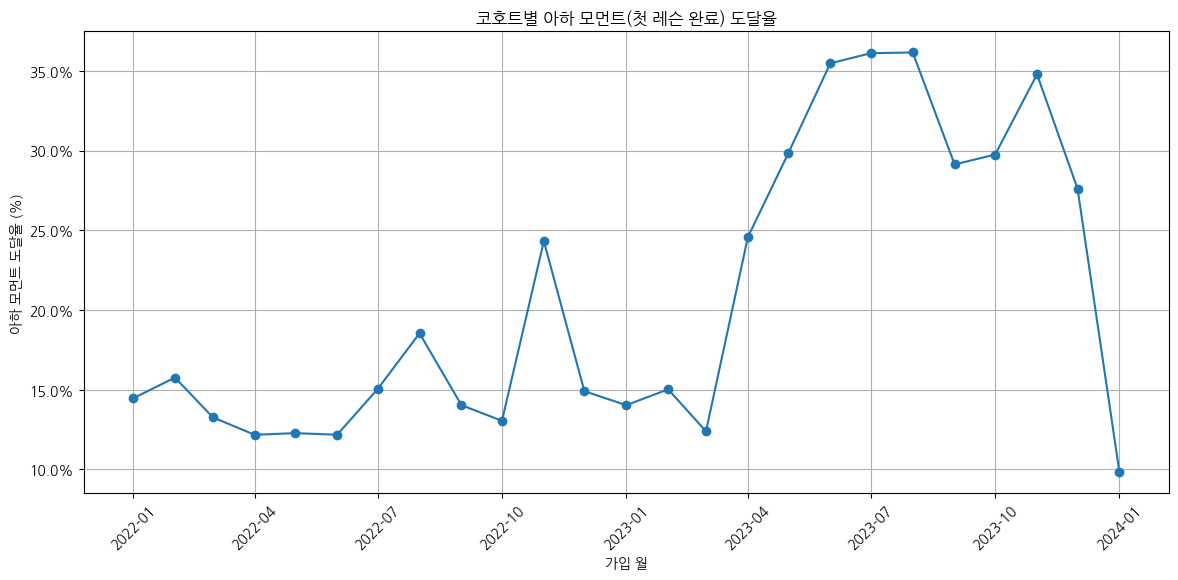

In [ ]:
# 1. 레슨 완료 여부 컬럼 추가
activation_df['lesson_completed'] = ~activation_df['activation_days'].isna()

# 2. 코호트별 가입자 수, 레슨 완료자 수 집계
cohort_aha_rate = (
    activation_df
    .groupby('signup_month')
    .agg(
        total_users=('user_id', 'count'),
        completed_users=('lesson_completed', 'sum')
    )
    .reset_index()
)

# 3. 아하 모먼트 도달율 (%) 계산
cohort_aha_rate['aha_rate'] = 100 * (cohort_aha_rate['completed_users'] / cohort_aha_rate['total_users'])

# 4. 결과 출력
print("\n--- 코호트별 아하 모먼트 도달율 (%) ---")
print(cohort_aha_rate[['signup_month', 'aha_rate']])

# 5. 시각화
import matplotlib.ticker as mtick

plt.figure(figsize=(14,6))
plt.plot(cohort_aha_rate['signup_month'], cohort_aha_rate['aha_rate'], marker='o')
plt.title('코호트별 아하 모먼트(첫 레슨 완료) 도달율')
plt.xlabel('가입 월')
plt.ylabel('아하 모먼트 도달율 (%)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())  # y축을 %로
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


--- 코호트별 레슨 완료 실패율 (%) ---
   signup_month  failure_rate
0    2022-01-01     85.546126
1    2022-02-01     84.239829
2    2022-03-01     86.736692
3    2022-04-01     87.833263
4    2022-05-01     87.727001
5    2022-06-01     87.831260
6    2022-07-01     84.961381
7    2022-08-01     81.461833
8    2022-09-01     85.971467
9    2022-10-01     86.953456
10   2022-11-01     75.686733
11   2022-12-01     85.096324
12   2023-01-01     85.972643
13   2023-02-01     84.980557
14   2023-03-01     87.615200
15   2023-04-01     75.428275
16   2023-05-01     70.148941
17   2023-06-01     64.524307
18   2023-07-01     63.888889
19   2023-08-01     63.842552
20   2023-09-01     70.867105
21   2023-10-01     70.248668
22   2023-11-01     65.217952
23   2023-12-01     72.394366
24   2024-01-01     90.196078


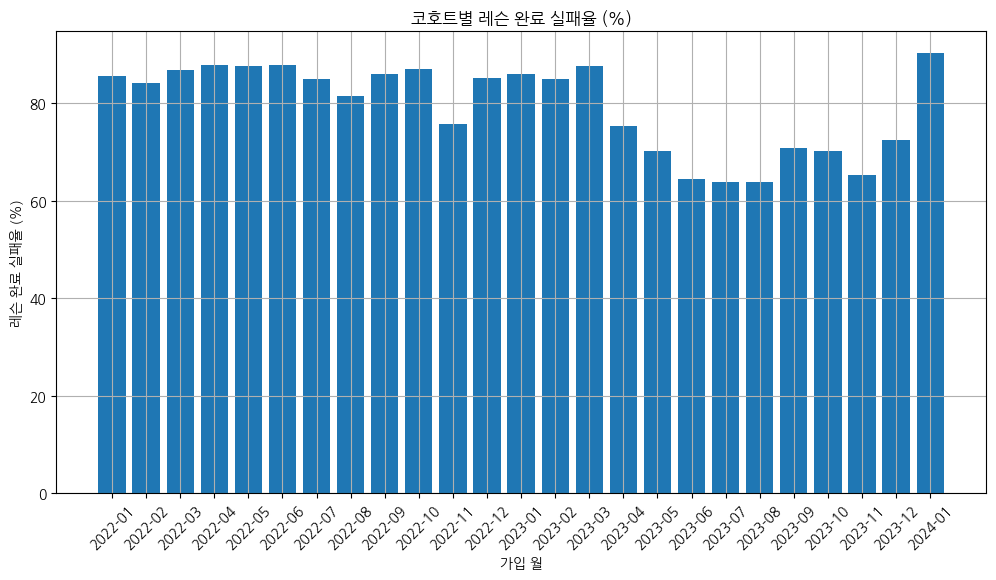

In [ ]:
# 1. 레슨 완료 여부 컬럼 추가
activation_df['lesson_completed'] = ~activation_df['activation_days'].isna()

# 2. 코호트별 실패율 계산
cohort_failure = (
    activation_df
    .groupby('signup_month')
    .agg(
        total_users=('user_id', 'count'),
        completed_users=('lesson_completed', 'sum')
    )
    .reset_index()
)

# 3. 실패율(%) 추가
cohort_failure['failure_rate'] = 100 * (1 - cohort_failure['completed_users'] / cohort_failure['total_users'])

# 4. 결과 출력
print("\n--- 코호트별 레슨 완료 실패율 (%) ---")
print(cohort_failure[['signup_month', 'failure_rate']])

# 5. (선택) 시각화
plt.figure(figsize=(12,6))
plt.bar(cohort_failure['signup_month'].dt.strftime('%Y-%m'), cohort_failure['failure_rate'])
plt.title('코호트별 레슨 완료 실패율 (%)')
plt.xlabel('가입 월')
plt.ylabel('레슨 완료 실패율 (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 무료체험 여부 기준 코호트

In [ ]:
# 무료체험 시작한 유저 목록
free_trial_users = free_trial['user_id'].unique()

# activation_df에 무료체험 여부 컬럼 추가
activation_df['is_free_trial'] = activation_df['user_id'].isin(free_trial_users)

# 무료체험 여부별 활성화 소요 시간 평균 계산
trial_vs_nontrial = (
    activation_df[~activation_df['activation_days'].isna()]  # 레슨 완료한 유저만
    .groupby('is_free_trial')['activation_days']
    .mean()
    .reset_index()
)

print("\n--- 무료체험 여부별 첫 레슨 완료까지 평균 소요 일수 ---")
print(trial_vs_nontrial)

# 무료체험 여부별 첫 레슨 완료율 계산
trial_vs_nontrial_rate = (
    activation_df
    .groupby('is_free_trial')
    .agg(
        total_users=('user_id', 'count'),
        completed_users=('lesson_completed', 'sum')
    )
    .reset_index()
)

trial_vs_nontrial_rate['completion_rate'] = 100 * (trial_vs_nontrial_rate['completed_users'] / trial_vs_nontrial_rate['total_users'])

print("\n--- 무료체험 여부별 첫 레슨 완료율 (%) ---")
print(trial_vs_nontrial_rate[['is_free_trial', 'completion_rate']])


--- 무료체험 여부별 첫 레슨 완료까지 평균 소요 일수 ---
   is_free_trial  activation_days
0          False        24.530439
1           True        41.971243

--- 무료체험 여부별 첫 레슨 완료율 (%) ---
   is_free_trial  completion_rate
0          False        20.445165
1           True        33.533729


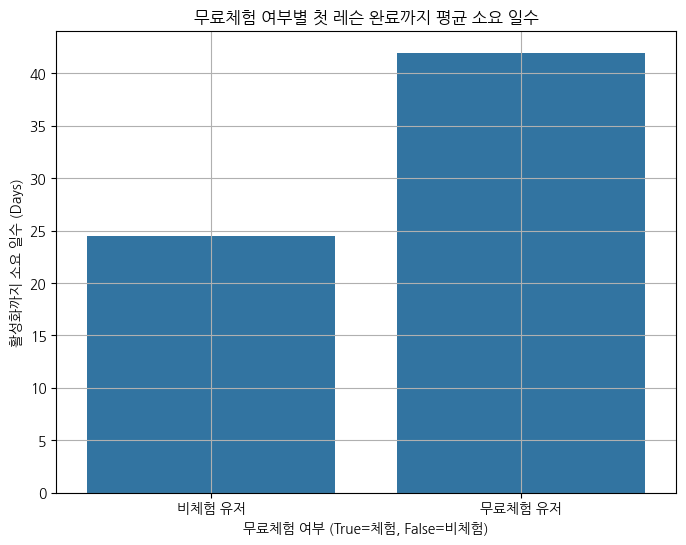

In [ ]:
# 무료체험 여부별 활성화 소요 시간 시각화
plt.figure(figsize=(8,6))
sns.barplot(x='is_free_trial', y='activation_days', data=trial_vs_nontrial)
plt.title('무료체험 여부별 첫 레슨 완료까지 평균 소요 일수')
plt.xlabel('무료체험 여부 (True=체험, False=비체험)')
plt.ylabel('활성화까지 소요 일수 (Days)')
plt.xticks([0,1], ['비체험 유저', '무료체험 유저'])  # x축 라벨 수정
plt.grid(True)
plt.show()

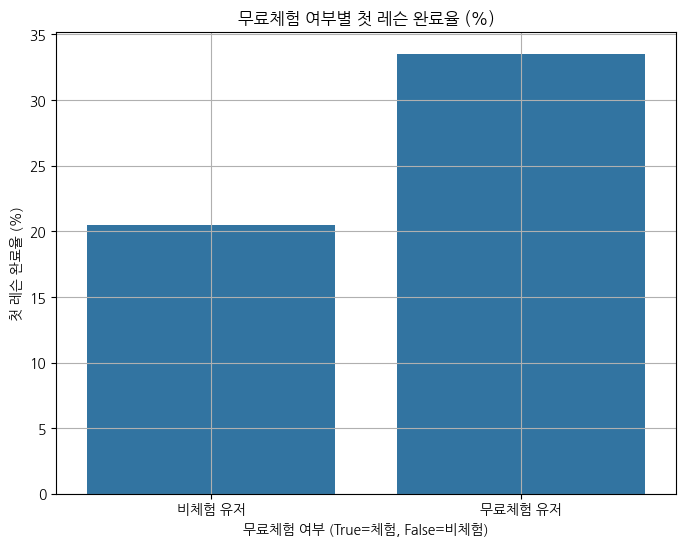

In [ ]:
# 무료체험 여부별 첫 레슨 완료율 시각화
plt.figure(figsize=(8,6))
sns.barplot(x='is_free_trial', y='completion_rate', data=trial_vs_nontrial_rate)
plt.title('무료체험 여부별 첫 레슨 완료율 (%)')
plt.xlabel('무료체험 여부 (True=체험, False=비체험)')
plt.ylabel('첫 레슨 완료율 (%)')
plt.xticks([0,1], ['비체험 유저', '무료체험 유저'])  # x축 라벨 수정
plt.grid(True)
plt.show()

In [ ]:
# 무료체험 여부 + 월별 평균 활성화 시간
monthly_activation = (
    activation_df[~activation_df['activation_days'].isna()]
    .groupby(['signup_month', 'is_free_trial'])['activation_days']
    .mean()
    .reset_index()
)

# 모든 조합 만들기 (signup_month x is_free_trial)
all_months = activation_df['signup_month'].drop_duplicates()
full_index = pd.MultiIndex.from_product([all_months, [True, False]], names=['signup_month', 'is_free_trial'])

# full index로 재구성
monthly_activation = monthly_activation.set_index(['signup_month', 'is_free_trial']).reindex(full_index).reset_index()

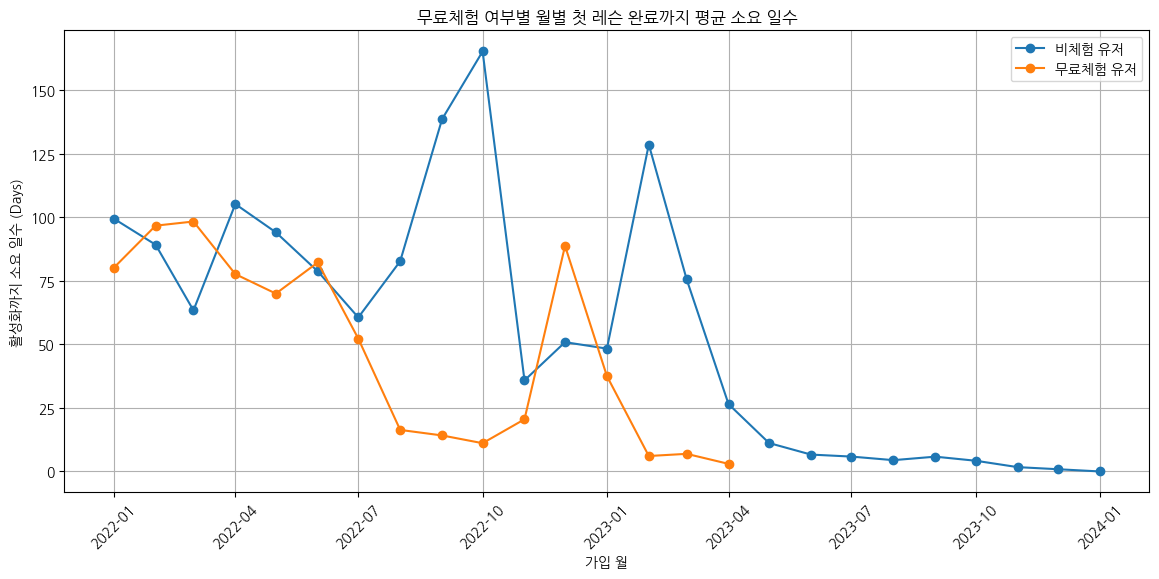

In [ ]:
# 무료체험 유저 / 비체험 유저 나누기 + 정렬!!
free_trial_data = monthly_activation[monthly_activation['is_free_trial'] == True].sort_values('signup_month')
non_trial_data = monthly_activation[monthly_activation['is_free_trial'] == False].sort_values('signup_month')

# 시각화
plt.figure(figsize=(14,6))

# 비체험 유저 (파란색)
plt.plot(non_trial_data['signup_month'], non_trial_data['activation_days'], marker='o', label='비체험 유저')

# 무료체험 유저 (주황색)
plt.plot(free_trial_data['signup_month'], free_trial_data['activation_days'], marker='o', label='무료체험 유저')

plt.title('무료체험 여부별 월별 첫 레슨 완료까지 평균 소요 일수')
plt.xlabel('가입 월')
plt.ylabel('활성화까지 소요 일수 (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# 1. 무료체험 유저만 필터링
free_trial_users_df = activation_df[activation_df['is_free_trial'] == True]

# 2. 무료체험 유저 월별 가입자 수 집계
free_trial_monthly_counts = (
    free_trial_users_df
    .groupby('signup_month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'free_trial_user_count'})
)

# 결과 출력
print("\n--- 월별 무료체험 유저 수 ---")
print(free_trial_monthly_counts)


--- 월별 무료체험 유저 수 ---
   signup_month  free_trial_user_count
0    2022-01-01                   2048
1    2022-02-01                   1364
2    2022-03-01                   1822
3    2022-04-01                   1683
4    2022-05-01                   1804
5    2022-06-01                   1868
6    2022-07-01                    569
7    2022-08-01                    291
8    2022-09-01                    291
9    2022-10-01                    263
10   2022-11-01                    124
11   2022-12-01                     48
12   2023-01-01                    122
13   2023-02-01                    810
14   2023-03-01                    634
15   2023-04-01                    564


In [ ]:
# 레슨 완료 여부 컬럼 다시 추가 (혹시 빠졌을까봐)
activation_df['lesson_completed'] = ~activation_df['activation_days'].isna()

# 무료체험 여부 + 가입월별 총 유저수, 완료 유저수 집계
monthly_completion = (
    activation_df
    .groupby(['signup_month', 'is_free_trial'])
    .agg(
        total_users=('user_id', 'count'),
        completed_users=('lesson_completed', 'sum')
    )
    .reset_index()
)

# 완료율(%) 추가
monthly_completion['completion_rate'] = 100 * (monthly_completion['completed_users'] / monthly_completion['total_users'])


In [ ]:
# signup_month x is_free_trial 조합을 완성
full_index = pd.MultiIndex.from_product(
    [activation_df['signup_month'].drop_duplicates().sort_values(), [True, False]],
    names=['signup_month', 'is_free_trial']
)

# reindex
monthly_completion = monthly_completion.set_index(['signup_month', 'is_free_trial']).reindex(full_index).reset_index()

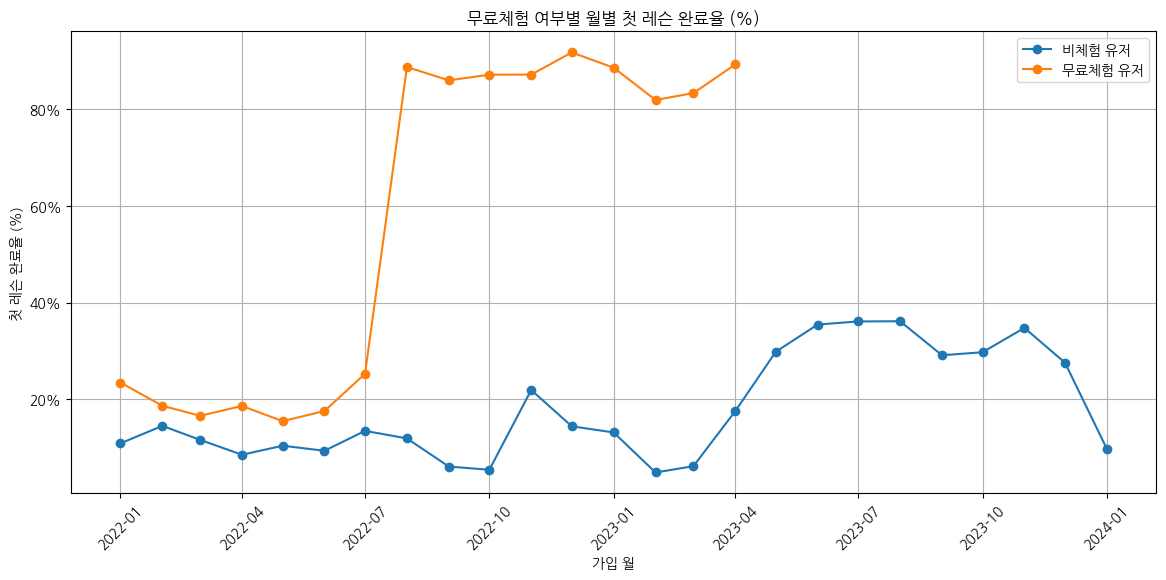

In [ ]:
# 무료체험 / 비체험 유저 데이터 따로 분리 + 정렬
free_trial_completion = monthly_completion[monthly_completion['is_free_trial'] == True].sort_values('signup_month')
non_trial_completion = monthly_completion[monthly_completion['is_free_trial'] == False].sort_values('signup_month')

# 시각화
plt.figure(figsize=(14,6))

# 비체험 유저 (파란색)
plt.plot(non_trial_completion['signup_month'], non_trial_completion['completion_rate'], marker='o', label='비체험 유저')

# 무료체험 유저 (주황색)
plt.plot(free_trial_completion['signup_month'], free_trial_completion['completion_rate'], marker='o', label='무료체험 유저')

plt.title('무료체험 여부별 월별 첫 레슨 완료율 (%)')
plt.xlabel('가입 월')
plt.ylabel('첫 레슨 완료율 (%)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True)
plt.legend()
plt.show()

### 첫 콘텐츠 난이도 기준 코호트


--- 난이도별 첫 레슨 완료까지 평균 소요 일수 ---
  content.difficulty  activation_days
0           advanced        30.571523
1           beginner        26.331719
2               hard        65.133598
3       intermediate        32.213166


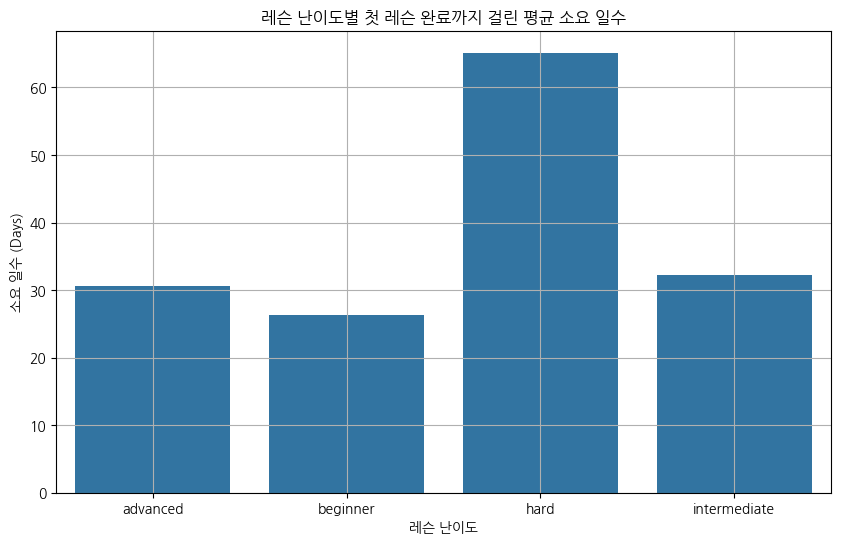

In [ ]:
# 1. complete_lesson에서 user_id, content_id, client_event_time 추출
lesson_complete_info = complete_lesson[['user_id', 'content.id', 'client_event_time']].copy()

# 2. start_content에서 content_id, content.difficulty 추출
content_info = start_content[['content.id', 'content.difficulty']].drop_duplicates()

# 3. complete_lesson에 content.difficulty 매칭
lesson_complete_with_difficulty = lesson_complete_info.merge(content_info, on='content.id', how='left')

# 4. 유저별 첫 레슨 완료만 추출
first_complete = (
    lesson_complete_with_difficulty
    .sort_values('client_event_time')
    .groupby('user_id')
    .first()
    .reset_index()
)

# 5. 가입 데이터와 병합 (activation_df 기준)
activation_with_difficulty = activation_df.merge(first_complete[['user_id', 'content.difficulty']], on='user_id', how='left')

# 6. 난이도별 활성화 소요 시간 평균 계산
difficulty_activation = (
    activation_with_difficulty[~activation_with_difficulty['activation_days'].isna()]  # 레슨 완료한 유저만
    .groupby('content.difficulty')['activation_days']
    .mean()
    .reset_index()
)

print("\n--- 난이도별 첫 레슨 완료까지 평균 소요 일수 ---")
print(difficulty_activation)

# 7. 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='content.difficulty', y='activation_days', data=difficulty_activation)
plt.title('레슨 난이도별 첫 레슨 완료까지 걸린 평균 소요 일수')
plt.xlabel('레슨 난이도')
plt.ylabel('소요 일수 (Days)')
plt.grid(True)
plt.show()


--- 난이도별 레슨 완료율 ---
  content.difficulty  start_count  complete_count  completion_rate (%)
0           advanced      7983184         2273564                 28.5
1           beginner      3869378         1095212                 28.3
2               hard       874923          299487                 34.2
3       intermediate     10324804         2334621                 22.6


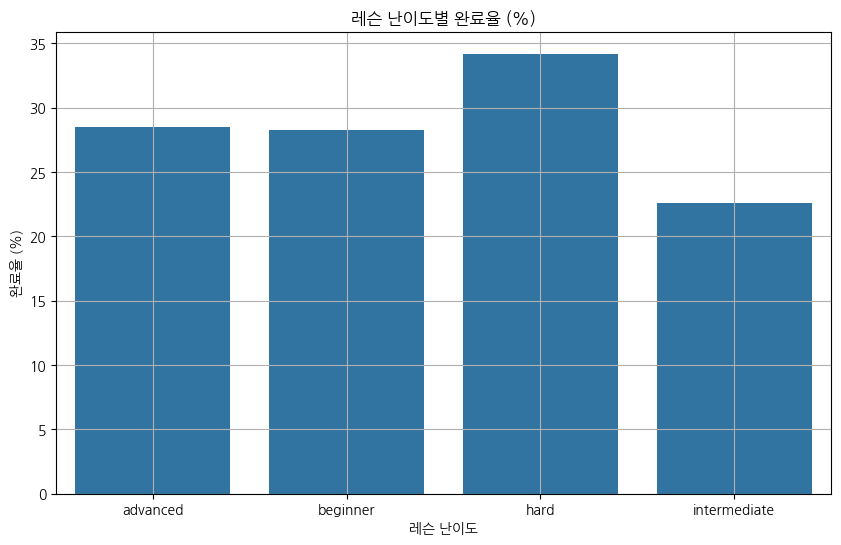

In [ ]:
# 1. lesson_start_df에 content.difficulty 붙이기
lesson_start_info = enter_lesson[['user_id', 'content.id', 'lesson.id', 'client_event_time']].copy()
lesson_start_info = lesson_start_info.merge(
    start_content[['content.id', 'content.difficulty']].drop_duplicates(),
    on='content.id',
    how='left'
)

# 2. complete_lesson에도 content.difficulty 붙이기
lesson_complete_info = complete_lesson[['user_id', 'content.id', 'lesson.id', 'client_event_time']].copy()
lesson_complete_info = lesson_complete_info.merge(
    start_content[['content.id', 'content.difficulty']].drop_duplicates(),
    on='content.id',
    how='left'
)

# 3. 난이도별 레슨 시작 건수
start_counts = lesson_start_info.groupby('content.difficulty')['lesson.id'].count().rename('start_count')

# 4. 난이도별 레슨 완료 건수
complete_counts = lesson_complete_info.groupby('content.difficulty')['lesson.id'].count().rename('complete_count')

# 5. 난이도별 완료율 계산
difficulty_completion = (
    pd.concat([start_counts, complete_counts], axis=1)
    .fillna(0)
)

difficulty_completion['completion_rate (%)'] = (difficulty_completion['complete_count'] / difficulty_completion['start_count']) * 100
difficulty_completion = difficulty_completion.round(1).reset_index()

# 6. 결과 출력
print("\n--- 난이도별 레슨 완료율 ---")
print(difficulty_completion)

# 7. 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='content.difficulty', y='completion_rate (%)', data=difficulty_completion)
plt.title('레슨 난이도별 완료율 (%)')
plt.xlabel('레슨 난이도')
plt.ylabel('완료율 (%)')
plt.grid(True)
plt.show()


--- 월별 난이도별 첫 레슨 완료까지 평균 소요 일수 ---
   complete_month content.difficulty  activation_days
0      2022-01-01           advanced         2.618421
1      2022-01-01           beginner         2.898000
2      2022-01-01               hard         1.000000
3      2022-01-01       intermediate         3.804348
4      2022-02-01           advanced         7.027397
..            ...                ...              ...
93     2023-12-01           beginner        33.770800
94     2023-12-01               hard       312.000000
95     2023-12-01       intermediate        69.850000
96     2024-01-01           advanced              NaN
97     2024-01-01           beginner        35.200000

[98 rows x 3 columns]


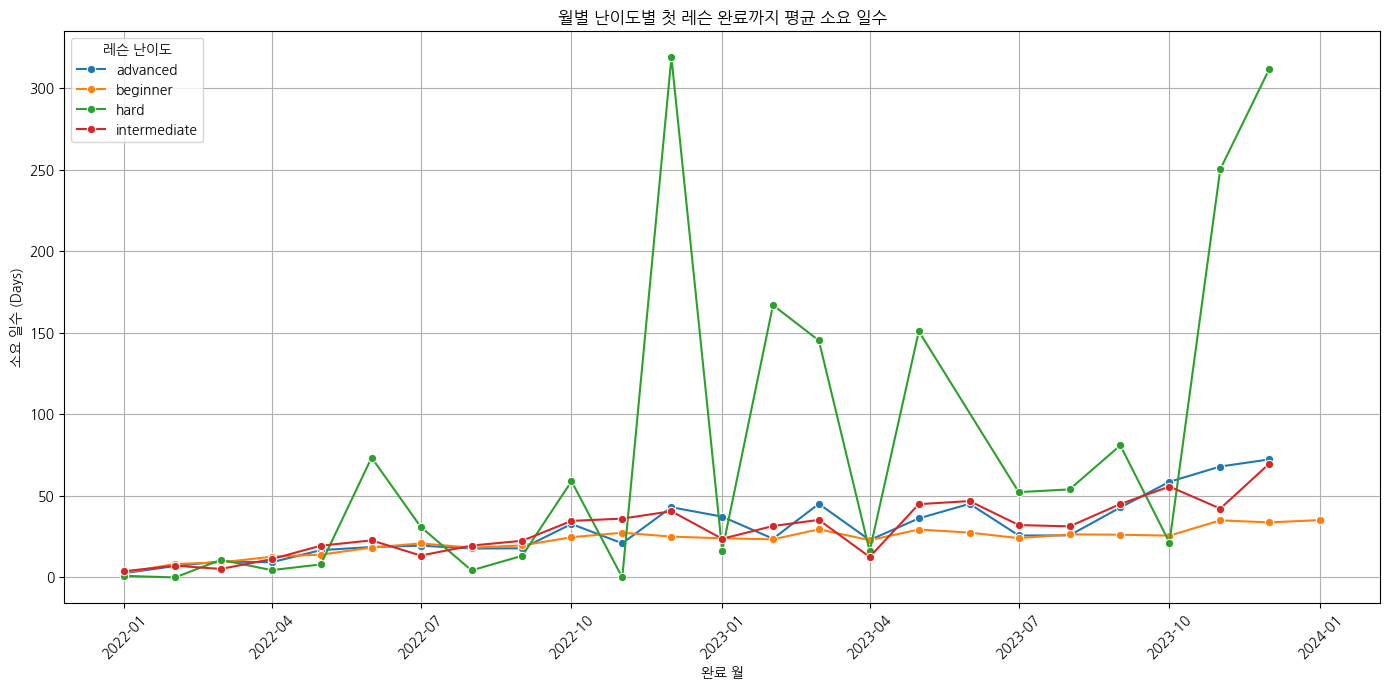

In [ ]:
# 1. complete_signup에서 user_id, signup_time 가져오기
signup_info = complete_signup[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'signup_time'})
signup_info['signup_time'] = pd.to_datetime(signup_info['signup_time'])

# 2. complete_lesson에서 user_id, content.id, client_event_time 가져오기
lesson_complete_info = complete_lesson[['user_id', 'content.id', 'client_event_time']].copy()
lesson_complete_info['client_event_time'] = pd.to_datetime(lesson_complete_info['client_event_time'])

# 3. content_info에서 content.id별 content.difficulty 가져오기
content_info = start_content[['content.id', 'content.difficulty']].drop_duplicates()

# 4. 레슨 완료 데이터에 content.difficulty 붙이기
lesson_complete_with_difficulty = lesson_complete_info.merge(content_info, on='content.id', how='left')

# 5. 회원가입시간과 레슨완료시간 병합
lesson_complete_with_signup = lesson_complete_with_difficulty.merge(signup_info, on='user_id', how='left')

# 6. activation_days 계산 (완료시간 - 가입시간)
lesson_complete_with_signup['activation_days'] = (lesson_complete_with_signup['client_event_time'] - lesson_complete_with_signup['signup_time']).dt.days

# 7. 완료 월 컬럼 추가
lesson_complete_with_signup['complete_month'] = lesson_complete_with_signup['client_event_time'].dt.to_period('M').dt.to_timestamp()

# 8. 유저별 첫 레슨 완료만 추출
first_complete_per_user = (
    lesson_complete_with_signup
    .sort_values('client_event_time')
    .groupby('user_id')
    .first()
    .reset_index()
)

# 9. 월별 난이도별 평균 activation_days
monthly_activation = (
    first_complete_per_user
    .groupby(['complete_month', 'content.difficulty'])['activation_days']
    .mean()
    .reset_index()
)

print("\n--- 월별 난이도별 첫 레슨 완료까지 평균 소요 일수 ---")
print(monthly_activation)

# 10. 시각화
plt.figure(figsize=(14,7))
sns.lineplot(x='complete_month', y='activation_days', hue='content.difficulty', data=monthly_activation, marker='o')
plt.title('월별 난이도별 첫 레슨 완료까지 평균 소요 일수')
plt.xlabel('완료 월')
plt.ylabel('소요 일수 (Days)')
plt.grid(True)
plt.legend(title='레슨 난이도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 1. content.difficulty 정보 가져오기
content_info = start_content[['content.id', 'content.difficulty']].drop_duplicates()

# 2. 레슨 시작/완료 정보 복사
lesson_start_info = enter_lesson[['user_id', 'content.id', 'lesson.id', 'client_event_time']].copy()
lesson_complete_info = complete_lesson[['user_id', 'content.id', 'lesson.id', 'client_event_time']].copy()

# 3. content.difficulty 붙이기
lesson_start_info = lesson_start_info.merge(content_info, on='content.id', how='left')

# 4. 시작 월 추가
lesson_start_info['start_month'] = lesson_start_info['client_event_time'].dt.to_period('M').dt.to_timestamp()

# 5. '완료 여부'를 정확하게 매칭 (user_id + lesson.id 동시에)
# 완료한 레슨을 (user_id, lesson.id) 튜플로 만들기
completed_lessons = set(zip(lesson_complete_info['user_id'], lesson_complete_info['lesson.id']))

# 시작 레슨에 완료 여부 추가
lesson_start_info['is_completed'] = lesson_start_info.apply(
    lambda x: (x['user_id'], x['lesson.id']) in completed_lessons,
    axis=1
)

# 6. 월별 + 난이도별 시작/완료 건수 집계
monthly_completion = (
    lesson_start_info
    .groupby(['start_month', 'content.difficulty'])
    .agg(
        start_count=('lesson.id', 'count'),
        complete_count=('is_completed', 'sum')
    )
    .reset_index()
)

# 7. 완료율 계산
monthly_completion['completion_rate (%)'] = (monthly_completion['complete_count'] / monthly_completion['start_count']) * 100
monthly_completion = monthly_completion.round(1)

# 8. 결과 출력
print("\n--- 월별 난이도별 레슨 완료율 (완전 수정본) ---")
print(monthly_completion)

# 9. 시각화
plt.figure(figsize=(14,7))
sns.lineplot(x='start_month', y='completion_rate (%)', hue='content.difficulty', data=monthly_completion, marker='o')
plt.title('월별 난이도별 레슨 완료율 (%)')
plt.xlabel('시작 월')
plt.ylabel('완료율 (%)')
plt.grid(True)
plt.legend(title='레슨 난이도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MemoryError: 

## 활성화 실패 유저 행동 분석

- 회원가입은 했지만 레슨 완료를 하지 못한 유저

In [ ]:
# 1. 활성화 실패 유저 리스트 추출
failed_users = activation_with_first_action[activation_with_first_action['lesson_completed'] == False]['user_id'].unique()

print(f"\n--- 활성화 실패 유저 수: {len(failed_users)}명 ---")


--- 활성화 실패 유저 수: 113588명 ---


In [ ]:
# 2. all_events에서 실패 유저들의 행동만 추출
failed_user_events = all_events[all_events['user_id'].isin(failed_users)].copy()

print(f"\n--- 실패 유저 행동 로그 샘플 ---")
print(failed_user_events.head())



--- 실패 유저 행동 로그 샘플 ---
                             user_id                client_event_time  \
3   40acc1ddfc012f3d2f58a3de95e9e748 2023-03-12 17:32:39.271000+09:00   
17  c4fc69f67c8c96458e51072b5474ff5d 2023-03-18 19:00:24.428000+09:00   
32  3275a306653a1d829e65ed680ac2c18e 2023-02-08 11:52:55.181000+09:00   
36  a2569bd2dfcec62b753eb972a9054dd0 2023-03-08 18:38:12.384000+09:00   
37  b5be6979349d14373cc0a24c1274b9a7 2023-03-08 18:57:20.724000+09:00   

                  event_type  
3   click.cancel_plan_button  
17  click.cancel_plan_button  
32  click.cancel_plan_button  
36  click.cancel_plan_button  
37  click.cancel_plan_button  


In [ ]:
# 3. 유저별 행동 수, 행동 종류 수 집계
failed_user_behavior_summary = (
    failed_user_events
    .groupby('user_id')
    .agg(
        action_count=('event_type', 'count'),
        unique_action_count=('event_type', 'nunique')
    )
    .reset_index()
)

print(f"\n--- 실패 유저별 행동 요약 ---")
print(failed_user_behavior_summary.head())


--- 실패 유저별 행동 요약 ---
                            user_id  action_count  unique_action_count
0  000117267e1dd62481ef3ae7fb420107             2                    2
1  0001f28a707789a7d78dc28fd2e84dce             8                    3
2  0002a612daa63284cc741241df6f4b11             5                    3
3  0002cebfe69ec57026c34088069384ab             5                    4
4  00030c0a1787ff2a9d612cbff11d9ba8             2                    2


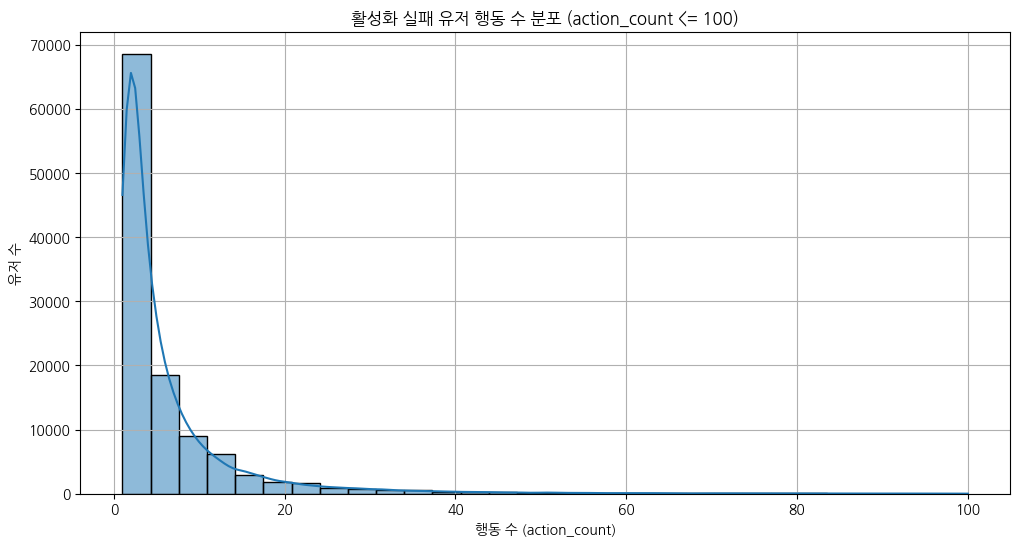

In [ ]:
# 행동 수 100 이하만 필터링
filtered_behavior = failed_user_behavior_summary[failed_user_behavior_summary['action_count'] <= 100]

plt.figure(figsize=(12,6))
sns.histplot(filtered_behavior['action_count'], bins=30, kde=True)
plt.title('활성화 실패 유저 행동 수 분포 (action_count <= 100)')
plt.xlabel('행동 수 (action_count)')
plt.ylabel('유저 수')
plt.grid(True)
plt.show()

- 관찰
    - 대다수 유저는 행동 수가 1~5회 이내
    - 행동 수가 10회를 넘는 유저는 거의 없음
    - 극소수만 20회 이상 행동

- 해석
    - 실패 유저들은 대부분 몇 번 클릭해보고 바로 이탈
    - 서비스에 "깊게 몰입"하거나 "여러 기능을 탐색"해보지도 못하고 떠남남

- 인사이트
    - 가입 직후 1~5번 행동 안에 유저를 매료시키지 않으면 이탈 가능성 매우 높음
    - 초반 1~2번 행동 때 바로 강한 온보딩(ex: 추천 콘텐츠 제시, 퀘스트 부여)이 필요

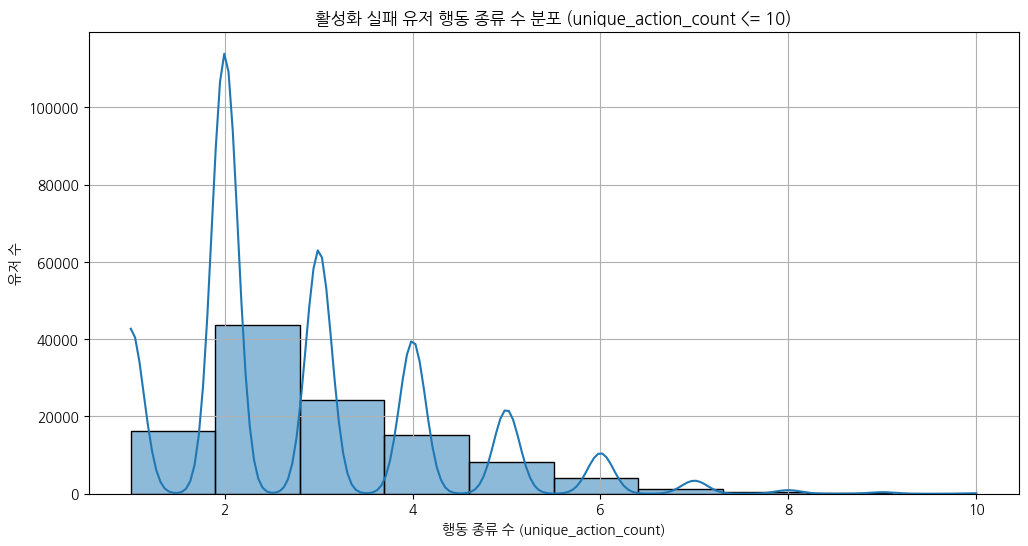

In [ ]:
# 행동 종류 수 10 이하만 필터링
filtered_behavior = failed_user_behavior_summary[failed_user_behavior_summary['unique_action_count'] <= 10]

plt.figure(figsize=(12,6))
sns.histplot(filtered_behavior['unique_action_count'], bins=10, kde=True)
plt.title('활성화 실패 유저 행동 종류 수 분포 (unique_action_count <= 10)')
plt.xlabel('행동 종류 수 (unique_action_count)')
plt.ylabel('유저 수')
plt.grid(True)
plt.show()

- 관찰
    - 행동 종류가 2~3개인 유저가 가장 많음음
    - 행동 종류가 4개를 넘는 경우는 급격히 낮아짐짐

- 해석
    - 실패 유저들은 대부분 2~3가지 기능 정도만 체험하고 이탈
    - 한두 가지 주요 행동(ex: 콘텐츠 보기, 메인 페이지 이동)만 하고 → 더 다양한 기능은 체험하지 못함함

- 인사이트
    - 온보딩 단계에서 유저가 다양한 기능에 자연스럽게 노출되게 유도
    - '한 가지 기능만 쓰고 이탈'하는 걸 막기 위해 "다음 행동 추천"


--- 활성화 실패 유저 행동 타입 분포 ---
                                 event_type   count
0                         enter.lesson_page  365753
1                           enter.main_page  129264
2                        enter.content_page  113688
3                           complete.signup  113588
4                        enter.payment_page   75472
5                          start.free_trial   18627
6    click.lesson_page_related_question_box   18431
7   click.content_page_start_content_button   10414
8                             start.content    8793
9     click.content_page_more_review_button    1359
10                    complete.subscription    1126
11                 click.cancel_plan_button    1072
12                       renew.subscription     573
13                 resubscribe.subscription       2


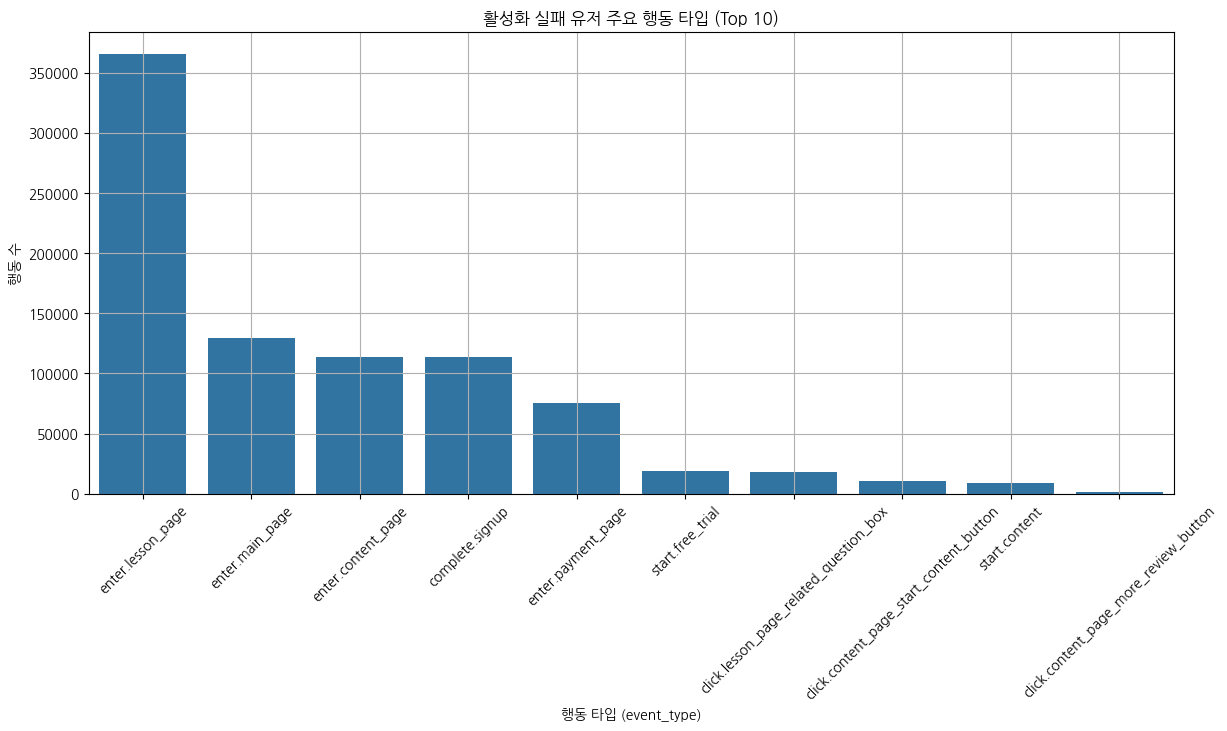

In [ ]:
# 1. 실패 유저 행동 타입별 카운트 (수정본)
failed_event_distribution = (
    failed_user_events['event_type']
    .value_counts()
    .rename_axis('event_type')
    .reset_index(name='count')
)

print("\n--- 활성화 실패 유저 행동 타입 분포 ---")
print(failed_event_distribution)

# 2. 상위 10개 행동만 시각화
top_n = 10
failed_event_distribution_top = failed_event_distribution.head(top_n)

plt.figure(figsize=(14,6))
sns.barplot(data=failed_event_distribution_top, x='event_type', y='count')
plt.title('활성화 실패 유저 주요 행동 타입 (Top 10)')
plt.xlabel('행동 타입 (event_type)')
plt.ylabel('행동 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 클러스터링 기반 활성화 실패 유저 유형 분류

In [ ]:
# 1. 기본 정보
clustering_features = failed_user_behavior_summary.copy()

# 2. lesson_completed 정보 추가 (성공 유저 0명, 실패 유저 1명만 존재)
clustering_features['lesson_completed'] = 0  # 실패 유저니까 다 0

print("\n--- 클러스터링용 데이터 샘플 ---")
print(clustering_features.head())


--- 클러스터링용 데이터 샘플 ---
                            user_id  action_count  unique_action_count  \
0  000117267e1dd62481ef3ae7fb420107             2                    2   
1  0001f28a707789a7d78dc28fd2e84dce             8                    3   
2  0002a612daa63284cc741241df6f4b11             5                    3   
3  0002cebfe69ec57026c34088069384ab             5                    4   
4  00030c0a1787ff2a9d612cbff11d9ba8             2                    2   

   lesson_completed  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [ ]:
# 1. 스케일링 (k-means는 거리 기반이라 스케일 조정 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_features[['action_count', 'unique_action_count', 'lesson_completed']])

# 2. 클러스터링 실행 (k=3 추천, 상황에 따라 늘릴 수도 있음)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 3. 결과 저장
clustering_features['cluster'] = clusters

print("\n--- 클러스터링 결과 ---")
print(clustering_features['cluster'].value_counts())


--- 클러스터링 결과 ---
cluster
2    59999
0    53588
1        1
Name: count, dtype: int64


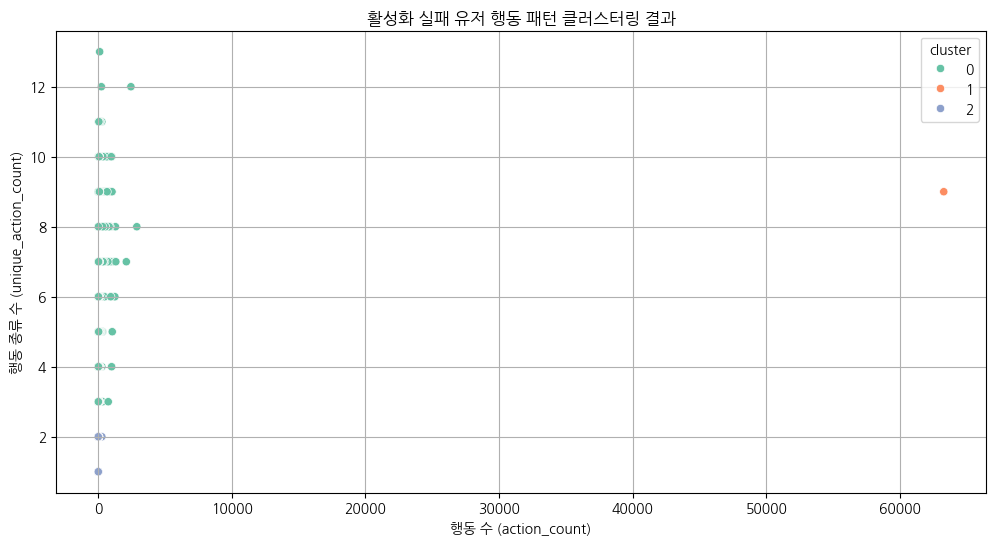

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=clustering_features,
    x='action_count',
    y='unique_action_count',
    hue='cluster',
    palette='Set2'
)
plt.title('활성화 실패 유저 행동 패턴 클러스터링 결과')
plt.xlabel('행동 수 (action_count)')
plt.ylabel('행동 종류 수 (unique_action_count)')
plt.grid(True)
plt.show()

In [ ]:
# 클러스터별 평균 행동 수 / 행동 종류 수 보기
cluster_summary = (
    clustering_features
    .groupby('cluster')
    .agg(
        avg_action_count=('action_count', 'mean'),
        avg_unique_action_count=('unique_action_count', 'mean'),
        user_count=('user_id', 'count')
    )
    .reset_index()
)

print("\n--- 클러스터별 요약 ---")
print(cluster_summary)


--- 클러스터별 요약 ---
   cluster  avg_action_count  avg_unique_action_count  user_count
0        0         11.935191                 3.974397       53588
1        1      63292.000000                 9.000000           1
2        2          2.588160                 1.727395       59999


- 클러스터 0 (탐색형 유저)
    - 평균적으로 12번 정도 다양한 행동
    - 행동 종류도 4종류 가까이 시도
    - 관심은 있었지만 몰입하거나 전환되지는 않은 케이스
    - 조금만 더 밀어주면 활성화 가능성 있음
    - 맞춤형 추천 콘텐츠, 개인화 알림, 빠른 온보딩 퀘스트 유도 추천

- 클러스터 1 (이상치)
    - 1명이 행동 63,000번 이상
    - 이건 정상적인 유저가 아니라 봇, 테스트 계정, 오류 데이터일 확률이 매우 높음
    - 이 유저는 분석에서 제외

- 클러스터 2 (즉시 이탈형 유저)
    - 평균 행동 2.6회, 행동 종류도 2개 안팎
    - 거의 아무 것도 안 해보고 바로 나간 케이스
    - 초기 진입 장벽이 있거나, 기대했던 서비스와 달라서 바로 떠난 유저로 추정
    - 첫 화면 개선, 첫 액션 유도 (ex: "1분만에 체험해보기" 같은) 필요

## 활성화 유저 vs 활성화 실패 유저 행동 시퀀스 비교

In [ ]:
# 가입 이후 발생한 이벤트만 필터링
events_with_signup = all_events.merge(signup_info, on='user_id', how='left')
events_after_signup = events_with_signup[events_with_signup['client_event_time'] > events_with_signup['signup_time']]

# user_id별 client_event_time 순서대로 정렬
events_after_signup = events_after_signup.sort_values(['user_id', 'client_event_time'])

# user_id별 event_type을 연결해서 시퀀스 만들기
user_sequences = events_after_signup.groupby('user_id')['event_type'].apply(lambda x: ' -> '.join(x)).reset_index()
user_sequences.columns = ['user_id', 'event_sequence']

# 결과 확인
print("\n--- 유저별 행동 시퀀스 샘플 ---")
print(user_sequences.head())


--- 유저별 행동 시퀀스 샘플 ---
                            user_id  \
0  0000572f2ba8079bcefd2760b632e820   
1  000087537cbfd934375364218ff10f91   
2  000117267e1dd62481ef3ae7fb420107   
3  0001f15911b404f3bf5b8571afafa4e4   
4  0001f28a707789a7d78dc28fd2e84dce   

                                      event_sequence  
0  enter.payment_page -> enter.main_page -> enter...  
1  enter.lesson_page -> enter.lesson_page -> star...  
2                                  enter.lesson_page  
3  enter.lesson_page -> start.content -> complete...  
4  enter.payment_page -> enter.payment_page -> en...  


In [ ]:
top_sequences = user_sequences['event_sequence'].value_counts().head(10)

print("\n--- Top 10 행동 시퀀스 ---")
print(top_sequences)


--- Top 10 행동 시퀀스 ---
event_sequence
enter.lesson_page                                              9596
enter.payment_page                                             7480
enter.main_page                                                5204
enter.lesson_page -> enter.lesson_page                         3030
enter.payment_page -> enter.payment_page                       2813
enter.main_page -> enter.main_page                             2484
enter.lesson_page -> enter.lesson_page -> enter.lesson_page    1535
enter.content_page                                             1374
enter.main_page -> enter.main_page -> enter.main_page          1154
enter.payment_page -> enter.main_page                          1071
Name: count, dtype: int64


In [ ]:
# 활성화 여부 붙이기
user_sequences = user_sequences.merge(
    activation_df[['user_id', 'lesson_completed']],
    on='user_id',
    how='left'
)

# 활성화 성공/실패 그룹별 Top 시퀀스 비교
success_sequences = user_sequences[user_sequences['lesson_completed'] == True]['event_sequence'].value_counts().head(10)
fail_sequences = user_sequences[user_sequences['lesson_completed'] == False]['event_sequence'].value_counts().head(10)

print("\n--- 활성화 성공 유저 Top 10 시퀀스 ---")
print(success_sequences)

print("\n--- 활성화 실패 유저 Top 10 시퀀스 ---")
print(fail_sequences)


--- 활성화 성공 유저 Top 10 시퀀스 ---
event_sequence
enter.lesson_page -> start.content -> complete.lesson                                                                                        246
start.content -> complete.lesson                                                                                                             123
enter.lesson_page -> start.content -> complete.lesson -> complete.lesson                                                                     116
start.content -> complete.lesson -> complete.lesson                                                                                           73
enter.lesson_page -> start.content -> enter.lesson_page -> complete.lesson -> enter.lesson_page -> enter.lesson_page                          70
enter.lesson_page -> start.content -> enter.lesson_page -> enter.lesson_page -> complete.lesson -> enter.lesson_page -> enter.lesson_page     61
enter.lesson_page -> start.content -> complete.lesson -> complete.lesson -> complete.

## 활성화 퍼널 분석

### 전체 퍼널(회원가입 완료 > 콘텐츠 진입 > 콘텐츠 시작 > 레슨 시작 > 레슨 완료 > 콘텐츠 전체 완료)

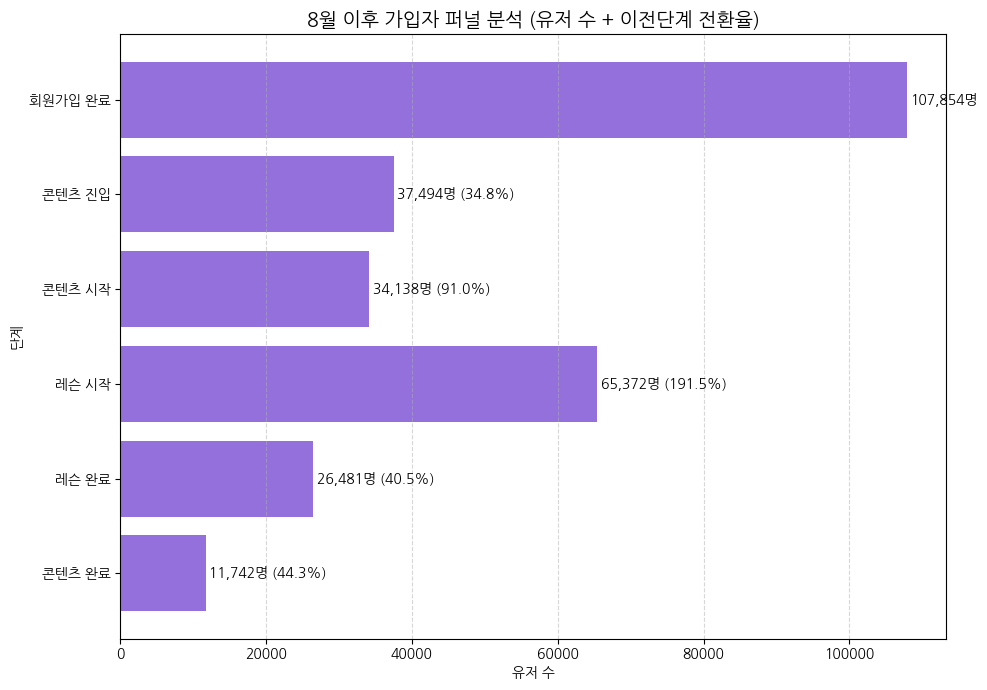


--- 8월 이후 가입자 퍼널 단계별 유저 수 및 정확한 이전단계 대비 전환율 ---
        단계    유저 수  이전단계 대비 전환율 (%)
0  회원가입 완료  107854              NaN
1   콘텐츠 진입   37494             34.8
2   콘텐츠 시작   34138             91.0
3    레슨 시작   65372            191.5
4    레슨 완료   26481             40.5
5   콘텐츠 완료   11742             44.3


In [ ]:
# 1. 가입일 기준 필터링 (2022-08-01 이후)
complete_signup['signup_time'] = pd.to_datetime(complete_signup['client_event_time'])
signup_after_august = complete_signup[complete_signup['signup_time'] >= '2022-08-01']
signup_users_august = signup_after_august['user_id'].unique()

# 2. 필요한 이벤트별 유저 필터링
enter_content_users = enter_content['user_id'].unique()
start_content_users = start_content['user_id'].unique()
enter_lesson_users = enter_lesson['user_id'].unique()
complete_lesson_users = complete_lesson['user_id'].unique()
end_content_users = end_content['user_id'].unique()

# 3. 단계별 유저 수 세기
funnel_steps_august = {
    '회원가입 완료': len(signup_users_august),
    '콘텐츠 진입': len(set(signup_users_august) & set(enter_content_users)),
    '콘텐츠 시작': len(set(signup_users_august) & set(start_content_users)),
    '레슨 시작': len(set(signup_users_august) & set(enter_lesson_users)),
    '레슨 완료': len(set(signup_users_august) & set(complete_lesson_users)),
    '콘텐츠 완료': len(set(signup_users_august) & set(end_content_users)),
}

funnel_august_df = pd.DataFrame(list(funnel_steps_august.items()), columns=['단계', '유저 수'])

# 4. 퍼널 순서 정리 (정방향 그대로 유지)
funnel_august_df = funnel_august_df.reset_index(drop=True)

# 5. '이전 단계 대비' 전환율(%) 계산
funnel_august_df['이전단계 대비 전환율 (%)'] = (
    funnel_august_df['유저 수'] / funnel_august_df['유저 수'].shift(1) * 100
).round(1)

# 6. 시각화용 데이터는 뒤집기
funnel_plot = funnel_august_df.iloc[::-1].reset_index(drop=True)

# 7. 퍼널 수평 막대 시각화
plt.figure(figsize=(10, 7))
bars = plt.barh(funnel_plot['단계'], funnel_plot['유저 수'], color='mediumpurple')

for idx, bar in enumerate(bars):
    width = bar.get_width()
    if idx < len(funnel_plot):
        rate = funnel_plot.loc[idx, '이전단계 대비 전환율 (%)']
        if not pd.isna(rate):
            text = f'{int(width):,}명 ({rate:.1f}%)'
        else:
            text = f'{int(width):,}명'
    else:
        text = f'{int(width):,}명'
    plt.text(width + 500, bar.get_y() + bar.get_height()/2,
             text, va='center', fontsize=10)

plt.title('8월 이후 가입자 퍼널 분석 (유저 수 + 이전단계 전환율)', fontsize=14)
plt.xlabel('유저 수')
plt.ylabel('단계')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 8. 퍼널 테이블 출력
print("\n--- 8월 이후 가입자 퍼널 단계별 유저 수 및 정확한 이전단계 대비 전환율 ---")
print(funnel_august_df)

#### 가입월 기준 코호트


--- [8월 이후 가입자] 퍼널 유저 수 ---
              회원가입 완료  콘텐츠 진입  콘텐츠 시작  레슨 시작  레슨 완료  콘텐츠 완료
signup_month                                               
2022-08-01       3393    1431     578    827    629     413
2022-09-01       2944    1031     465    600    413     249
2022-10-01       2836    1016     416    664    370     220
2022-11-01       3422    1607     910   1474    832     554
2022-12-01       8461    3328    1371   6271   1261     920
2023-01-01      10893    3963    1674   7633   1528    1118
2023-02-01       6172    1830    1115   2542    927     420
2023-03-01       7921    2318    1177   2270    981     546
2023-04-01       5779    2256    1944   2378   1420     752
2023-05-01       4767    3015    2339   3382   1423     502
2023-06-01       6706    2552    3171   5263   2379     908
2023-07-01       7812    2581    3727   6549   2821    1035
2023-08-01       6834    2375    3157   5629   2471     898
2023-09-01       6539    2293    2765   4119   1905     801
2023-10-01 

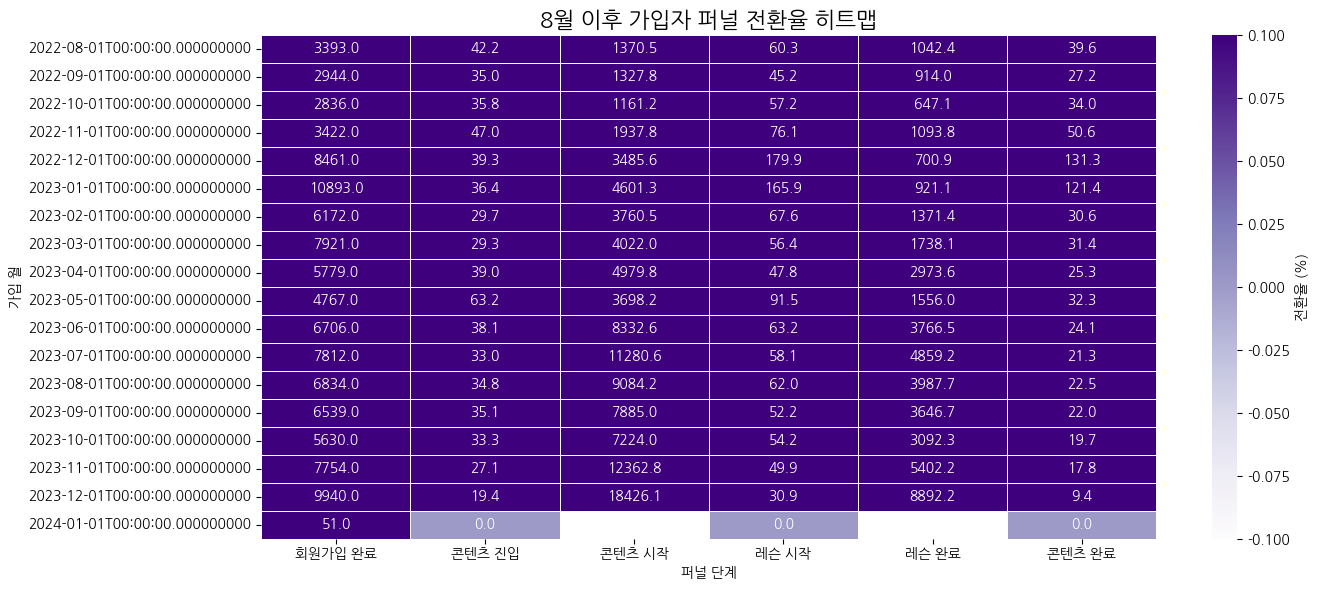

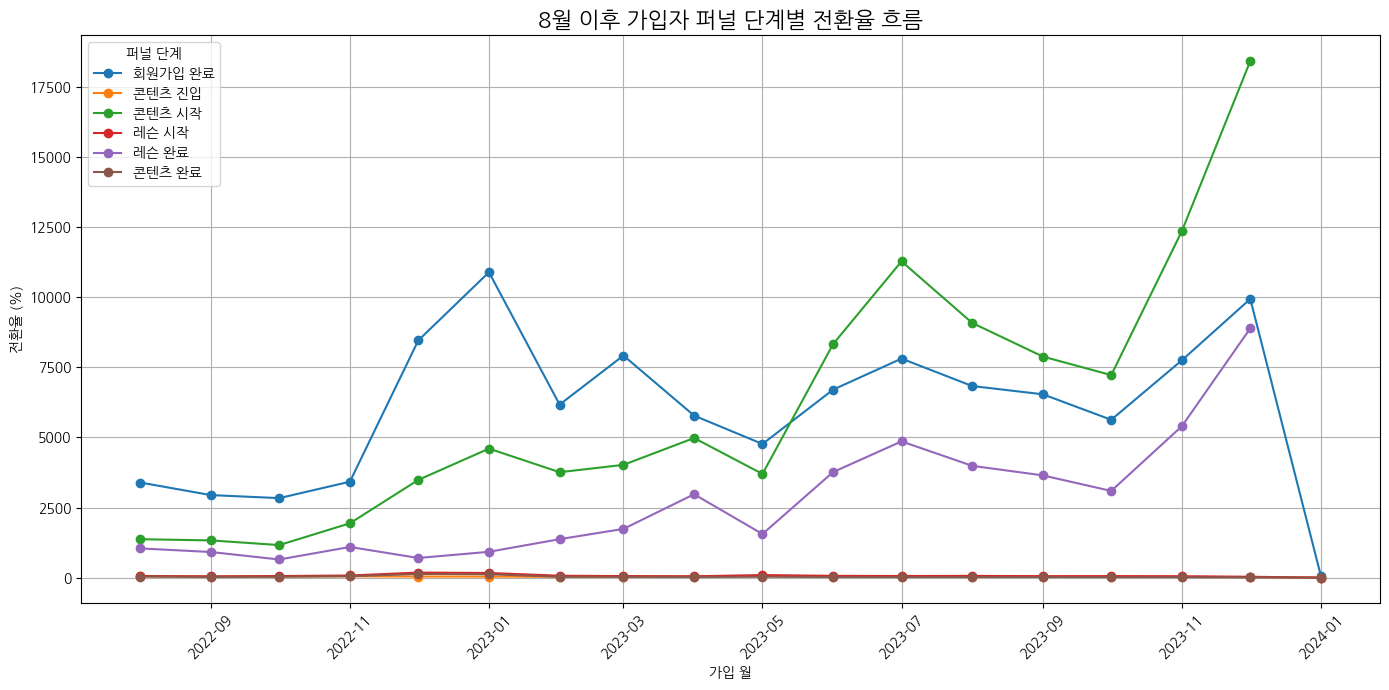

In [ ]:
# 1. 가입일에서 가입월 추출
complete_signup['signup_time'] = pd.to_datetime(complete_signup['client_event_time'])
complete_signup['signup_month'] = complete_signup['signup_time'].dt.to_period('M').dt.to_timestamp()

# 2. 2022-08-01 이후 가입자만 필터링
signup_after_august = complete_signup[complete_signup['signup_time'] >= '2022-08-01']
signup_users_august = signup_after_august['user_id'].unique()
signup_info_august = signup_after_august[['user_id', 'signup_month']]

# 3. 이벤트에도 8월 이후 가입자만 매칭
def attach_signup_month(df, signup_info):
    return df.merge(signup_info, on='user_id', how='left')

enter_content_month = attach_signup_month(
    enter_content[enter_content['user_id'].isin(signup_users_august)],
    signup_info_august
)
start_content_month = attach_signup_month(
    start_content[start_content['user_id'].isin(signup_users_august)],
    signup_info_august
)
enter_lesson_month = attach_signup_month(
    enter_lesson[enter_lesson['user_id'].isin(signup_users_august)],
    signup_info_august
)
complete_lesson_month = attach_signup_month(
    complete_lesson[complete_lesson['user_id'].isin(signup_users_august)],
    signup_info_august
)
end_content_month = attach_signup_month(
    end_content[end_content['user_id'].isin(signup_users_august)],
    signup_info_august
)

# 4. 가입월별 단계별 유저 수 계산
funnel_by_month = (
    signup_info_august.groupby('signup_month')['user_id'].nunique().rename('회원가입 완료')
    .to_frame()
    .join(enter_content_month.groupby('signup_month')['user_id'].nunique().rename('콘텐츠 진입'))
    .join(start_content_month.groupby('signup_month')['user_id'].nunique().rename('콘텐츠 시작'))
    .join(enter_lesson_month.groupby('signup_month')['user_id'].nunique().rename('레슨 시작'))
    .join(complete_lesson_month.groupby('signup_month')['user_id'].nunique().rename('레슨 완료'))
    .join(end_content_month.groupby('signup_month')['user_id'].nunique().rename('콘텐츠 완료'))
    .fillna(0)
    .astype(int)
)

# 5. 가입월별 이전단계 대비 전환율 계산
conversion_rate_by_month = funnel_by_month.copy()
steps = conversion_rate_by_month.columns.tolist()

for i in range(1, len(steps)):
    conversion_rate_by_month[steps[i]] = (conversion_rate_by_month[steps[i]] / conversion_rate_by_month[steps[i-1]]) * 100

conversion_rate_by_month = conversion_rate_by_month.round(1)

# 6. 결과 출력
print("\n--- [8월 이후 가입자] 퍼널 유저 수 ---")
print(funnel_by_month)

print("\n--- [8월 이후 가입자] 퍼널 전환율 (%) ---")
print(conversion_rate_by_month)

# 7. 시각화: 히트맵
plt.figure(figsize=(14, 6))
sns.heatmap(conversion_rate_by_month, annot=True, fmt=".1f", cmap="Purples", linewidths=0.5, cbar_kws={'label': '전환율 (%)'})
plt.title('8월 이후 가입자 퍼널 전환율 히트맵', fontsize=16)
plt.xlabel('퍼널 단계')
plt.ylabel('가입 월')
plt.tight_layout()
plt.show()

# 8. 시각화: 라인 그래프
plt.figure(figsize=(14, 7))
for step in conversion_rate_by_month.columns:
    plt.plot(conversion_rate_by_month.index, conversion_rate_by_month[step], marker='o', label=step)

plt.title('8월 이후 가입자 퍼널 단계별 전환율 흐름', fontsize=16)
plt.xlabel('가입 월')
plt.ylabel('전환율 (%)')
plt.xticks(rotation=45)
plt.legend(title='퍼널 단계')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# --- 1. 레슨 완료 실패자 추출 ---
# 8월 이후 가입자 기준 enter_lesson, complete_lesson 필터
enter_lesson_august = enter_lesson[enter_lesson['user_id'].isin(signup_users_august)]
complete_lesson_august = complete_lesson[complete_lesson['user_id'].isin(signup_users_august)]

lesson_start_users = enter_lesson_august['user_id'].drop_duplicates()
lesson_complete_users = complete_lesson_august['user_id'].drop_duplicates()

lesson_fail_users = set(lesson_start_users) - set(lesson_complete_users)

print(f"\n--- 레슨 완료 실패자 수: {len(lesson_fail_users):,}명 ---")

# --- 2. 이탈자 마지막 행동 분석 ---
all_events_august = all_events[all_events['user_id'].isin(signup_users_august)]

fail_user_events = all_events_august[all_events_august['user_id'].isin(lesson_fail_users)]
fail_user_events['client_event_time'] = pd.to_datetime(fail_user_events['client_event_time'])

# 유저별 마지막 행동
last_events = (
    fail_user_events.sort_values('client_event_time')
    .groupby('user_id')
    .tail(1)
)

last_action_counts = last_events['event_type'].value_counts()

print("\n--- 레슨 완료 실패자의 마지막 행동 유형 분포 ---")
print(last_action_counts)

# --- 3. 평균 행동 수, 평균 행동 다양성 분석 ---
user_event_counts = fail_user_events.groupby('user_id')['event_type'].count()
user_unique_actions = fail_user_events.groupby('user_id')['event_type'].nunique()

print(f"\n--- 레슨 완료 실패자 평균 행동 수: {user_event_counts.mean():.2f}개 ---")
print(f"--- 레슨 완료 실패자 평균 행동 다양성(행동 종류 수): {user_unique_actions.mean():.2f}개 ---")

# --- 4. 이탈자 행동 시퀀스 Top 5 ---
user_sequences = (
    fail_user_events
    .sort_values(['user_id', 'client_event_time'])
    .groupby('user_id')['event_type']
    .apply(lambda x: ' → '.join(x))
)

sequence_counts = user_sequences.value_counts().head(5)

print("\n--- 레슨 완료 실패자 행동 시퀀스 Top 5 ---")
print(sequence_counts)


--- 레슨 완료 실패자 수: 39,617명 ---

--- 레슨 완료 실패자의 마지막 행동 유형 분포 ---
event_type
enter.lesson_page                          23337
enter.payment_page                          5609
enter.content_page                          4391
enter.main_page                             3909
complete.signup                             1018
start.content                                462
click.lesson_page_related_question_box       401
click.cancel_plan_button                     287
click.content_page_start_content_button       84
renew.subscription                            52
complete.subscription                         44
click.content_page_more_review_button         22
resubscribe.subscription                       1
Name: count, dtype: int64

--- 레슨 완료 실패자 평균 행동 수: 9.89개 ---
--- 레슨 완료 실패자 평균 행동 다양성(행동 종류 수): 3.29개 ---

--- 레슨 완료 실패자 행동 시퀀스 Top 5 ---
event_type
complete.signup → enter.lesson_page                                            7667
complete.signup → enter.lesson_page → enter.lesson_page   

### 레슨 기준 퍼널(회원가입 -> 레슨 시작 -> 레슨 완료)

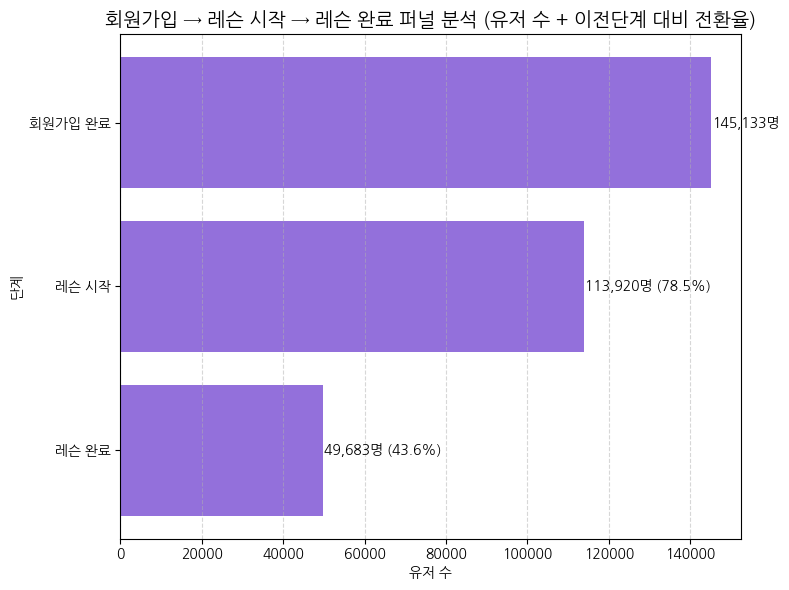


--- 레슨 퍼널 유저 수 및 이전단계 대비 전환율 ---
        단계    유저 수  이전단계 대비 전환율 (%)
0  회원가입 완료  145133              NaN
1    레슨 시작  113920             78.5
2    레슨 완료   49683             43.6


In [ ]:
# 1. 회원가입 완료 유저
signup_users = complete_signup[['user_id']].drop_duplicates()

# 2. 레슨 시작 유저
lesson_start_users = enter_lesson[['user_id']].drop_duplicates()

# 3. 레슨 완료 유저
lesson_complete_users = complete_lesson[['user_id']].drop_duplicates()

# 4. 퍼널 단계별 유저 수 계산
funnel = pd.DataFrame({
    '단계': ['회원가입 완료', '레슨 시작', '레슨 완료'],
    '유저 수': [
        signup_users['user_id'].nunique(),
        lesson_start_users['user_id'].nunique(),
        lesson_complete_users['user_id'].nunique()
    ]
})

# 5. 퍼널 순서 (위 -> 아래)
funnel = funnel.reset_index(drop=True)

# 6. '현재단계 유저 수 ÷ 이전단계 유저 수'로 전환율 계산
funnel['이전단계 대비 전환율 (%)'] = (funnel['유저 수'] / funnel['유저 수'].shift(1)) * 100
funnel['이전단계 대비 전환율 (%)'] = funnel['이전단계 대비 전환율 (%)'].round(1)

# 7. 시각화용 데이터 뒤집기
funnel_plot = funnel.iloc[::-1].reset_index(drop=True)

# 8. 수평 막대 그래프
plt.figure(figsize=(8, 6))
bars = plt.barh(funnel_plot['단계'], funnel_plot['유저 수'], color='mediumpurple')

# 막대 옆에 유저 수 + 전환율 표시
for idx, bar in enumerate(bars):
    width = bar.get_width()
    if idx < len(bars) - 1:
        rate = funnel_plot.loc[idx, '이전단계 대비 전환율 (%)']
        text = f'{int(width):,}명 ({rate:.1f}%)'
    else:
        text = f'{int(width):,}명'

    plt.text(width + 300, bar.get_y() + bar.get_height()/2,
             text, va='center', fontsize=10)

plt.title('회원가입 → 레슨 시작 → 레슨 완료 퍼널 분석 (유저 수 + 이전단계 대비 전환율)', fontsize=14)
plt.xlabel('유저 수')
plt.ylabel('단계')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 9. 퍼널 테이블 출력
print("\n--- 레슨 퍼널 유저 수 및 이전단계 대비 전환율 ---")
print(funnel)

In [ ]:
complete_signup['signup_time'] = pd.to_datetime(complete_signup['client_event_time'])
complete_signup['signup_month'] = complete_signup['signup_time'].dt.to_period('M').dt.to_timestamp()

signup_info_full = complete_signup[['user_id', 'signup_month']]

def attach_signup_month(df, signup_info):
    return df.merge(signup_info, on='user_id', how='left')

enter_lesson_full = attach_signup_month(enter_lesson, signup_info_full)
complete_lesson_full = attach_signup_month(complete_lesson, signup_info_full)

# 레슨 완료 중복 제거 (유저별 1회만 인정)
complete_lesson_unique = complete_lesson[['user_id']].drop_duplicates()

# 다시 가입월 매칭
complete_lesson_full = attach_signup_month(complete_lesson_unique, signup_info_full)

# 퍼널 유저 수 계산
lesson_funnel_by_month = (
    signup_info_full.groupby('signup_month')['user_id'].nunique().rename('회원가입 완료')
    .to_frame()
    .join(enter_lesson_full.groupby('signup_month')['user_id'].nunique().rename('레슨 시작'))
    .join(complete_lesson_full.groupby('signup_month')['user_id'].nunique().rename('레슨 완료'))
    .fillna(0)
    .astype(int)
)

print("\n--- 가입월별 레슨 퍼널 유저 수 (전체 가입자 기준) ---")
print(lesson_funnel_by_month)


--- 가입월별 레슨 퍼널 유저 수 (전체 가입자 기준) ---
              회원가입 완료  레슨 시작  레슨 완료
signup_month                       
2022-01-01       7306   4041   1056
2022-02-01       4670   2767    736
2022-03-01       5617   4054    745
2022-04-01       4726   3548    575
2022-05-01       5011   3792    615
2022-06-01       5547   4303    675
2022-07-01       4402   1847    662
2022-08-01       3393    827    629
2022-09-01       2944    600    413
2022-10-01       2836    664    370
2022-11-01       3422   1474    832
2022-12-01       8461   6271   1261
2023-01-01      10893   7633   1528
2023-02-01       6172   2542    927
2023-03-01       7921   2270    981
2023-04-01       5779   2378   1420
2023-05-01       4767   3382   1423
2023-06-01       6706   5263   2379
2023-07-01       7812   6549   2821
2023-08-01       6834   5629   2471
2023-09-01       6539   4119   1905
2023-10-01       5630   3913   1675
2023-11-01       7754   6172   2697
2023-12-01       9940   5686   2744
2024-01-01         51      

In [ ]:
lesson_conversion_by_month = lesson_funnel_by_month.copy()

# 2. 정확한 전환율 계산
lesson_conversion_by_month['레슨 시작 전환율 (%)'] = (lesson_conversion_by_month['레슨 시작'] / lesson_conversion_by_month['회원가입 완료']) * 100
lesson_conversion_by_month['레슨 완료 전환율 (%)'] = (lesson_conversion_by_month['레슨 완료'] / lesson_conversion_by_month['레슨 시작']) * 100

# 3. 소수점 한 자리로 반올림
lesson_conversion_by_month = lesson_conversion_by_month.round(1)

# 4. 회원가입, 레슨 시작, 레슨 완료 수는 제거하고 전환율만 보기 쉽게 남기기
lesson_conversion_rate_only = lesson_conversion_by_month[['레슨 시작 전환율 (%)', '레슨 완료 전환율 (%)']]

# 5. 출력
print("\n--- 가입월별 레슨 퍼널 전환율 (%) (정확한 기준) ---")
print(lesson_conversion_rate_only)


--- 가입월별 레슨 퍼널 전환율 (%) (정확한 기준) ---
              레슨 시작 전환율 (%)  레슨 완료 전환율 (%)
signup_month                              
2022-01-01             55.3           26.1
2022-02-01             59.3           26.6
2022-03-01             72.2           18.4
2022-04-01             75.1           16.2
2022-05-01             75.7           16.2
2022-06-01             77.6           15.7
2022-07-01             42.0           35.8
2022-08-01             24.4           76.1
2022-09-01             20.4           68.8
2022-10-01             23.4           55.7
2022-11-01             43.1           56.4
2022-12-01             74.1           20.1
2023-01-01             70.1           20.0
2023-02-01             41.2           36.5
2023-03-01             28.7           43.2
2023-04-01             41.1           59.7
2023-05-01             70.9           42.1
2023-06-01             78.5           45.2
2023-07-01             83.8           43.1
2023-08-01             82.4           43.9
2023-09-01       

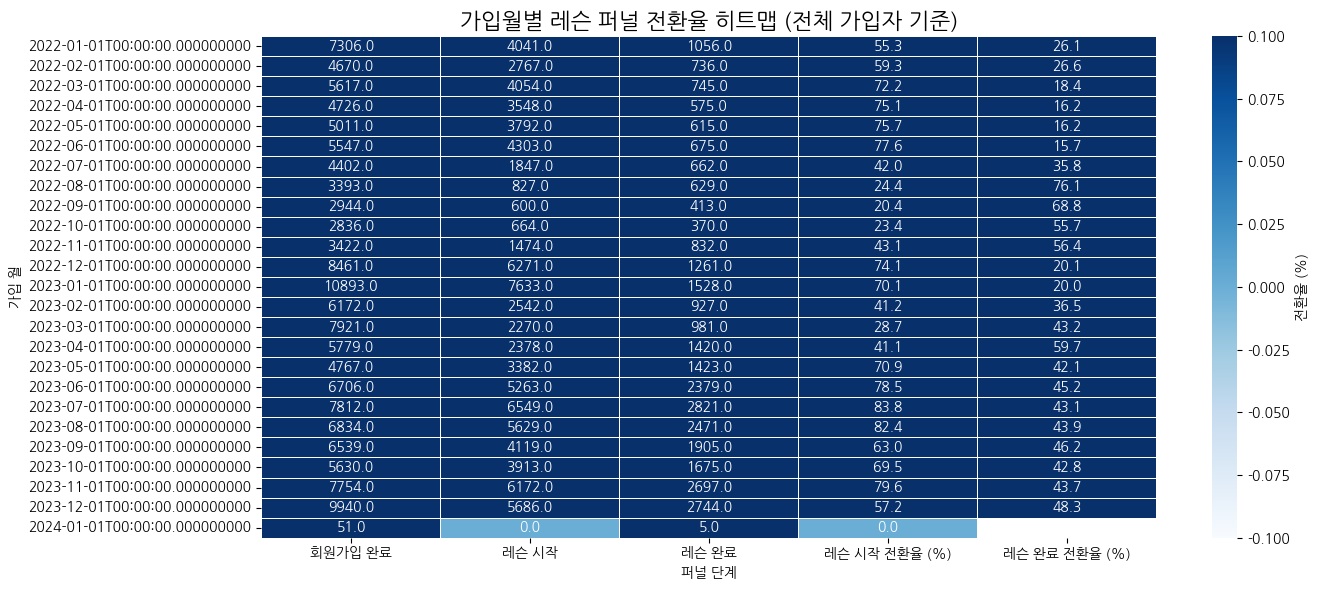

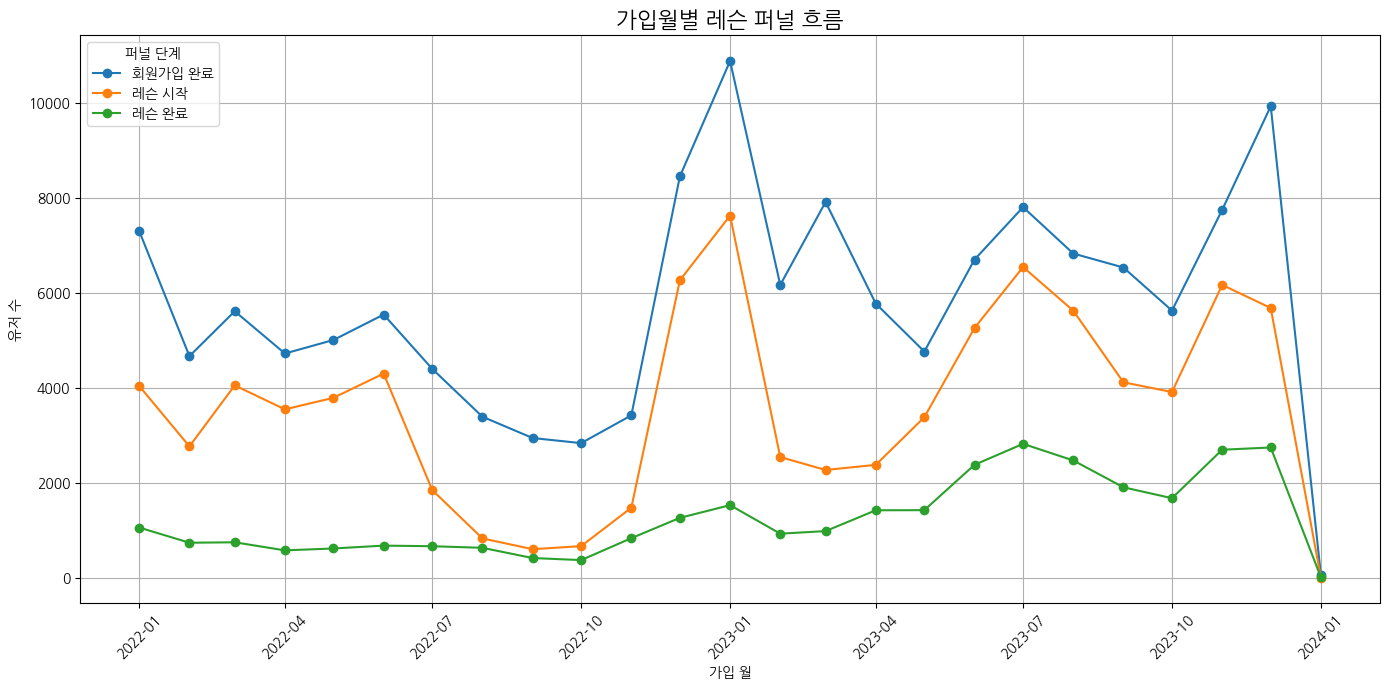

In [ ]:
# 히트맵
plt.figure(figsize=(14,6))
sns.heatmap(lesson_conversion_by_month, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5, cbar_kws={'label': '전환율 (%)'})
plt.title('가입월별 레슨 퍼널 전환율 히트맵 (전체 가입자 기준)', fontsize=16)
plt.xlabel('퍼널 단계')
plt.ylabel('가입 월')
plt.tight_layout()
plt.show()

# 라인그래프
only_counts = lesson_funnel_by_month[['회원가입 완료', '레슨 시작', '레슨 완료']]

plt.figure(figsize=(14,7))
for step in only_counts.columns:
    plt.plot(only_counts.index, only_counts[step], marker='o', label=step)

plt.title('가입월별 레슨 퍼널 흐름', fontsize=16)
plt.xlabel('가입 월')
plt.ylabel('유저 수')
plt.xticks(rotation=45)
plt.legend(title='퍼널 단계')
plt.grid(True)
plt.tight_layout()
plt.show()


## 무료체험 -> 유료 전환 -> 이탈/전환 흐름 분석

In [ ]:
# 각 이벤트별 데이터 로딩 (필요컬럼만)
df_trial = free_trial[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'trial_time'})
df_sub = complete_sub[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'sub_time'})
df_cancel = click_cancel[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'cancel_time'})

# 유저id 기준으로 join
df = df_trial.merge(df_sub, on='user_id', how='left').merge(df_cancel, on='user_id', how='left')

In [ ]:
total_trial = len(df)  # 무료체험 시작한 전체 유저 수
converted = df['sub_time'].notna().sum()  # 유료 구독 전환한 유저 수

# 1. 무료체험만 하고 이탈한 유저 (전환하지 않음)
trial_only = df[df['sub_time'].isna()]
trial_only_count = len(trial_only)
trial_only_rate = trial_only_count / total_trial

# 2. 유료 구독 후 이탈한 유저
churned_after_sub = df[(df['sub_time'].notna()) & (df['cancel_time'].notna())]
churned_after_sub_count = len(churned_after_sub)
churn_rate = churned_after_sub_count / converted if converted > 0 else 0

# 구독유지 유저 수
remain_sub_count = converted - churned_after_sub_count

In [ ]:
# 시각화용 퍼널 값 정의
labels = ['무료체험 시작', '유료 전환', '전환 전 이탈', '전환 후 이탈', '유지']
values = [
    total_trial,
    converted,
    trial_only_count,
    churned_after_sub_count,
    remain_sub_count
]

# 퍼널 차트 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.barh(labels[::-1], values[::-1], color='skyblue')
plt.title('무료체험 → 유료 구독 → 이탈 퍼널')
plt.xlabel('유저 수')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 값 라벨 표시
for bar, value in zip(bars, values[::-1]):
    plt.text(bar.get_width() + total_trial * 0.01, bar.get_y() + bar.get_height() / 2,
             f'{value:,}명', va='center', fontsize=10)

# 전환률/이탈률 텍스트 표시
plt.figtext(0.6, 0.25, f'유료 전환률: {converted / total_trial:.2%}', fontsize=10)
plt.figtext(0.6, 0.20, f'전환 전 이탈률: {trial_only_rate:.2%}', fontsize=10)
plt.figtext(0.6, 0.15, f'전환 후 이탈률: {churn_rate:.2%}', fontsize=10)
plt.tight_layout()
plt.show()

# Retention(유지)

## 리텐션 차트

In [ ]:
# --- 1. 코호트 정의 (가입 월 기준) ---
if 'complete_signup' not in globals() or complete_signup.empty:
    print("오류: 'comp_signup_df' 데이터가 없어 코호트 분석을 시작할 수 없습니다.")
else:
    comp_signup_df = complete_signup.copy()
    if not all(col in comp_signup_df.columns for col in ['user_id', 'client_event_time']):
        print("오류: 'comp_signup'에 'user_id' 또는 'client_event_time' 컬럼이 없습니다.")
    else:
        # 사용자별 첫 가입 시간 기준
        signup_cohort = comp_signup_df.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
        # 가입 월 추출 (YYYY-MM 형식의 Period 객체)
        signup_cohort['cohort_month'] = signup_cohort['client_event_time'].dt.to_period('M')
        signup_cohort = signup_cohort[['user_id', 'cohort_month']]
        print("--- 코호트 정의 완료 (가입 월 기준) ---")
        print(signup_cohort.head())

In [ ]:
# --- 2. 사용자 활동 추적 ---
# 리텐션 분석에 사용할 모든 활동 로그 DF 이름 리스트
activity_df_names = [
    'click_cancle_df', 'more_review_df', 'start_content_btn_df', 'click_lesson_df',
    'comp_lesson_df', 'comp_sub_df', 'end_content_df', 'enter_content_df',
    'enter_lesson_df', 'enter_main_df', 'enter_signup_df', 'renew_df', 'resub_df',
    'start_content_df', 'start_free_df'
]

In [ ]:
all_activity_dfs = []
for name in activity_df_names:
    if name in globals() and isinstance(globals()[name], pd.DataFrame) and not globals()[name].empty:
        df = globals()[name]
        if 'user_id' in df.columns and 'client_event_time' in df.columns:
            all_activity_dfs.append(df[['user_id', 'client_event_time']])
        else:
            print(f"경고: '{name}' DataFrame에 필수 컬럼이 없어 활동 추적에서 제외됩니다.")

if not all_activity_dfs:
    print("오류: 사용자 활동을 추적할 데이터가 없습니다.")
else:
    all_activities = pd.concat(all_activity_dfs, ignore_index=True)
    all_activities.dropna(subset=['user_id', 'client_event_time'], inplace=True)

    if all_activities.empty:
        print("오류: 유효한 활동 로그가 없습니다.")
    else:
        # 활동 월 추출
        all_activities['activity_month'] = all_activities['client_event_time'].dt.to_period('M')
        print(f"총 {len(all_activities)} 건의 활동 로그 통합 및 활동 월 추출 완료.")

In [ ]:
# --- 3. 코호트별 월별 활동률 계산 ---
# 활동 데이터에 코호트 정보 병합
cohort_activity = pd.merge(
    all_activities[['user_id', 'activity_month']].drop_duplicates(), # 월별 활동은 한 번만 카운트
    signup_cohort,
    on='user_id',
    how='inner' # 가입 정보가 있는 사용자의 활동만 고려
)

In [ ]:
# 코호트 월과 활동 월을 기준으로 집계
cohort_data = cohort_activity.groupby(['cohort_month', 'activity_month'])['user_id'].nunique().reset_index()
cohort_data.rename(columns={'user_id': 'active_users'}, inplace=True)

# 코호트 월 대비 활동 월의 차이(개월 수) 계산
# Period 객체 간의 뺄셈으로 개월 수 차이 계산
cohort_data['cohort_index'] = (cohort_data['activity_month'] - cohort_data['cohort_month']).apply(lambda x: x.n)

# 코호트별 사이즈(초기 사용자 수) 계산
cohort_size = signup_cohort.groupby('cohort_month')['user_id'].nunique().reset_index()
cohort_size.rename(columns={'user_id': 'cohort_total_users'}, inplace=True)

# 피벗 테이블 생성 준비 (코호트 크기 병합)
cohort_retention_cal = pd.merge(cohort_data, cohort_size, on='cohort_month', how='left')

In [ ]:
# 코호트 리텐션 피벗 테이블 생성 (값: 활동 사용자 수)
cohort_pivot = cohort_retention_cal.pivot_table(
    index='cohort_month',
    columns='cohort_index',
    values='active_users'
)

# 리텐션 비율 계산 ( 활동 사용자 수 / 코호트 크기 )
cohort_size_series = cohort_size.set_index('cohort_month')['cohort_total_users']
retention_matrix = cohort_pivot.divide(cohort_size_series, axis=0)

In [ ]:
# --- 4. 리텐션 커브 시각화 (Heatmap) ---
plt.figure(figsize=(15, 8))

# 음수 index 제거
retention_matrix = retention_matrix.loc[:, retention_matrix.columns >= 0]

sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='viridis', linewidths=.5)
plt.title('Retention Chart')
plt.xlabel('Month Index')
plt.ylabel('Cohort')

plt.show()

print("\n--- 월별 코호트 리텐션 (%) ---")
print((retention_matrix * 100).round(1)) # 퍼센트로 보기 좋게 출력

### 무료체험 유저 리텐션 차트

In [ ]:
# 1. 체험 유저 리스트
trial_users = free_trial['user_id'].drop_duplicates()

# 2. signup_df에 체험 여부 추가
signup_df['is_trial'] = signup_df['user_id'].isin(trial_users)

# 3. 가입 이벤트 제거
signup_events = pd.concat([
    complete_signup[['user_id', 'client_event_time']],
    enter_signup[['user_id', 'client_event_time']]
], ignore_index=True)

signup_events['client_event_time'] = pd.to_datetime(signup_events['client_event_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

activity_only = all_events.merge(signup_events, on=['user_id', 'client_event_time'], how='left', indicator=True)
activity_only = activity_only[activity_only['_merge'] == 'left_only'].drop(columns=['_merge'])

# 4. 세그먼트별 리텐션 분석
result_frames = []

for segment, segment_name in [(True, 'trial'), (False, 'non_trial')]:
    # 4-1. 해당 세그먼트 유저
    segment_users = signup_df[signup_df['is_trial'] == segment][['user_id', 'signup_time']]
    segment_users['signup_month'] = segment_users['signup_time'].dt.to_period('M').dt.to_timestamp()

    # 4-2. 활동 로그 병합 및 필터
    merged = activity_only.merge(segment_users, on='user_id', how='inner')
    merged = merged[merged['client_event_time'] >= merged['signup_time']]

    # 4-3. 리텐션 기준: 가입 후 n개월차 활동 여부
    # 4-3. 리텐션 기준: 가입 후 n개월차 활동 여부 (수정된 부분)
    merged['activity_month'] = merged['client_event_time'].dt.to_period('M').dt.to_timestamp()

    merged['month_diff'] = (
        merged['activity_month'].dt.to_period('M') - merged['signup_month'].dt.to_period('M')
    ).apply(lambda x: x.n)

    # 4-4. 리텐션 집계
    cohort = merged.groupby(['signup_month', 'month_diff'])['user_id'].nunique().reset_index()
    total_users = segment_users.groupby('signup_month')['user_id'].nunique().reset_index()
    total_users.columns = ['signup_month', 'total_users']
    cohort = cohort.merge(total_users, on='signup_month', how='left')
    cohort['retention'] = cohort['user_id'] / cohort['total_users']
    cohort['segment'] = segment_name

    result_frames.append(cohort)

# 5. 결과 통합
retention_by_segment = pd.concat(result_frames)

# 6. 피벗 테이블로 보기 좋게
retention_pivot = retention_by_segment.pivot_table(
    index=['signup_month', 'month_diff'],
    columns='segment',
    values='retention'
).reset_index()

# 출력
# print("체험 vs 일반 유저 리텐션 (월 기준)")
# print(retention_pivot.round(3))

monthly_comparison = retention_pivot.pivot_table(
    index='month_diff',
    values=['trial', 'non_trial'],
    aggfunc='mean'
).round(3)

print("월차별 평균 리텐션 비교 (전체 코호트 평균)")
print(monthly_comparison)

In [ ]:
heatmap_data = retention_by_segment[retention_by_segment['segment'] == 'trial']
pivoted = heatmap_data.pivot(index='signup_month', columns='month_diff', values='retention')

plt.figure(figsize=(18, 10))
sns.heatmap(pivoted, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("체험 유저 월차별 리텐션 히트맵")
plt.xlabel("가입 후 N개월차")
plt.ylabel("가입 월")
plt.show()

### 난이도별 리텐션 차트

In [ ]:
# 1. 가입 정보 준비
signup_df = complete_signup[['user_id', 'client_event_time']].drop_duplicates()
signup_df['signup_time'] = pd.to_datetime(signup_df['client_event_time'])
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M').dt.to_timestamp()

# 2. 첫 콘텐츠 시청 + 난이도 추출
start_content['client_event_time'] = pd.to_datetime(start_content['client_event_time'])

first_content = (
    start_content
    .sort_values('client_event_time')
    .groupby('user_id')
    .first()
    .reset_index()
)
first_content = first_content[['user_id', 'client_event_time', 'content.difficulty']]

# 3. 난이도 정보 가입 유저에 병합
signup_df = signup_df.merge(first_content, on='user_id', how='left')

# 4. 가입 이벤트 제거
signup_events = pd.concat([
    complete_signup[['user_id', 'client_event_time']],
    enter_signup[['user_id', 'client_event_time']]
], ignore_index=True)

signup_events['client_event_time'] = pd.to_datetime(signup_events['client_event_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

activity_only = all_events.merge(signup_events, on=['user_id', 'client_event_time'], how='left', indicator=True)
activity_only = activity_only[activity_only['_merge'] == 'left_only'].drop(columns=['_merge'])

# 5. 리텐션 분석
result_frames = []

for level in signup_df['content.difficulty'].dropna().unique():
    # 5-1. 해당 난이도 유저 필터링
    level_users = signup_df[signup_df['content.difficulty'] == level][['user_id', 'signup_time', 'signup_month']]

    # 5-2. 활동 로그 병합 및 필터
    merged = activity_only.merge(level_users, on='user_id', how='inner')
    merged = merged[merged['client_event_time'] >= merged['signup_time']]
    merged['activity_month'] = merged['client_event_time'].dt.to_period('M').dt.to_timestamp()

    merged['month_diff'] = (
        merged['activity_month'].dt.to_period('M') - merged['signup_month'].dt.to_period('M')
    ).apply(lambda x: x.n)

    # 5-3. 리텐션 계산
    cohort = merged.groupby(['signup_month', 'month_diff'])['user_id'].nunique().reset_index()
    total_users = level_users.groupby('signup_month')['user_id'].nunique().reset_index()
    total_users.columns = ['signup_month', 'total_users']
    cohort = cohort.merge(total_users, on='signup_month', how='left')
    cohort['retention'] = cohort['user_id'] / cohort['total_users']
    cohort['difficulty'] = level

    result_frames.append(cohort)

# 6. 결과 통합
difficulty_retention = pd.concat(result_frames)

# 7. 피벗 테이블로 보기 좋게
retention_pivot = difficulty_retention.pivot_table(
    index=['signup_month', 'month_diff'],
    columns='difficulty',
    values='retention'
).reset_index()

# 결과 출력
print("난이도별 첫 콘텐츠 유저 리텐션 (월 기준)")
print(retention_pivot.round(3))

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=difficulty_retention,
    x='month_diff',
    y='retention',
    hue='difficulty',
    marker='o'
)

plt.title('난이도별 첫 콘텐츠 유저 리텐션률 (월 기준)')
plt.xlabel('가입 후 N개월')
plt.ylabel('리텐션율')
plt.ylim(0, 1.05)
plt.legend(title='난이도')
plt.grid(True)
plt.tight_layout()
plt.show()

### 레슨 완료 기준 리텐션

In [ ]:
# 1. 가입 정보
signup_df = complete_signup[['user_id', 'client_event_time']].drop_duplicates()
signup_df['signup_time'] = pd.to_datetime(signup_df['client_event_time'])
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M').dt.to_timestamp()

# 2. 완강 로그
complete_lesson['client_event_time'] = pd.to_datetime(complete_lesson['client_event_time'])

# 3. 가입 유저 중 완강 활동 병합
merged = complete_lesson.merge(signup_df[['user_id', 'signup_time', 'signup_month']], on='user_id', how='inner')

# 4. 가입 이후 활동만 포함
merged = merged[merged['client_event_time'] >= merged['signup_time']]
merged['activity_month'] = merged['client_event_time'].dt.to_period('M').dt.to_timestamp()

# 5. 가입 후 몇 개월 차에 완강했는지 계산
merged['month_diff'] = (
    merged['activity_month'].dt.to_period('M') - merged['signup_month'].dt.to_period('M')
).apply(lambda x: x.n)

# 6. 리텐션 집계
cohort = merged.groupby(['signup_month', 'month_diff'])['user_id'].nunique().reset_index()
total_users = signup_df.groupby('signup_month')['user_id'].nunique().reset_index()
total_users.columns = ['signup_month', 'total_users']
cohort = cohort.merge(total_users, on='signup_month', how='left')
cohort['retention'] = cohort['user_id'] / cohort['total_users']

# 7. 피벗 테이블로 보기 좋게 정리
retention_matrix = cohort.pivot(index='signup_month', columns='month_diff', values='retention')

# 8. 출력
print("레슨 완료 기준 리텐션 (월 기준)")
print(retention_matrix.round(3))

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("레슨 완료 기준 리텐션 (월 기준 히트맵)")
plt.xlabel("가입 후 N개월")
plt.ylabel("가입 월")
plt.tight_layout()
plt.show()

#### 무료체험 vs 일반 유저 리텐션 비교

In [ ]:
# 1. 체험 유저 정의
trial_users = free_trial['user_id'].drop_duplicates()
signup_df['is_trial'] = signup_df['user_id'].isin(trial_users)

# 2. 가입자 기준 테이블 준비
signup_df['signup_time'] = pd.to_datetime(signup_df['client_event_time'])
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M').dt.to_timestamp()

# 3. 완강 데이터 준비
complete_lesson['client_event_time'] = pd.to_datetime(complete_lesson['client_event_time'])

# 4. 가입 이벤트 이후 완료만 포함
result_frames = []

for segment, name in [(True, 'trial'), (False, 'non_trial')]:
    # 해당 세그먼트 유저 필터
    segment_users = signup_df[signup_df['is_trial'] == segment][['user_id', 'signup_time', 'signup_month']]

    # complete_lesson 병합
    merged = complete_lesson.merge(segment_users, on='user_id', how='inner')
    merged = merged[merged['client_event_time'] >= merged['signup_time']]
    merged['activity_month'] = merged['client_event_time'].dt.to_period('M').dt.to_timestamp()

    # 가입 후 몇 개월 차에 완료했는지
    merged['month_diff'] = (
        merged['activity_month'].dt.to_period('M') - merged['signup_month'].dt.to_period('M')
    ).apply(lambda x: x.n)

    # 리텐션 집계
    cohort = merged.groupby(['signup_month', 'month_diff'])['user_id'].nunique().reset_index()
    total_users = segment_users.groupby('signup_month')['user_id'].nunique().reset_index()
    total_users.columns = ['signup_month', 'total_users']
    cohort = cohort.merge(total_users, on='signup_month', how='left')
    cohort['retention'] = cohort['user_id'] / cohort['total_users']
    cohort['segment'] = name

    result_frames.append(cohort)

# 5. 통합
retention_by_segment = pd.concat(result_frames)

# 6. 피벗 (히트맵용)
trial_heatmap = retention_by_segment[retention_by_segment['segment'] == 'trial'].pivot(
    index='signup_month', columns='month_diff', values='retention'
)
nontrial_heatmap = retention_by_segment[retention_by_segment['segment'] == 'non_trial'].pivot(
    index='signup_month', columns='month_diff', values='retention'
)

In [ ]:
# 1. 최대값 기준 색상 고정 (비교 시 왜곡 방지)
vmin = 0
vmax = retention_by_segment['retention'].max()

# 2. 일반 유저 히트맵
plt.figure(figsize=(14, 6))
sns.heatmap(
    nontrial_heatmap,
    mask=nontrial_heatmap.isna(),  # NaN은 공백
    annot=True,
    fmt=".0%",
    cmap="YlGnBu",
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
    annot_kws={"size": 9}
)
plt.title("일반 유저 리텐션 (레슨 완료 기준)", fontsize=14)
plt.xlabel("가입 후 N개월차", fontsize=12)
plt.ylabel("가입 월", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. 무료료체험 유저 히트맵
plt.figure(figsize=(14, 6))
sns.heatmap(
    trial_heatmap,
    mask=trial_heatmap.isna(),  # NaN은 공백
    annot=True,
    fmt=".0%",
    cmap="YlGnBu",
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
    annot_kws={"size": 9}
)
plt.title("무료체험 유저 리텐션 (레슨 완료 기준)", fontsize=14)
plt.xlabel("가입 후 N개월차", fontsize=12)
plt.ylabel("가입 월", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

# 월차 기준 체험 vs 일반 리텐션 비교
sns.lineplot(
    data=retention_by_segment,
    x='month_diff',
    y='retention',
    hue='segment',
    marker='o'
)

plt.title('체험 vs 일반 유저 레슨 완료 기준 리텐션 (월 기준)')
plt.xlabel('가입 후 N개월차')
plt.ylabel('리텐션율')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(title='유저 구분')
plt.tight_layout()
plt.show()

#### 체험 유저 중 유료전환 vs 비전환 리텐션 비교

In [ ]:
# 1. 체험 유저 정의
trial_users = free_trial['user_id'].drop_duplicates()
signup_df['is_trial'] = signup_df['user_id'].isin(trial_users)

# 2. 체험 유저 중 유료 결제 유저 정의
paid_users = complete_sub['user_id'].drop_duplicates()
signup_df['is_paid'] = signup_df['user_id'].isin(paid_users)

# 3. 체험 유저 중 유료/비유료 세그먼트 필터
trial_paid = signup_df[(signup_df['is_trial']) & (signup_df['is_paid'])].copy()
trial_free = signup_df[(signup_df['is_trial']) & (~signup_df['is_paid'])].copy()

# 4. 시간 처리
trial_paid['signup_time'] = pd.to_datetime(trial_paid['client_event_time'])
trial_paid['signup_month'] = trial_paid['signup_time'].dt.to_period('M').dt.to_timestamp()

trial_free['signup_time'] = pd.to_datetime(trial_free['client_event_time'])
trial_free['signup_month'] = trial_free['signup_time'].dt.to_period('M').dt.to_timestamp()

complete_lesson['client_event_time'] = pd.to_datetime(complete_lesson['client_event_time'])

# 5. 리텐션 계산 함수
def calc_retention(signup_group, label):
    merged = complete_lesson.merge(signup_group[['user_id', 'signup_time', 'signup_month']], on='user_id', how='inner')
    merged = merged[merged['client_event_time'] >= merged['signup_time']]
    merged['activity_month'] = merged['client_event_time'].dt.to_period('M').dt.to_timestamp()
    merged['month_diff'] = (
        merged['activity_month'].dt.to_period('M') - merged['signup_month'].dt.to_period('M')
    ).apply(lambda x: x.n)

    cohort = merged.groupby(['signup_month', 'month_diff'])['user_id'].nunique().reset_index()
    total = signup_group.groupby('signup_month')['user_id'].nunique().reset_index()
    total.columns = ['signup_month', 'total_users']
    cohort = cohort.merge(total, on='signup_month', how='left')
    cohort['retention'] = cohort['user_id'] / cohort['total_users']
    cohort['segment'] = label
    return cohort

# 6. 계산
paid_retention = calc_retention(trial_paid, 'trial_paid')
free_retention = calc_retention(trial_free, 'trial_free')

retention_comparison = pd.concat([paid_retention, free_retention])

In [ ]:
monthly = retention_comparison.groupby(['month_diff', 'segment'])['retention'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly,
    x='month_diff',
    y='retention',
    hue='segment',
    marker='o'
)

plt.title("체험 유저 중 유료 vs 비전환자 리텐션 비교 (레슨 완료 기준)", fontsize=14)
plt.xlabel("가입 후 N개월차")
plt.ylabel("평균 리텐션율")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(title='유저 유형')
plt.tight_layout()
plt.show()

## 유저 행동 분석

### 활동기간 기준 유저 행동 분석

- 충성고객, 이탈고객을 활동기간 30일을 기준으로 구분

In [ ]:
# 1. 회원가입 유저 리스트
signup_users = signup_df['user_id'].unique()

# 2. 회원가입 유저의 모든 이벤트만 추출
filtered_events = all_events[all_events['user_id'].isin(signup_users)].copy()

# 3. 시간순 정렬
filtered_events = filtered_events.sort_values(by=['user_id', 'client_event_time'])

# 4. 유저별 시퀀스 만들기
user_sequences = (
    filtered_events
    .groupby('user_id')['event_type']
    .apply(lambda x: ' → '.join(x))
    .reset_index()
    .rename(columns={'event_type': 'event_sequence'})
)

In [ ]:
# 유저별 활동 기간 계산
user_lifespan = (
    filtered_events.groupby('user_id')['client_event_time']
    .agg(['min', 'max'])
    .reset_index()
)
user_lifespan['days_active'] = (user_lifespan['max'] - user_lifespan['min']).dt.days

# 기준 나누기 (예: 30일 이상이면 충성 유저)
user_lifespan['user_type'] = user_lifespan['days_active'].apply(
    lambda d: 'loyal' if d >= 30 else 'churned'
)

# 병합
user_sequences = user_sequences.merge(user_lifespan[['user_id', 'user_type']], on='user_id', how='left')

In [ ]:
# 상위 10개 시퀀스 비교
top_sequences = (
    user_sequences.groupby(['user_type', 'event_sequence'])
    .size()
    .reset_index(name='count')
    .sort_values(['user_type', 'count'], ascending=[True, False])
)

# 각각 상위 10개씩 추출
top_loyal = top_sequences[top_sequences['user_type'] == 'loyal'].head(10)
top_churned = top_sequences[top_sequences['user_type'] == 'churned'].head(10)

print("충성 유저 시퀀스 Top 10")
print(top_loyal)

print("\n이탈 유저 시퀀스 Top 10")
print(top_churned)

In [ ]:
# 1. 스타일 설정
sns.set(style='whitegrid')
plt.rc('font', family='AppleGothic') # MacOS 예시

# 2. figure 구성
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# 3. 충성 유저 시각화
sns.barplot(
    data=top_loyal,
    x='count',
    y='event_sequence',
    ax=axes[0],
    palette='Blues_d'
)
axes[0].set_title('충성 유저 Top 10 시퀀스', fontsize=14)
axes[0].set_xlabel('유저 수')
axes[0].set_ylabel('이벤트 시퀀스')

# 4. 이탈 유저 시각화
sns.barplot(
    data=top_churned,
    x='count',
    y='event_sequence',
    ax=axes[1],
    palette='Reds_d'
)
axes[1].set_title('이탈 유저 Top 10 시퀀스', fontsize=14)
axes[1].set_xlabel('유저 수')
axes[1].set_ylabel('')

# 5. 정리
plt.tight_layout()
plt.show()

### 구매 기준 유저 행동 분석

- 결제 이력이 있으면 충성고객, 구독 취소 버튼을 클릭하면 이탈고객으로 구분

In [ ]:
# 1. 회원가입 완료한 유저 기준 (우리가 정의한 '고객')
signup_users = complete_signup['user_id'].drop_duplicates()

# 2. 결제 관련 유저
paid_users = pd.concat([
    complete_sub['user_id'],
    renew_sub['user_id'],
    resub_sub['user_id']
]).drop_duplicates()

# 3. 구독 취소 버튼 클릭한 유저
churned_users = click_cancel['user_id'].drop_duplicates()

# 4. 유저별 상태 정의
user_status = pd.DataFrame({'user_id': signup_users})
user_status['is_paid'] = user_status['user_id'].isin(paid_users)
user_status['is_churned'] = user_status['user_id'].isin(churned_users)

# 5. 충성 vs 이탈 기준:
# - 결제 이력이 있으면 'loyal'
# - 또는 구독 취소 버튼 클릭한 유저는 'churned'
user_status['user_type'] = user_status.apply(
    lambda row: 'loyal' if row['is_paid'] else ('churned' if row['is_churned'] else 'unknown'),
    axis=1
)

# 'unknown' 제거 (이탈도 아니고 충성도 아닌 유저)
user_status = user_status[user_status['user_type'] != 'unknown']

In [ ]:
# 1. 회원가입 유저의 모든 이벤트만 추출
filtered_events = all_events[all_events['user_id'].isin(user_status['user_id'])].copy()

# 2. 시간순 정렬
filtered_events = filtered_events.sort_values(by=['user_id', 'client_event_time'])

# 3. 유저별 시퀀스 생성
user_sequences = (
    filtered_events
    .groupby('user_id')['event_type']
    .apply(lambda x: ' → '.join(x))
    .reset_index()
    .rename(columns={'event_type': 'event_sequence'})
)

# 4. user_type 병합
user_sequences = user_sequences.merge(user_status[['user_id', 'user_type']], on='user_id', how='left')

In [ ]:
# 시퀀스별 빈도 계산
top_sequences = (
    user_sequences
    .groupby(['user_type', 'event_sequence'])
    .size()
    .reset_index(name='count')
    .sort_values(['user_type', 'count'], ascending=[True, False])
)

# Top 10씩 추출
top_loyal = top_sequences[top_sequences['user_type'] == 'loyal'].head(10)
top_churned = top_sequences[top_sequences['user_type'] == 'churned'].head(10)

In [ ]:
sns.set(style='whitegrid')
plt.rc('font', family='AppleGothic') # MacOS 예시

fig, axes = plt.subplots(1, 2, figsize=(30, 8), sharey=True)

# 충성 유저 시각화
sns.barplot(
    data=top_loyal,
    x='count',
    y='event_sequence',
    ax=axes[0],
    palette='Blues_d'
)
axes[0].set_title('충성 유저 Top 10 시퀀스 (구독 기준)', fontsize=14)
axes[0].set_xlabel('유저 수')
axes[0].set_ylabel('이벤트 시퀀스')

# 이탈 유저 시각화
sns.barplot(
    data=top_churned,
    x='count',
    y='event_sequence',
    ax=axes[1],
    palette='Reds_d'
)
axes[1].set_title('이탈 유저 Top 10 시퀀스 (구독 기준)', fontsize=14)
axes[1].set_xlabel('유저 수')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### 이탈 직전 행동 분석

In [ ]:
# 1. 이탈 유저 리스트
churned_user_ids = user_status[user_status['user_type'] == 'churned']['user_id']

# 2. 이탈 유저의 전체 로그 추출
churned_logs = all_events[all_events['user_id'].isin(churned_user_ids)].copy()

# 3. 유저별 가장 마지막 이벤트
last_events = (
    churned_logs.sort_values(by='client_event_time')
    .groupby('user_id')
    .tail(1)
)

# 4. 마지막 행동 분포 집계
last_event_counts = last_events['event_type'].value_counts().reset_index()
last_event_counts.columns = ['event_type', 'count']

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=last_event_counts, x='count', y='event_type', palette='Reds_r')
plt.title('이탈 유저의 마지막 행동 분포', fontsize=14)
plt.xlabel('유저 수')
plt.ylabel('이벤트 유형')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
# 1. 시간대 정리 (UTC → KST)
kst = 'Asia/Seoul'
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'], utc=True).dt.tz_convert(kst)
click_cancel['client_event_time'] = pd.to_datetime(click_cancel['client_event_time'], utc=True).dt.tz_convert(kst)

# 2. 취소 유저 ID + 취소 시점
cancel_user_ids = click_cancel['user_id'].unique()
cancel_times_df = click_cancel.groupby('user_id', as_index=False)['client_event_time'].min()
cancel_times_df.columns = ['user_id', 'cancel_time']

# 3. 전체 로그 중 취소 유저 로그만 추출 후 merge
logs = all_events[all_events['user_id'].isin(cancel_user_ids)].copy()
logs = logs.merge(cancel_times_df, on='user_id', how='left')

# 4. 취소 이전 행동만 필터링
logs_before = logs[logs['client_event_time'] < logs['cancel_time']]
last_before = logs_before.sort_values(['user_id', 'client_event_time']).groupby('user_id').tail(1)

# 5. 취소 이후 행동 로그 추출
after_cancel_logs = logs[logs['client_event_time'] > logs['cancel_time']]

# 6. 전환 행동 정의 (데이터에 실제 존재하는 값으로!)
conversion_events = [
    'complete.subscription', 'renew.subscription', 'resubscription.subscription',
    'enter.lesson_page', 'start.content'
]

# 7. 전환 유저 추출
after_cancel_logs['converted'] = after_cancel_logs['event_type'].isin(conversion_events)
converted_users = after_cancel_logs[after_cancel_logs['converted']]['user_id'].unique()

# 8. 직전 행동별 전환 여부 마킹
last_before['converted'] = last_before['user_id'].isin(converted_users)

# 9. 전환률 계산
conversion_stats = (
    last_before.groupby('event_type')['converted']
    .agg(['count', 'sum'])
    .reset_index()
)
conversion_stats.columns = ['event_type', 'total_users', 'converted_users']
conversion_stats['conversion_rate'] = conversion_stats['converted_users'] / conversion_stats['total_users']

In [ ]:
#if platform.system() == 'Windows':
    #plt.rcParams['font.family'] = 'Malgun Gothic'
#elif platform.system() == 'Darwin':
    #plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(12, 6))
sns.barplot(
    data=conversion_stats.sort_values('conversion_rate', ascending=False),
    x='event_type',
    y='conversion_rate',
    palette='Set2'
)
plt.title('직전 행동별 전환률', fontsize=14)
plt.xlabel('Event Type')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 구독 취소 버튼 클릭 직전 유저 행동 파악

In [ ]:
# KST 시간대 정의
kst = pytz.timezone('Asia/Seoul')

# 1. 시간 변환 (UTC → KST)
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'], utc=True).dt.tz_convert(kst)
click_cancel['client_event_time'] = pd.to_datetime(click_cancel['client_event_time'], utc=True).dt.tz_convert(kst)

# 2. 취소 유저 ID + 취소 시점 딕셔너리
cancel_user_ids = click_cancel['user_id'].unique()
cancel_times_df = click_cancel.groupby('user_id', as_index=False)['client_event_time'].min()
cancel_times_df.columns = ['user_id', 'cancel_time']

# 3. 해당 유저의 전체 로그 + 취소 시점 병합
logs = all_events[all_events['user_id'].isin(cancel_user_ids)].copy()
logs = logs.merge(cancel_times_df, on='user_id', how='left')

# 4. 취소 이전 행동만 필터링
logs_before = logs[logs['client_event_time'] < logs['cancel_time']]

# 5. 각 유저의 마지막 행동 추출
last_before = logs_before.sort_values(['user_id', 'client_event_time']).groupby('user_id').tail(1)

# 6. 직전 행동 분포 집계
last_actions = last_before['event_type'].value_counts().reset_index()
last_actions.columns = ['event_type', 'count']

# 결과 확인
print(last_actions)

In [ ]:
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(10, 6))
sns.barplot(data=last_actions, x='event_type', y='count', palette='Set2')
plt.title('구독 취소 직전 행동 분포 (event_type)')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 이탈 이후 유저 행동 분석

In [ ]:
# 1. 취소 유저의 이후 행동 로그 정렬
after_cancel_logs_sorted = after_cancel_logs.sort_values(['user_id', 'client_event_time'])

# 2. 유저별 이후 행동 시퀀스 리스트로 추출
user_sequences = (
    after_cancel_logs_sorted
    .groupby('user_id')['event_type']
    .apply(lambda x: list(x)[:5])  # 최대 5개까지만 추출
    .tolist()
)

# 3. 시퀀스를 문자열로 변환해 집계 (→ 시퀀스 패턴별 빈도수)
sequence_strs = [' → '.join(seq) for seq in user_sequences if len(seq) >= 2]
sequence_counter = Counter(sequence_strs)

# 4. 상위 N개 시퀀스 출력
top_n = 15
top_sequences = sequence_counter.most_common(top_n)

# 5. 결과를 데이터프레임으로 정리
sequence_df = pd.DataFrame(top_sequences, columns=['sequence', 'count'])

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sequence_df, y='sequence', x='count', palette='viridis')
plt.title('구독 취소 이후 Top 행동 시퀀스')
plt.xlabel('유저 수')
plt.ylabel('행동 시퀀스')
plt.tight_layout()
plt.show()

In [ ]:
# 1. 직전 행동 정보 merge
after_cancel_logs = after_cancel_logs.merge(
    last_before[['user_id', 'event_type']], on='user_id', how='left', suffixes=('', '_before')
)
after_cancel_logs_sorted = after_cancel_logs.sort_values(['user_id', 'client_event_time'])

# 2. 행동별 시퀀스 저장 구조
sequences_by_action = defaultdict(list)

# 3. 유저별 시퀀스 생성
for user_id, group in after_cancel_logs_sorted.groupby('user_id'):
    seq = list(group['event_type'])[:5]
    last_action = group['event_type_before'].iloc[0]
    if len(seq) >= 2:
        sequences_by_action[last_action].append(' → '.join(seq))

# 4. 각 행동별 시퀀스 Top-N 집계
top_n = 7
top_sequence_frames = []

for action, seqs in sequences_by_action.items():
    counter = Counter(seqs)
    top_seqs = counter.most_common(top_n)
    df = pd.DataFrame(top_seqs, columns=['sequence', 'count'])
    df['last_action'] = action
    top_sequence_frames.append(df)

# 5. 통합 데이터프레임
action_sequence_df = pd.concat(top_sequence_frames)

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=action_sequence_df,
    y='sequence',
    x='count',
    hue='last_action',
    dodge=False,
    palette='Set2'
)
plt.title('직전 행동별 이후 Top 시퀀스 비교')
plt.xlabel('유저 수')
plt.ylabel('행동 시퀀스')
plt.legend(title='직전 행동', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 유저 행동 기반 클러스터링

### 이탈 이후 행동 기반 클러스터링

In [ ]:
# 유저별 시퀀스를 문자열로
user_seq_df = (
    after_cancel_logs_sorted
    .groupby('user_id')['event_type']
    .apply(lambda x: ' '.join(list(x)[:5]))  # 시퀀스를 텍스트로
    .reset_index()
    .rename(columns={'event_type': 'sequence'})
)

# 시퀀스를 벡터로 변환
vectorizer = CountVectorizer(ngram_range=(1, 2))  # unigram + bigram
X = vectorizer.fit_transform(user_seq_df['sequence'])

In [ ]:
k = 5  # 군집 수 (후에 elbow method로 최적화 가능)
kmeans = KMeans(n_clusters=k, random_state=42)
user_seq_df['cluster'] = kmeans.fit_predict(X)

In [ ]:
# 각 클러스터별 대표 시퀀스
top_seqs_by_cluster = (
    user_seq_df.groupby('cluster')['sequence']
    .apply(lambda x: Counter(x).most_common(3))
)

top_seqs_by_cluster

In [ ]:
top_seqs_by_cluster.value_counts()

In [ ]:
conversion_events = ['complete.subscription', 'renew.subscription', 'resubscribe.subscription']
reactivation_events = ['enter.lesson_page', 'start.content', 'complete.lesson']

# 1. 결제 중심 전환 유저
converted_users = after_cancel_logs[after_cancel_logs['event_type'].isin(conversion_events)]['user_id'].unique()

# 2. 학습 재활성화 유저
reactivated_users = after_cancel_logs[after_cancel_logs['event_type'].isin(reactivation_events)]['user_id'].unique()

# 3. 마킹
user_seq_df['converted'] = user_seq_df['user_id'].isin(converted_users)
user_seq_df['reactivated'] = user_seq_df['user_id'].isin(reactivated_users)

# 4. 클러스터별 집계
cluster_dual = user_seq_df.groupby('cluster')[['converted', 'reactivated']].agg(['count', 'sum'])
cluster_dual.columns = ['전체 유저 수', '전환 유저 수', '_', '재활 유저 수']
cluster_dual = cluster_dual[['전체 유저 수', '전환 유저 수', '재활 유저 수']]
cluster_dual['전환률'] = cluster_dual['전환 유저 수'] / cluster_dual['전체 유저 수']
cluster_dual['재활성화율'] = cluster_dual['재활 유저 수'] / cluster_dual['전체 유저 수']

In [ ]:
cluster_dual[['전환률', '재활성화율']].plot(kind='bar', figsize=(10,6), title='클러스터별 전환률 vs 재활성화율', ylabel='비율')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- 클러스터 0
    - enter_main이 많지만 enter_lesson도 있음
    - 학습 시도는 있으나 수료/몰입은 부족한 군
    - 타겟 전략: "추천 강의 자동 재생" / "첫 강의 이어보기"
- 클러스터 1
    - 학습 시퀀스가 길고 반복적임
    - 핵심 사용자군 (high engagement)
    - 전략: 정기구독 유도, 수료 리워드, 고급 콘텐츠 추천
- 클러스터 2
    - 학습 시도 없이 메인만 반복 → 유령 방문 유저
    - 전략: 맞춤 추천 콘텐츠, 알림 푸시, 체험 유도 CTA
- 클러스터 3
    - 거의 모든 유저가 연속적인 레슨 시작 시퀀스
    - 몰입 강하지만 완료 비율 낮을 수 있음
    - 전략: "완강하면 혜택 제공", 체크포인트 도입, 자동 완강 리마인더
- 클러스터 4
    - 탐색 위주에서 점차 레슨 시작으로 이동 중
    - 전략: “방문한 콘텐츠 기반 추천”, “추천 강의 큐레이션 알림”

### 가입 이후 행동 기반 클러스터링

In [ ]:
# 1. datetime 변환
complete_signup['signup_time'] = pd.to_datetime(complete_signup['client_event_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

# 2. 유저별 가입 시간 merge
user_signup_times = complete_signup[['user_id', 'signup_time']]
logs = all_events.merge(user_signup_times, on='user_id', how='inner')

# 3. 기준 기간 필터링 (가입 후 21일 이내)
logs['days_since_signup'] = (logs['client_event_time'] - logs['signup_time']).dt.days
logs_within_21d = logs[(logs['days_since_signup'] >= 0) & (logs['days_since_signup'] <= 30)]

# 4. 핵심 행동만 필터링
target_events = [
    'start.content', 'enter.lesson_page', 'complete.lesson','start.free_trial',
    'complete.subscription', 'renew.subscription', 'resubscription.subscription', 'click.cancel_plan_button'
]

filtered_logs = logs_within_21d[logs_within_21d['event_type'].isin(target_events)]

# 5. 유저별 시퀀스 생성 (최대 10개 행동)
user_sequences = (
    filtered_logs.sort_values(['user_id', 'client_event_time'])
    .groupby('user_id')['event_type']
    .apply(lambda x: ' '.join(x.tolist()[:10]))  # 시퀀스 최대 10개
    .reset_index()
    .rename(columns={'event_type': 'sequence'})
)

In [ ]:
valid_sequences = user_sequences['sequence'].fillna('').apply(str).str.strip()
valid_sequences = valid_sequences[valid_sequences != '']

# 만약 비어있는 경우가 너무 많다면 경고 출력
if valid_sequences.empty:
    raise ValueError("모든 시퀀스가 비어 있습니다. 전처리 또는 데이터 확인이 필요합니다.")

X = vectorizer.fit_transform(valid_sequences)
# 1. CountVectorizer: 시퀀스를 벡터로 변환
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=500)  # unigram + bigram
X = vectorizer.fit_transform(user_sequences['sequence'].fillna(''))

# 2. KMeans 클러스터링
n_clusters = 5  # 우선 5개로 시도 (elbow method로 조정 가능)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
user_sequences['cluster'] = kmeans.fit_predict(X)

# 3. 클러스터별 대표 시퀀스 보기

top_seqs_by_cluster_signup = (
    user_sequences.groupby('cluster')['sequence']
    .apply(lambda x: Counter(x).most_common(3))
)

In [ ]:
# 시각화용 데이터프레임으로 변환
flat_data = []
for cluster_id, sequences in top_seqs_by_cluster_signup.items():
    for seq, count in sequences:
        flat_data.append({
            'cluster': f'클러스터 {cluster_id}',
            'sequence': seq,
            'count': count
        })

vis_df = pd.DataFrame(flat_data)

# 2. 시각화
plt.figure(figsize=(14, 10))
sns.barplot(data=vis_df, x='count', y='sequence', hue='cluster', dodge=False, palette='Set2')
plt.title('클러스터별 대표 행동 시퀀스 (Top 3)', fontsize=16)
plt.xlabel('유저 수')
plt.ylabel('행동 시퀀스')
plt.legend(title='클러스터', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 주간/월간 활성 사용자(WAU/MAU) 분석

In [ ]:
# 월간 활성 사용자 (MAU)
mau = all_activities.groupby(all_activities['client_event_time'].dt.to_period('M'))['user_id'].nunique().reset_index()
mau.rename(columns={'user_id': 'mau', 'client_event_time':'month'}, inplace=True)
mau['month_dt'] = mau['month'].dt.to_timestamp()

# 주간 활성 사용자 (WAU) - 'W-MON'은 월요일 시작 주 기준
wau = all_activities.groupby(all_activities['client_event_time'].dt.to_period('W-MON'))['user_id'].nunique().reset_index()
wau.rename(columns={'user_id': 'wau', 'client_event_time':'week'}, inplace=True)
wau['week_dt'] = wau['week'].dt.start_time # 주의 시작 날짜로 변환

print("\n--- 월간 활성 사용자 (MAU) ---")
print(mau[['month', 'mau']])

In [ ]:
print("\n--- 주간 활성 사용자 (WAU) ---")
print(wau[['week', 'wau']])

In [ ]:
# 시각화: MAU 트렌드
plt.figure(figsize=(12, 6))

sns.lineplot(x='month_dt', y='mau', data=mau, marker='o')
plt.title('MAU')
plt.xlabel('Month')
plt.ylabel('Users')
plt.grid(True)

plt.show()

In [ ]:
# 시각화: WAU 트렌드
plt.figure(figsize=(15, 6))

sns.lineplot(x='week_dt', y='wau', data=wau, marker='o')
plt.title('WAU')
plt.xlabel('Week')
plt.ylabel('User')
plt.grid(axis='y')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()

plt.show()

## 구독 갱신율 분석

In [ ]:
if 'complete_sub' in globals() and not complete_sub.empty and 'renew_sub' in globals() and not renew_sub.empty:
    first_sub_users = set(complete_sub['user_id'].unique())
    renew_users = set(renew_sub['user_id'].unique())

    # 첫 구독 경험자 중 갱신 경험이 있는 사용자
    renewed_after_first_sub = first_sub_users.intersection(renew_users)

    if len(first_sub_users) > 0:
        basic_renewal_rate = (len(renewed_after_first_sub) / len(first_sub_users)) * 100
        print("--- 구독 갱신율 (간단 분석) ---")
        print(f"첫 구독 경험 사용자 수: {len(first_sub_users)}")
        print(f"갱신 경험 사용자 수 (첫 구독자 중): {len(renewed_after_first_sub)}")
        print(f"기본 갱신율: {basic_renewal_rate:.2f}%")
    else:
        print("\n첫 구독 사용자가 없어 갱신율을 계산할 수 없습니다.")
else:
    print("\n'comp_sub_df' 또는 'renew_df' 데이터가 없어 구독 갱신율 분석을 건너<0xEB><0x9B><0x8D>니다.")

## 구독취소 분석

In [ ]:
# --- 1. 사용자별 첫 구독 시간 ---
first_comp_sub = complete_sub
first_subscription_info = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
first_subscription_info = first_subscription_info[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'first_sub_time'})
print(f"첫 구독 기록이 있는 사용자 수: {len(first_subscription_info)}")

In [ ]:
# --- 2. 사용자별 첫 취소 시간 ---
first_cancel_info = click_cancel.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
first_cancel_info = first_cancel_info[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'cancel_time'})
print(f"구독 취소 기록이 있는 사용자 수: {len(first_cancel_info)}")

In [ ]:
# --- 3. 데이터 병합 및 구독 유지 기간 계산 ---
# 첫 구독과 취소 기록이 모두 있는 사용자만 추출 (inner join)
churner_lifespan = pd.merge(first_subscription_info, first_cancel_info, on='user_id', how='inner')
print(f"첫 구독 후 취소한 사용자 수: {len(churner_lifespan)}")

In [ ]:
# 데이터 정합성 확인: 취소 시간이 첫 구독 시간보다 이후인지 확인
churner_lifespan = churner_lifespan[churner_lifespan['cancel_time'] > churner_lifespan['first_sub_time']].copy()
print(f"정합성 확인 후 유효한 취소자 수: {len(churner_lifespan)}")

In [ ]:
if churner_lifespan.empty:
    print("첫 구독 후 취소한 유효한 사용자가 없습니다.")
else:
    # 구독 유지 기간 계산 (Timedelta)
    churner_lifespan['subscription_duration'] = churner_lifespan['cancel_time'] - churner_lifespan['first_sub_time']

    # 분석/시각화를 위해 일(Day) 단위로 변환
    churner_lifespan['duration_days'] = churner_lifespan['subscription_duration'].dt.total_seconds() / (3600 * 24)

    print("\n--- 첫 구독 후 취소까지 소요 시간 (단위: 일) 통계 ---")
    # 소수점 둘째자리까지 표시
    print(churner_lifespan['duration_days'].describe().apply('{:,.2f}'.format))

In [ ]:
# --- 4. 기간 분포 분석 및 시각화 ---

# 시각화 1: 히스토그램 (전체 분포 확인)
plt.figure(figsize=(12, 6))
upper_limit_days = churner_lifespan['duration_days'].quantile(0.99)
sns.histplot(churner_lifespan[churner_lifespan['duration_days'] <= upper_limit_days]['duration_days'], bins=30, kde=False)
plt.title(f'첫 구독 후 취소까지 소요 시간 분포 (단위: 일, 상위 1% 제외)\n총 {len(churner_lifespan)}명 대상')
plt.xlabel('구독 유지 기간 (Days)')
plt.ylabel('사용자 수')
plt.rcParams['axes.unicode_minus'] = False
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# 첫 구독 정보
first_sub_info = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
first_sub_info = first_sub_info[['user_id', 'client_event_time', 'plan.price', 'paid_amount']] # 필요한 컬럼만 유지
print(f"첫 구독 기록 사용자 수: {len(first_sub_info)}")

In [ ]:
# 취소자 정보
canceler_ids = set(click_cancel['user_id'].unique())
print(f"구독 취소 기록 사용자 수: {len(canceler_ids)}")

In [ ]:
first_sub_valid_price = first_sub_info[first_sub_info['plan.price'] > 0].copy()

if first_sub_valid_price.empty:
    print("오류: 유효한 정상가(plan.price > 0)를 가진 첫 구독 데이터가 없습니다.")
else:
    first_sub_valid_price['discount_amount'] = first_sub_valid_price['plan.price'] - first_sub_valid_price['paid_amount']
    # 할인액이 음수인 경우 0으로 조정 (결제액이 정상가보다 큰 경우)
    first_sub_valid_price['discount_amount'] = first_sub_valid_price['discount_amount'].apply(lambda x: max(0, x))
    # 할인율 계산
    first_sub_valid_price['discount_rate'] = (first_sub_valid_price['discount_amount'] / first_sub_valid_price['plan.price']) * 100
    # 할인율이 100% 초과 또는 음수인 경우 조정 (데이터 오류 가능성)
    first_sub_valid_price['discount_rate'] = first_sub_valid_price['discount_rate'].apply(lambda x: min(max(0, x), 100))

    print("\n--- 첫 구독 할인율 계산 완료 (샘플) ---")
    print(first_sub_valid_price[['user_id', 'plan.price', 'paid_amount', 'discount_rate']].head())

    # --- 3. 할인율 구간 나누기 ---
    bins = [-0.1, 0.1, 10, 20, 50, 100.1]
    labels = ['0%', '1-10%', '11-20%', '21-50%', '51-100%']
    first_sub_valid_price['discount_group'] = pd.cut(
        first_sub_valid_price['discount_rate'],
        bins=bins,
        labels=labels,
        right=False
        )
	# --- 4. 구독 취소 여부 추가 ---
    first_sub_valid_price['is_churned'] = first_sub_valid_price['user_id'].isin(canceler_ids)


    # --- 5. 할인율 구간별 취소율 계산 ---
    churn_rate_by_discount = first_sub_valid_price.groupby('discount_group').agg(
        total_users=('user_id', 'nunique'),
        churned_users=('is_churned', 'sum')
    ).reset_index()

    churn_rate_by_discount['churn_rate'] = np.where(
        churn_rate_by_discount['total_users'] > 0,
        churn_rate_by_discount['churned_users'] / churn_rate_by_discount['total_users'] * 100,
        0
    )

In [ ]:
# --- 6. 시각화 ---
plt.figure(figsize=(10, 6))
# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

ax = sns.barplot(x='discount_group', y='churn_rate', data=churn_rate_by_discount, palette='coolwarm')
plt.title('첫 구독 할인율 구간별 구독 취소율')
plt.xlabel('첫 구독 할인율 구간')
plt.ylabel('구독 취소율 (%)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# 막대 위에 총 사용자 수 표시 (참고용)
for index, row in churn_rate_by_discount.iterrows():
    ax.text(index, row['churn_rate'] + 1, f"n={row['total_users']}", color='black', ha="center", fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
free_users = free_trial[['user_id']].drop_duplicates()
paid_users = complete_sub[['user_id']].drop_duplicates()
content_users = enter_content[['user_id']].drop_duplicates()
content_start_users = start_content[['user_id']].drop_duplicates()

# 무료 체험
free_user = free_users['user_id'].nunique()
free_content = free_users.merge(content_users, on='user_id', how='inner')['user_id'].nunique()
free_start = free_users.merge(content_start_users, on='user_id', how='inner')['user_id'].nunique()

# 구독자
paid_user = paid_users['user_id'].nunique()
paid_content = paid_users.merge(content_users, on='user_id', how='inner')['user_id'].nunique()
paid_start = paid_users.merge(content_start_users, on='user_id', how='inner')['user_id'].nunique()

In [ ]:
# 전환율 계산
free_content_rate = free_content / free_user * 100
free_start_rate = free_start / free_user * 100
paid_content_rate = paid_content / paid_user * 100
paid_start_rate = paid_start / paid_user * 100

In [ ]:
print("--- Calculated Data ---")
print(f"Free Users: {free_user}, Viewed Content: {free_content} ({free_content_rate:.1f}%), Started Content: {free_start} ({free_start_rate:.1f}%)")
print(f"Paid Users: {paid_user}, Viewed Content: {paid_content} ({paid_content_rate:.1f}%), Started Content: {paid_start} ({paid_start_rate:.1f}%)")

In [ ]:
# 절대 사용자 수 비교용 데이터프레임 생성
counts_data = {
    'User Type': ['Free Trial', 'Free Trial', 'Free Trial', 'Paid', 'Paid', 'Paid'], # 사용자 유형
    'Action': ['Total Users', 'Viewed Content', 'Started Content', 'Total Users', 'Viewed Content', 'Started Content'], # 행동 유형
    'Count': [free_user, free_content, free_start, paid_user, paid_content, paid_start] # 사용자 수
}
counts_df = pd.DataFrame(counts_data)
action_order = ['Total Users', 'Viewed Content', 'Started Content'] # X축 순서 지정

# 참여율 비교용 데이터프레임 생성
rates_data = {
    'User Type': ['Free Trial', 'Free Trial', 'Paid', 'Paid'], # 사용자 유형
    'Rate Type': ['Viewed Content (%)', 'Started Content (%)', 'Viewed Content (%)', 'Started Content (%)'], # 참여율 종류
    'Rate': [free_content_rate, free_start_rate, paid_content_rate, paid_start_rate] # 비율 값
}
rates_df = pd.DataFrame(rates_data)
rate_type_order = ['Viewed Content (%)', 'Started Content (%)'] # X축 순서 지정

# --- 시각화 ---

# 한글 폰트 설정 (시스템 환경에 맞게 폰트 이름 지정)
plt.rc('font', family='AppleGothic') # MacOS 예시
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

# 그래프 1: 절대 사용자 수 비교
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
ax1 = sns.barplot(x='Action',           # X축: 행동 유형
                  y='Count',            # Y축: 사용자 수
                  hue='User Type',      # 색상 구분: 사용자 유형 (Free Trial/Paid)
                  data=counts_df,       # 사용할 데이터프레임
                  order=action_order,   # X축 순서 지정
                  palette='viridis')    # 색상 팔레트 지정
plt.title('무료 체험 vs 유료 구독 사용자 콘텐츠 참여 수 비교') # 그래프 제목
plt.xlabel('사용자 행동') # X축 레이블
plt.ylabel('고유 사용자 수') # Y축 레이블
plt.legend(title='사용자 유형') # 범례 표시 (제목 포함)

# 막대 위에 사용자 수 표시
for container in ax1.containers:
    ax1.bar_label(container, fmt='{:,.0f}') # 천 단위 콤마 포함 정수형으로 표시

plt.tight_layout() # 그래프 요소들이 겹치지 않게 조정
plt.show() # 그래프 화면에 표시


# 그래프 2: 콘텐츠 참여율 비교
plt.figure(figsize=(8, 6)) # 그래프 크기 설정
ax2 = sns.barplot(x='Rate Type',        # X축: 참여율 종류
                  y='Rate',             # Y축: 비율 값
                  hue='User Type',      # 색상 구분: 사용자 유형 (Free Trial/Paid)
                  data=rates_df,        # 사용할 데이터프레임
                  order=rate_type_order,# X축 순서 지정
                  palette='magma')      # 다른 색상 팔레트 지정
plt.title('무료 체험 vs 유료 구독 사용자 콘텐츠 참여율 비교') # 그래프 제목
plt.xlabel('참여 유형') # X축 레이블
plt.ylabel('비율 (%)') # Y축 레이블
plt.ylim(0, 105) # Y축 범위 설정 (0% ~ 105%)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) # Y축 눈금을 퍼센트 형식으로 표시
plt.legend(title='사용자 유형') # 범례 표시

# 막대 위에 비율 값 표시
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%') # 소수점 첫째자리 퍼센트 형식으로 표시

plt.tight_layout() # 그래프 요소들이 겹치지 않게 조정
plt.show() # 그래프 화면에 표시

In [ ]:
# --- 1. 질문 클릭, 구독자 정보 ---
question_clickers = set(click_question['user_id'].unique())
# --- 구독자 정보 (첫 구독 기준) ---
if 'complete_sub' in globals() and not complete_sub.empty:
    # comp_sub_df가 첫 구독 정보만 가지고 있는지 확인 및 필터링 (이전 코드 참고)
    sub_first = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
    if len(sub_first) < len(complete_sub):
        print("정보: 'comp_sub_df'에서 사용자별 첫 구독 기록만 사용합니다.")
    subscribers = set(sub_first['user_id'].unique())
    print(f"구독 경험 사용자 수 (분석 대상): {len(subscribers)}")

# --- 취소자 정보 ---
if 'click_cancel' in globals() and not click_cancel.empty:
    churners = set(click_cancel['user_id'].unique())
    print(f"구독 취소 경험 사용자 수: {len(churners)}")

In [ ]:
# --- 2. 그룹 분류 (구독자 대상) ---
# 질문 클릭 경험 구독자
question_clicker_subscribers = question_clickers.intersection(subscribers)
n_question_clicker_subscribers = len(question_clicker_subscribers)

# 질문 클릭 미경험 구독자
non_question_clicker_subscribers = subscribers - question_clicker_subscribers
n_non_question_clicker_subscribers = len(non_question_clicker_subscribers)

print(f"\n질문 클릭 경험 구독자 수: {n_question_clicker_subscribers}")
print(f"질문 클릭 미경험 구독자 수: {n_non_question_clicker_subscribers}")

# --- 3 & 4. 그룹별 취소율 계산 ---
# 질문 클릭 경험 그룹 내 취소자 수
churned_question_clickers = question_clicker_subscribers.intersection(churners)
n_churned_question_clickers = len(churned_question_clickers)

# 질문 클릭 미경험 그룹 내 취소자 수
churned_non_question_clickers = non_question_clicker_subscribers.intersection(churners)
n_churned_non_question_clickers = len(churned_non_question_clickers)

# 각 그룹별 취소율 계산 (0으로 나누기 방지)
churn_rate_question_clickers = (n_churned_question_clickers / n_question_clicker_subscribers * 100) if n_question_clicker_subscribers > 0 else 0
churn_rate_non_question_clickers = (n_churned_non_question_clickers / n_non_question_clicker_subscribers * 100) if n_non_question_clicker_subscribers > 0 else 0

print("\n--- 그룹별 취소율 ---")
print(f"질문 클릭 경험 구독자 취소율: {churn_rate_question_clickers:.2f}% ({n_churned_question_clickers} / {n_question_clicker_subscribers})")
print(f"질문 클릭 미경험 구독자 취소율: {churn_rate_non_question_clickers:.2f}% ({n_churned_non_question_clickers} / {n_non_question_clicker_subscribers})")

In [ ]:
# --- 5. 시각화 ---
# 시각화용 데이터프레임 생성
plot_data_qc = pd.DataFrame({
    'Group': ['질문 클릭 경험', '질문 클릭 미경험'],
    'Total Subscribers': [n_question_clicker_subscribers, n_non_question_clicker_subscribers],
    'Churned Subscribers': [n_churned_question_clickers, n_churned_non_question_clickers],
    'Churn Rate (%)': [churn_rate_question_clickers, churn_rate_non_question_clickers]
})

plt.figure(figsize=(8, 6))
# 한글 폰트 설정
plt.rc('font', family='AppleGothic') # MacOS 예시
plt.rcParams['axes.unicode_minus'] = False

ax = sns.barplot(x='Group', y='Churn Rate (%)', data=plot_data_qc, palette='Set2')
plt.title('질문 목록 클릭 경험 유무별 구독 취소율 비교')
plt.xlabel('사용자 그룹 (구독자 대상)')
plt.ylabel('구독 취소율 (%)')
plt.ylim(0, max(plot_data_qc['Churn Rate (%)'].max() * 1.1, 10)) # Y축 범위 조정
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# 막대 위에 총 사용자 수 표시
for index, row in plot_data_qc.iterrows():
    ax.text(index, row['Churn Rate (%)'] + 0.5, f"n={row['Total Subscribers']}", color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# --- 질문 클릭 로그 ---
question_df_name = 'click_lesson_df' # 실제 변수명 확인!
if question_df_name in globals() and isinstance(globals()[question_df_name], pd.DataFrame) and not globals()[question_df_name].empty:
    click_question_df_fq = globals()[question_df_name].copy()
    if 'user_id' not in click_question_df_fq.columns:
        raise KeyError(f"'{question_df_name}'에 'user_id' 컬럼 없음")

# --- 2. 질문 클릭 횟수 계산 ---
question_click_counts = click_question_df_fq.groupby('user_id').size().reset_index(name='question_click_count')

# 구독자 정보에 클릭 횟수 병합 (left join: 구독했지만 클릭 없으면 NaN)
sub_first_fq = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
subscribers_fq = sub_first_fq[['user_id']] # user_id만 필요
subscriber_click_freq = pd.merge(subscribers_fq, question_click_counts, on='user_id', how='left')
# 클릭 기록 없는 구독자는 0회로 처리
subscriber_click_freq['question_click_count'].fillna(0, inplace=True)
subscriber_click_freq['question_click_count'] = subscriber_click_freq['question_click_count'].astype(int)

print("\n--- 구독자별 질문 클릭 횟수 (샘플) ---")
print(subscriber_click_freq.head())
print("\n--- 질문 클릭 횟수 분포 (기술 통계) ---")
print(subscriber_click_freq['question_click_count'].describe())

# --- 3. 클릭 횟수 구간(Bin) 설정 ---
bins = [-0.1, 0.1, 2.1, 5.1, 10.1, np.inf]  # 0 포함, 1~2, 3~5, 6~10, 11~
labels = ['0회', '1-2회', '3-5회', '6-10회', '11회 이상']
subscriber_click_freq['click_group'] = pd.cut(
    subscriber_click_freq['question_click_count'],
    bins=bins,
    labels=labels,
    right=False
)

print("\n--- 클릭 횟수 그룹 할당 (샘플) ---")
print(subscriber_click_freq[['user_id', 'question_click_count', 'click_group']].head())
print("\n--- 클릭 횟수 그룹별 사용자 수 ---")
print(subscriber_click_freq['click_group'].value_counts().sort_index())


# --- 4. 구독 취소 여부 추가 ---
subscriber_click_freq['is_churned'] = subscriber_click_freq['user_id'].isin(churners)


# --- 5. 구간별 취소율 계산 ---
churn_rate_by_qfreq = subscriber_click_freq.groupby('click_group').agg(
    total_users=('user_id', 'nunique'),
    churned_users=('is_churned', 'sum')
).reset_index()

churn_rate_by_qfreq['churn_rate'] = np.where(
    churn_rate_by_qfreq['total_users'] > 0,
    churn_rate_by_qfreq['churned_users'] / churn_rate_by_qfreq['total_users'] * 100,
    0
)

print("\n--- 질문 클릭 횟수 그룹별 취소율 ---")
print(churn_rate_by_qfreq[['click_group', 'total_users', 'churned_users', 'churn_rate']].round(2))


# --- 6. 시각화 ---
plt.figure(figsize=(10, 6))
# 한글 폰트 설정
plt.rc('font', family='AppleGothic') # MacOS 예시
plt.rcParams['axes.unicode_minus'] = False

ax_qf = sns.barplot(x='click_group', y='churn_rate', data=churn_rate_by_qfreq, palette='coolwarm_r') # 색상 반전
plt.title('질문 클릭 횟수 구간별 구독 취소율 비교')
plt.xlabel('질문 클릭 횟수 구간 (구독자 대상)')
plt.ylabel('구독 취소율 (%)')
plt.ylim(0, max(churn_rate_by_qfreq['churn_rate'].max() * 1.1, 10)) # Y축 범위 조정
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# 막대 위에 총 사용자 수 표시
for index, row in churn_rate_by_qfreq.iterrows():
    ax_qf.text(index, row['churn_rate'] + 0.5, f"n={row['total_users']}", color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# --- 후기 더보기 클릭 로그 ---
review_df_name = 'click_more_review'
if review_df_name in globals() and isinstance(globals()[review_df_name], pd.DataFrame) and not globals()[review_df_name].empty:
    more_review_df_copy = globals()[review_df_name].copy()
    if not all(col in more_review_df_copy.columns for col in ['user_id']):
        raise KeyError(f"'{review_df_name}'에 'user_id' 컬럼 없음")
    review_clickers = set(more_review_df_copy['user_id'].unique())
    print(f"후기 더보기 클릭 경험 사용자 수 (전체): {len(review_clickers)}")
else:
    print(f"경고: '{review_df_name}' 데이터 없음. 모든 구독자를 미경험자로 간주합니다.")
    review_clickers = set() # 빈 집합

# --- 구독자 정보 (첫 구독 기준) ---
if 'complete_sub' in globals() and not complete_sub.empty:
        # comp_sub_df가 첫 구독 정보만 가지고 있는지 확인 및 필터링
        sub_first_rv = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
        if len(sub_first_rv) < len(complete_sub):
            print("정보: 'comp_sub_df'에서 사용자별 첫 구독 기록만 사용합니다.")
        subscribers_rv = set(sub_first_rv['user_id'].unique())
        print(f"구독 경험 사용자 수 (분석 대상): {len(subscribers_rv)}")
else:
    raise ValueError("'comp_sub_df' 데이터프레임 없음 또는 비어있음 (분석 대상 정의 불가)")

# --- 취소자 정보 ---
if 'click_cancel' in globals() and not click_cancel.empty:
    churners_rv = set(click_cancel['user_id'].unique())
    print(f"구독 취소 경험 사용자 수: {len(churners_rv)}")
else:
    print("경고: 'click_cancle_df' 데이터 없음. 모든 구독자를 비취소자로 간주합니다.")
    churners_rv = set() # 빈 집합

In [ ]:
# --- 2. 그룹 분류 (구독자 대상) ---
# 후기 클릭 경험 구독자
review_clicker_subscribers = review_clickers.intersection(subscribers_rv)
n_review_clicker_subscribers = len(review_clicker_subscribers)

# 후기 클릭 미경험 구독자
non_review_clicker_subscribers = subscribers_rv - review_clicker_subscribers
n_non_review_clicker_subscribers = len(non_review_clicker_subscribers)

print(f"\n후기 클릭 경험 구독자 수: {n_review_clicker_subscribers}")
print(f"후기 클릭 미경험 구독자 수: {n_non_review_clicker_subscribers}")

# --- 3 & 4. 그룹별 취소율 계산 ---
# 후기 클릭 경험 그룹 내 취소자 수
churned_review_clickers = review_clicker_subscribers.intersection(churners_rv)
n_churned_review_clickers = len(churned_review_clickers)

# 후기 클릭 미경험 그룹 내 취소자 수
churned_non_review_clickers = non_review_clicker_subscribers.intersection(churners_rv)
n_churned_non_review_clickers = len(churned_non_review_clickers)

# 각 그룹별 취소율 계산 (0으로 나누기 방지)
churn_rate_review_clickers = (n_churned_review_clickers / n_review_clicker_subscribers * 100) if n_review_clicker_subscribers > 0 else 0
churn_rate_non_review_clickers = (n_churned_non_review_clickers / n_non_review_clicker_subscribers * 100) if n_non_review_clicker_subscribers > 0 else 0

print("\n--- 그룹별 취소율 ---")
print(f"후기 클릭 경험 구독자 취소율: {churn_rate_review_clickers:.2f}% ({n_churned_review_clickers} / {n_review_clicker_subscribers})")
print(f"후기 클릭 미경험 구독자 취소율: {churn_rate_non_review_clickers:.2f}% ({n_churned_non_review_clickers} / {n_non_review_clicker_subscribers})")

In [ ]:
# --- 5. 시각화 ---
# 시각화용 데이터프레임 생성
plot_data_rv = pd.DataFrame({
    'Group': ['후기 클릭 경험', '후기 클릭 미경험'],
    'Total Subscribers': [n_review_clicker_subscribers, n_non_review_clicker_subscribers],
    'Churned Subscribers': [n_churned_review_clickers, n_churned_non_review_clickers],
    'Churn Rate (%)': [churn_rate_review_clickers, churn_rate_non_review_clickers]
})

plt.figure(figsize=(8, 6))
# 한글 폰트 설정
plt.rc('font', family='AppleGothic') # MacOS 예시
plt.rcParams['axes.unicode_minus'] = False

ax_rv = sns.barplot(x='Group', y='Churn Rate (%)', data=plot_data_rv, palette='GnBu') # 다른 색상 팔레트
plt.title('후기 더보기 클릭 경험 유무별 구독 취소율 비교')
plt.xlabel('사용자 그룹 (구독자 대상)')
plt.ylabel('구독 취소율 (%)')
plt.ylim(0, max(plot_data_rv['Churn Rate (%)'].max() * 1.1, 10)) # Y축 범위 조정
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# 막대 위에 총 사용자 수 표시
for index, row in plot_data_rv.iterrows():
    ax_rv.text(index, row['Churn Rate (%)'] + 0.5, f"n={row['Total Subscribers']}", color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# --- 2. 후기 클릭 횟수 계산 ---
review_click_counts = more_review_df_copy.groupby('user_id').size().reset_index(name='review_click_count')

# 구독자 정보에 클릭 횟수 병합 (left join)
sub_first_rf = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
subscribers_rv = sub_first_rf[['user_id']] # user_id만 필요
subscriber_review_freq = pd.merge(subscribers_rv, review_click_counts, on='user_id', how='left')
# 클릭 기록 없는 구독자는 0회로 처리
subscriber_review_freq['review_click_count'].fillna(0, inplace=True)
subscriber_review_freq['review_click_count'] = subscriber_review_freq['review_click_count'].astype(int)

print("\n--- 구독자별 후기 클릭 횟수 (샘플) ---")
print(subscriber_review_freq.head())
print("\n--- 후기 클릭 횟수 분포 (기술 통계) ---")
print(subscriber_review_freq['review_click_count'].describe())

# --- 3. 클릭 횟수 구간(Bin) 설정 ---
bins_rv = [-0.1, 0.1, 1.1, 3.1, np.inf]  # 0, 1, 2-3, 4~
labels_rv = ['0회', '1회', '2-3회', '4회 이상']
subscriber_review_freq['review_click_group'] = pd.cut(
    subscriber_review_freq['review_click_count'],
    bins=bins_rv,
    labels=labels_rv,
    right=False
)

print("\n--- 클릭 횟수 그룹 할당 (샘플) ---")
print(subscriber_review_freq[['user_id', 'review_click_count', 'review_click_group']].head())
print("\n--- 클릭 횟수 그룹별 사용자 수 ---")
print(subscriber_review_freq['review_click_group'].value_counts().sort_index())


# --- 4. 구독 취소 여부 추가 ---
subscriber_review_freq['is_churned'] = subscriber_review_freq['user_id'].isin(churners_rv)


# --- 5. 구간별 취소율 계산 ---
churn_rate_by_rfreq = subscriber_review_freq.groupby('review_click_group').agg(
    total_users=('user_id', 'nunique'),
    churned_users=('is_churned', 'sum')
).reset_index()

churn_rate_by_rfreq['churn_rate'] = np.where(
    churn_rate_by_rfreq['total_users'] > 0,
    churn_rate_by_rfreq['churned_users'] / churn_rate_by_rfreq['total_users'] * 100,
    0
)

print("\n--- 후기 클릭 횟수 그룹별 취소율 ---")
print(churn_rate_by_rfreq[['review_click_group', 'total_users', 'churned_users', 'churn_rate']].round(2))


# --- 6. 시각화 ---
plt.figure(figsize=(10, 6))
# 한글 폰트 설정
plt.rc('font', family='AppleGothic') # MacOS 예시
plt.rcParams['axes.unicode_minus'] = False

ax_rf = sns.barplot(x='review_click_group', y='churn_rate', data=churn_rate_by_rfreq, palette='plasma') # 다른 색상 팔레트
plt.title('후기 더보기 클릭 횟수 구간별 구독 취소율 비교')
plt.xlabel('후기 더보기 클릭 횟수 구간 (구독자 대상)')
plt.ylabel('구독 취소율 (%)')
plt.ylim(0, max(churn_rate_by_rfreq['churn_rate'].max() * 1.1, 10)) # Y축 범위 조정
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# 막대 위에 총 사용자 수 표시
for index, row in churn_rate_by_rfreq.iterrows():
    ax_rf.text(index, row['churn_rate'] + 0.5, f"n={row['total_users']}", color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

# Revenue(수익)

In [ ]:
payment_dfs_revenue = []
payment_sources = {
    'First Subscription': 'complete_sub',
    'Renewal': 'renew_sub',
    'Resubscription': 'resub_sub'
}

In [ ]:
for p_type, df_name in payment_sources.items():
    if df_name in globals() and isinstance(globals()[df_name], pd.DataFrame) and not globals()[df_name].empty:
        df = globals()[df_name].copy()
        # 필수 컬럼 확인
        required_cols_rev = ['user_id', 'client_event_time', 'paid_amount', 'pg.type']
        if all(col in df.columns for col in required_cols_rev):
            df['payment_type'] = p_type
            payment_dfs_revenue.append(df[required_cols_rev + ['payment_type']]) # 필요한 컬럼만 선택
        else:
            print(f"경고: '{df_name}' DataFrame에 필수 컬럼({required_cols_rev})이 없어 통합에서 제외됩니다.")
    else:
        print(f"정보: '{df_name}' DataFrame이 없거나 비어있습니다.")

if not payment_dfs_revenue:
    print("오류: 분석할 결제 데이터가 없습니다. 수익 분석을 중단합니다.")
else:
    all_payments_revenue = pd.concat(payment_dfs_revenue, ignore_index=True)
    print(f"총 {len(payment_dfs_revenue)}개 소스에서 {len(all_payments_revenue)} 건의 결제 데이터 통합 완료.")
    print("\n--- 통합 결제 데이터 샘플 ---")
    print(all_payments_revenue.head())

    # 결측값 확인 (paid_amount 등)
    if all_payments_revenue['paid_amount'].isnull().any():
        print("\n경고: 'paid_amount'에 결측값이 존재합니다. 0으로 대체합니다.")
        all_payments_revenue['paid_amount'].fillna(0, inplace=True)

In [ ]:
# --- 2 & 3. 수익 및 결제 지표 계산 (월별) & ARPPU ---
all_payments_revenue['payment_month'] = all_payments_revenue['client_event_time'].dt.to_period('M')

monthly_revenue_stats = all_payments_revenue.groupby('payment_month').agg(
    total_revenue=('paid_amount', 'sum'),  # 월별 총 수익
    payment_count=('user_id', 'size'),    # 월별 결제 건수
    paying_users=('user_id', 'nunique')   # 월별 결제 사용자 수
).reset_index()

In [ ]:
# ARPPU 계산 (결제 유저가 있는 달만)
monthly_revenue_stats['arppu'] = np.where(
    monthly_revenue_stats['paying_users'] > 0,
    monthly_revenue_stats['total_revenue'] / monthly_revenue_stats['paying_users'],
    0
)

In [ ]:
# 시각화를 위해 Period -> datetime 변환
monthly_revenue_stats['month_dt'] = monthly_revenue_stats['payment_month'].dt.to_timestamp()

print("\n--- 월별 수익 지표 ---")
print(monthly_revenue_stats[['payment_month', 'total_revenue', 'payment_count', 'paying_users', 'arppu']])

# --- 4. 수익 트렌드 시각화 ---
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
fig.suptitle('Monthly Revenue Trends', fontsize=16)
plt.rcParams['axes.unicode_minus'] = False

# 총 수익
sns.lineplot(ax=axes[0], x='month_dt', y='total_revenue', data=monthly_revenue_stats, marker='o', color='blue')
axes[0].set_title('Total Monthly Revenue')
axes[0].set_ylabel('Total Revenue')
axes[0].grid(True)
# Y축 포맷터 (숫자가 클 경우)
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# 결제 사용자 수
sns.lineplot(ax=axes[1], x='month_dt', y='paying_users', data=monthly_revenue_stats, marker='o', color='green')
axes[1].set_title('Number of monthly payment users')
axes[1].set_ylabel('Number of unique payment users')
axes[1].grid(True)

# ARPPU
sns.lineplot(ax=axes[2], x='month_dt', y='arppu', data=monthly_revenue_stats, marker='o', color='red')
axes[2].set_title('Monthly ARPPU')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('ARPPU')
axes[2].grid(True)
axes[2].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

fig.subplots_adjust(hspace=0.4)  # 그래프 사이 간격 조절
plt.show()

In [ ]:
# 결제 유형별 수익 기여도
revenue_by_type = all_payments_revenue.groupby('payment_type')['paid_amount'].sum().reset_index()
revenue_by_type = revenue_by_type.sort_values('paid_amount', ascending=False)

print("\n--- 결제 유형별 총 수익 기여도 ---")
print(revenue_by_type)

plt.figure(figsize=(8, 6))
sns.barplot(x='paid_amount', y='payment_type', data=revenue_by_type, orient='h')
plt.title('Total Revenue by payment type')
plt.xlabel('Total Revenue')
plt.ylabel('payment type')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 결제 수단별 수익 기여도
revenue_by_pg = all_payments_revenue.groupby('pg.type')['paid_amount'].sum().reset_index()
revenue_by_pg = revenue_by_pg.sort_values('paid_amount', ascending=False)

print("\n--- 결제 수단(PG 타입)별 총 수익 기여도 ---")
print(revenue_by_pg)

plt.figure(figsize=(8, 6))
sns.barplot(x='paid_amount', y='pg.type', data=revenue_by_pg, orient='h')
plt.title('Total Revenue by payment type')
plt.xlabel('Total Revenue')
plt.ylabel('payment type')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 1. 회원가입 유저
signup_users = complete_signup['user_id'].drop_duplicates()

# 2. 회원가입자 중 무료체험을 시작한 유저
trial_users = free_trial['user_id'].drop_duplicates()
trial_users = set(signup_users) & set(trial_users)  # 회원가입자 중 체험 시작자만

# 3. 체험 유저 중 첫 유료 결제한 유저 (idxmin 방식)
complete_sub['client_event_time'] = pd.to_datetime(complete_sub['client_event_time'])

# 유저별 첫 결제 시점
idx = complete_sub.groupby('user_id')['client_event_time'].idxmin()
first_paid = complete_sub.loc[idx].reset_index(drop=True)

# 체험 유저 중 결제한 유저만 필터링
paid_users = first_paid[first_paid['user_id'].isin(trial_users)]['user_id'].drop_duplicates()

# 4. 단계별 유저 수
step1 = len(signup_users)        # 전체 가입자
step2 = len(trial_users)         # 체험 시작자 (회원가입자 중)
step3 = len(paid_users)          # 체험 → 유료 전환자

# 5. 전환율 계산
conv_1 = step2 / step1 if step1 > 0 else 0  # 가입 → 체험
conv_2 = step3 / step2 if step2 > 0 else 0  # 체험 → 결제
conv_3 = step3 / step1 if step1 > 0 else 0  # 가입 → 결제

# 6. 결과 출력
print("회원가입 → 무료체험 → 첫 유료결제 전환 퍼널 (정확한 체험 기반)")
print(f"전체 가입자 수        : {step1}")
print(f"무료체험 시작 유저 수 : {step2}  ({conv_1:.2%})")
print(f"첫 유료 결제 유저 수  : {step3}  ({conv_2:.2%} from 체험, {conv_3:.2%} overall)")

## 구독 관련 테이블 병합

In [ ]:
start_free_trial = free_trial.copy()
complete_subscription = complete_sub.copy()
renew_subscription = renew_sub.copy()
resubscribe = resub_sub.copy()
click_cancel_plan = click_cancel.copy()

In [ ]:
# 시간 컬럼명 바꾸기
start_free_trial.rename(columns={'client_event_time': 'trial_time'}, inplace=True)
complete_subscription.rename(columns={'client_event_time': 'complete_time'}, inplace=True)
renew_subscription.rename(columns={'client_event_time': 'renew_time'}, inplace=True)
resubscribe.rename(columns={'client_event_time': 'resub_time'}, inplace=True)
click_cancel_plan.rename(columns={'client_event_time': 'cancel_time'}, inplace=True)

In [ ]:
# 필요 컬럼만 챙기기
start_free_trial = start_free_trial[['trial_time', 'user_id', 'plan.price', 'plan.type']]
complete_subscription = complete_subscription[['complete_time', 'user_id', 'plan.price', 'paid_amount', 'coupon.discount_amount']]
renew_subscription = renew_subscription[['renew_time', 'user_id', 'plan.price', 'paid_amount', 'coupon.discount_amount']]
resubscribe = resubscribe[['resub_time', 'user_id', 'plan.price', 'paid_amount', 'coupon.discount_amount']]
click_cancel_plan = click_cancel_plan[['cancel_time', 'user_id']]

In [ ]:
# 모든 수익 테이블 합치기
subs = pd.concat([start_free_trial, complete_subscription, renew_subscription, resubscribe, click_cancel_plan], ignore_index=True)

In [ ]:
# 컬럼 순서 바꾸기
subs = subs[['user_id', 'trial_time', 'complete_time', 'renew_time', 'resub_time', 'cancel_time', 'plan.type', 'plan.price', 'paid_amount', 'coupon.discount_amount']]

In [ ]:
# 가입한 user_id를 기준으로 고객 선정
customers = complete_signup[['user_id']].drop_duplicates()

# 회원가입한 유저 중 결제 내역 있는 유저 필터링 (customers, subs 병합)
revenue = customers.merge(subs, on='user_id', how='left')
revenue

## 고객별 총 수익 집계

In [ ]:
# 유저별 총수익, 결제횟수, 평균 결제금액, 할인률
revenue_summary = revenue.groupby('user_id').agg(
    total_revenue=('paid_amount', 'sum'),
    payment_count=('paid_amount', 'count'),
    avg_payment=('paid_amount', 'mean'),
    avg_discount_rate=('coupon.discount_amount', lambda x: (x / revenue['plan.price']).mean())
).reset_index()

In [ ]:
# nan값 : 수익 없는 유저는 0 처리
revenue_summary.fillna({
    'total_revenue': 0,
    'payment_count': 0,
    'avg_payment': 0,
    'avg_discount_rate': 0
}, inplace=True)

In [ ]:
# 값 소수점 없애기
revenue_summary['total_revenue'] = revenue_summary['total_revenue'].round(0).astype(int)
revenue_summary['avg_payment'] = revenue_summary['avg_payment'].round(0).astype(int)
revenue_summary['avg_discount_rate'] = (revenue_summary['avg_discount_rate'] * 100).round(2)

In [ ]:
revenue_summary

In [ ]:
revenue_summary[['total_revenue', 'payment_count', 'avg_payment']].describe()

In [ ]:
revenue_summary.info()

In [ ]:
revenue_summary['avg_discount_rate'].unique()

## 요금제별 수익 비교

In [ ]:
sorted(revenue['plan.price'].dropna().unique().tolist())

In [ ]:
# plan.price 별 평균 수익
avg_revenue_by_plan = revenue.groupby('plan.price')['paid_amount'].mean().round(2)
avg_revenue_by_plan

In [ ]:
# paid_amount별 총수익
total_revenue_by_paid = revenue.groupby('paid_amount')['paid_amount'].sum().rename('total_revenue')
total_revenue_by_paid

In [ ]:
total_revenue_by_paid.sort_values(ascending=False)

## 무료체험 후 첫 결제까지 걸린 시간

In [ ]:
# 시간 관련 컬럼 리스트
time_cols = ['trial_time', 'complete_time', 'renew_time', 'resub_time', 'cancel_time']

# 문자열을 datetime 형식으로 일괄 변환
for col in time_cols:
    revenue[col] = pd.to_datetime(revenue[col])

In [ ]:
# user별로 무료체험/결제/금액
summary = revenue.groupby('user_id').agg({
    'trial_time': 'min',
    'complete_time': 'min',
    'paid_amount': 'sum'
}).reset_index()

# 전환여부 컬럼
summary['converted'] = summary['complete_time'].notna()

In [ ]:
# 전환자만 필터링
converted_users = summary[summary['converted'] == True].copy()

# 시간 차이 계산 (시간 단위 & 일 단위)
converted_users['conversion_hours'] = (converted_users['complete_time'] - converted_users['trial_time']).dt.total_seconds() / 3600
converted_users['conversion_days'] = converted_users['conversion_hours'] / 24

In [ ]:
converted_users

In [ ]:
converted_users['conversion_days'].hist(bins=30)
plt.title("무료체험 후 결제까지 걸린 일수 분포")
plt.xlabel("소요 일수")
plt.ylabel("사용자 수")
plt.grid(True)
plt.show()

## 빠른 전환 vs 느린 전환

In [ ]:
# Step 1. 분포 확인: 빠른 전환 vs 느린 전환 그룹
# 빠르게 전환한 그룹 vs 느리게 전환한 그룹으로 나누기 (중앙값 기준)
median_days = converted_users['conversion_days'].median()

fast_converters = converted_users[converted_users['conversion_days'] <= median_days]
slow_converters = converted_users[converted_users['conversion_days'] > median_days]

In [ ]:
# Step 2. 평균 수익 비교
avg_fast = round(fast_converters['paid_amount'].mean())
avg_slow = round(slow_converters['paid_amount'].mean())

print(f"🟦 빠르게 전환한 유저 평균 수익: ₩{avg_fast:,}")
print(f"🟥 느리게 전환한 유저 평균 수익: ₩{avg_slow:,}")

In [ ]:
# Step 3. 시각화 (박스플롯 등)
import seaborn as sns
import matplotlib.pyplot as plt

converted_users['speed_group'] = converted_users['conversion_days'].apply(
    lambda x: 'Fast' if x <= median_days else 'Slow'
)

plt.figure(figsize=(8, 5))
sns.boxplot(x='speed_group', y='paid_amount', data=converted_users, palette='pastel')
plt.title('전환 속도에 따른 유저당 수익 분포')
plt.xlabel('전환 속도')
plt.ylabel('유저당 수익 (₩)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: 전환 소요 시간 구간 분류
def convert_speed_bin(day):
    if day <= 1:
        return '1일 이내'
    elif day <= 3:
        return '3일 이내'
    elif day <= 7:
        return '7일 이내'
    elif day <= 14:
        return '14일 이내'
    else:
        return '15일 이상'

converted_users['conversion_group'] = converted_users['conversion_days'].apply(convert_speed_bin)

In [ ]:
# Step 2: 구간별 수익 통계 계산
conversion_group_summary = converted_users.groupby('conversion_group')['paid_amount'].agg(
    user_count='count',
    total_revenue='sum',
    avg_revenue='mean'
).sort_index()

print(conversion_group_summary)

In [ ]:
conversion_group_summary['avg_revenue'].plot(kind='bar', color='mediumpurple')
plt.title('전환까지 걸린 시간에 따른 유저당 평균 수익')
plt.xlabel('전환 소요 시간 구간')
plt.ylabel('평균 수익 (₩)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: 전환 소요 시간 구간 분류
def convert_speed_bin(day):
    if day <= 7:
        return '체험기간 내'
    elif day <= 8:
        return '+1일 이내'
    elif day <= 10:
        return '+3일 이내'
    elif day <= 14:
        return '+7일 이내'
    elif day <= 21:
        return '+14일 이내'
    else:
        return '+15일 이상'

converted_users['conversion_group'] = converted_users['conversion_days'].apply(convert_speed_bin)

In [ ]:
# 원하는 순서로 범주형 범주 설정
desired_order = ['체험기간 내', '+1일 이내', '+3일 이내', '+7일 이내', '+14일 이내', '+15일 이상']
converted_users['conversion_group'] = pd.Categorical(
    converted_users['conversion_group'],
    categories=desired_order,
    ordered=True
)

In [ ]:
# Step 2: 구간별 수익 통계 계산
conversion_group_summary = converted_users.groupby('conversion_group')['paid_amount'].agg(
    user_count='count',
    total_revenue='sum',
    avg_revenue='mean'
).sort_index()

print(conversion_group_summary)

In [ ]:
# Step 3: 시각화

import matplotlib.pyplot as plt

conversion_group_summary['avg_revenue'].plot(kind='bar', color='mediumpurple')
plt.title('전환까지 걸린 시간에 따른 유저당 평균 수익')
plt.xlabel('전환 소요 시간 구간')
plt.ylabel('평균 수익 (₩)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: user_count 비율 컬럼 추가
# 전체 전환 유저 수
total_converted_users = conversion_group_summary['user_count'].sum()

# 비율(%) 컬럼 추가
conversion_group_summary['user_ratio(%)'] = (conversion_group_summary['user_count'] / total_converted_users * 100).round(2)

In [ ]:
# Step 2: 막대그래프 시각화
import matplotlib.pyplot as plt

conversion_group_summary['user_ratio(%)'].plot(kind='bar', color='salmon')
plt.title("무료체험 종료 후 소요시간별 유료전환 유저 비율")
plt.xlabel("전환 소요 시간 구간")
plt.ylabel("유저 비율 (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# 원형 그래프(Pie Chart) 시각화
plt.figure(figsize=(12, 6))
conversion_group_summary['user_ratio(%)'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    ylabel=''  # Y축 라벨 제거
)
plt.title("무료체험 종료 후 소요시간별 유료전환 유저 분포")
plt.tight_layout()
plt.show()